# Estimation de paramètres modèles par apprentissage en hydrologie spatiale 
## Analyse Statistique - HYDROSWOT

### I - Imports

In [1]:
library(corrplot)
library(ggplot2)
library(FactoMineR)
library(factoextra)

corrplot 0.84 loaded

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



### II - Données

In [2]:
path <- "../databases/HYDROSWOT_100m_acc_clim_lc_beck.csv"
river <- read.csv(path, header = TRUE, sep = ";", quote = "\"", dec = ".", fill = TRUE, comment.char = "")

### III - Variables

* **site_no** : site number (int), source HydroSWOT data
* **station_name** : station name (str), source HydroSWOT data
* **lon** : longitude (float, deg), source HydroSWOT data
* **lat** : latitude (float, deg), source HydroSWOT data
* **flowacc** : flow accumulation (float, km2), i.e. size of the upstream watershed, source MERIT-Hydro
* **stage** : stage (float, m), source HydroSWOT data
* **W** : free surface top width (float, m), source HydroSWOT data
* **dH** : water depth above unobserved flow (float, m), source HydroSWOT data
* **dA** : cross-sectional flow area above A0 (float, m2), source HydroSWOT data
* **U** : flow velocity (float, m/s), source HydroSWOT data
* **clay** : percentage of clay in the floodplain (float, %), source ISRIC SoilGrids
* **sand** : percentage of sand in the floodplain (float, %), source ISRIC SoilGrids
* **silt** : percentage of sile in the floodplain (float, %), source ISRIC SoilGrids
* **PA** : mean annual precipitation (float, mm), source WORLDCLIM 1.4 Bio data
* **TA** : mean annual temperature (float, °C), source WORLDCLIM 1.4 Bio data
* **LC1** : Evergreen/Deciduous Needleleaf Trees (float, %), source Global 1-km Consensus Land Cover
* **LC2** : Evergreen Broadleaf Trees (float, %), source Global 1-km Consensus Land Cover
* **LC3** : Deciduous Broadleaf Trees (float, %), source Global 1-km Consensus Land Cover
* **LC4** : Mixed/Other Trees (float, %), source Global 1-km Consensus Land Cover
* **LC5** : Shrubs (float, %), source Global 1-km Consensus Land Cover
* **LC6** : Herbaceous Vegetation (float, %), source Global 1-km Consensus Land Cover
* **LC7** : Cultivated and Managed Vegetation (float, %), source Global 1-km Consensus Land Cover
* **LC8** : Regularly Flooded Vegetation (float, %), source Global 1-km Consensus Land Cover
* **LC9** : Urban/Built-up (float, %), source Global 1-km Consensus Land Cover
* **LC10** : Snow/Ice (float, %), source Global 1-km Consensus Land Cover
* **LC11** : Barren (float, %), source Global 1-km Consensus Land Cover
* **LC12** : Open Water (float, %), source Global 1-km Consensus Land Cover
* **Q5_GSCD** : 5-th base streamflow (float, mm/d), source Global StreamFlow Characteristics Database (Beck, 2015)
* **Q10_GSCD** : 10-th base streamflow (float, mm/d), source Global StreamFlow Characteristics Database (Beck, 2015)
* **Q20_GSCD** : 20-th base streamflow (float, mm/d), source Global StreamFlow Characteristics Database (Beck, 2015)
* **QMEAN_GSCD** : mean discharge quantile (float, ??), source Global StreamFlow Characteristics Database (Beck, 2015)
* **Q80_GSCD** : 80-th base streamflow (float, mm/d), source Global StreamFlow Characteristics Database (Beck, 2015)
* **Q90_GSCD** : 90-th base streamflow (float, mm/d), source Global StreamFlow Characteristics Database (Beck, 2015)
* **Q95_GSCD** : 95-th base streamflow (float, mm/d), source Global StreamFlow Characteristics Database (Beck, 2015)
* **Q** : discharge (float, m3/s), source HydroSWOT data

### IV - Première approche

In [3]:
dim(river)
head(river, 5)

[1] 16828    35

site_no station_name                                     lon    lat  
1 1014000 St. John River below Fish R, nr Fort Kent, Maine -68.58 47.28
2 1014000 St. John River below Fish R, nr Fort Kent, Maine -68.58 47.28
3 1014000 St. John River below Fish R, nr Fort Kent, Maine -68.58 47.28
4 1014000 St. John River below Fish R, nr Fort Kent, Maine -68.58 47.28
5 1014000 St. John River below Fish R, nr Fort Kent, Maine -68.58 47.28
  flowacc  stage    W        dH       dA        U        ⋯ LC11 LC12    
1 15356.04 2.331720 196.2912 1.938528  240.4395 0.347472 ⋯ 0    1.190083
2 15356.04 2.654808 219.4560 2.261616  300.7866 0.667512 ⋯ 0    1.190083
3 15356.04 2.712720 190.5000 2.319528  312.6573 0.966216 ⋯ 0    1.190083
4 15356.04 6.263640 202.3872 5.870448 1033.7683 1.996440 ⋯ 0    1.190083
5 15356.04 7.150608 206.0448 6.757416 1220.6859 2.209800 ⋯ 0    1.190083
  Q5_GSCD  Q10_GSCD Q20_GSCD QMEAN_GSCD Q80_GSCD Q90_GSCD Q95_GSCD Q         
1 99502.33 61157.02 33797.2  9594206    6429.734 4146.407 3498.886   56.91686
2 99502.33 61157.02 33797.2  9594206    6429.734 4146.407 3498.886   87.78222
3 99502.33 61157.02 33797.2  9594206    6429.734 4146.407 3498.886  529.52503
4 99502.33 61157.02 33797.2  9594206    6429.734 4146.407 3498.886 2500.37755
5 99502.33 61157.02 33797.2  9594206    6429.734 4146.407 3498.886 3228.12051

In [4]:
summary(river)

    site_no                                                   station_name  
 Min.   :1.010e+06   Missouri River at Omaha, NE                    :  606  
 1st Qu.:3.340e+06   Missouri River at Decatur, NE                  :  570  
 Median :5.568e+06   Missouri River at Sioux City, IA               :  570  
 Mean   :4.019e+11   Missouri River at Waverly, MO                  :  316  
 3rd Qu.:6.936e+06   Missouri River at Boonville, MO                :  274  
 Max.   :3.220e+14   SAVANNAH R AT BURTONS FERRY BR NR MILLHAVEN, GA:  212  
                     (Other)                                        :14280  
      lon               lat           flowacc              stage         
 Min.   :-158.19   Min.   :28.30   Min.   :    339.3   Min.   :  -3.947  
 1st Qu.: -96.24   1st Qu.:37.67   1st Qu.:  14175.0   1st Qu.:   1.570  
 Median : -91.97   Median :40.72   Median :  32641.6   Median :   3.079  
 Mean   : -92.96   Mean   :40.27   Mean   : 305580.0   Mean   :   6.887  
 3rd Qu.: -86.

#### Résumé des variables importantes  

* **Q** : mean = 1139.59 ; min = -266.46 (problem) ; max = 40661.08
* **flowacc** : mean = 305580.0 ; min = 339.3 ; max = 2929652.1
* **W** : mean = 213.35 ; min = 10.22 ; max = 3291.84
* **dH** : mean = 2.1342 ; min = 0.0 ; max = 1422.3157 (outlier extrême)
* **dA** : mean = 504.42 ; min = 0.0; max = 183221.79 (outlier extrême)

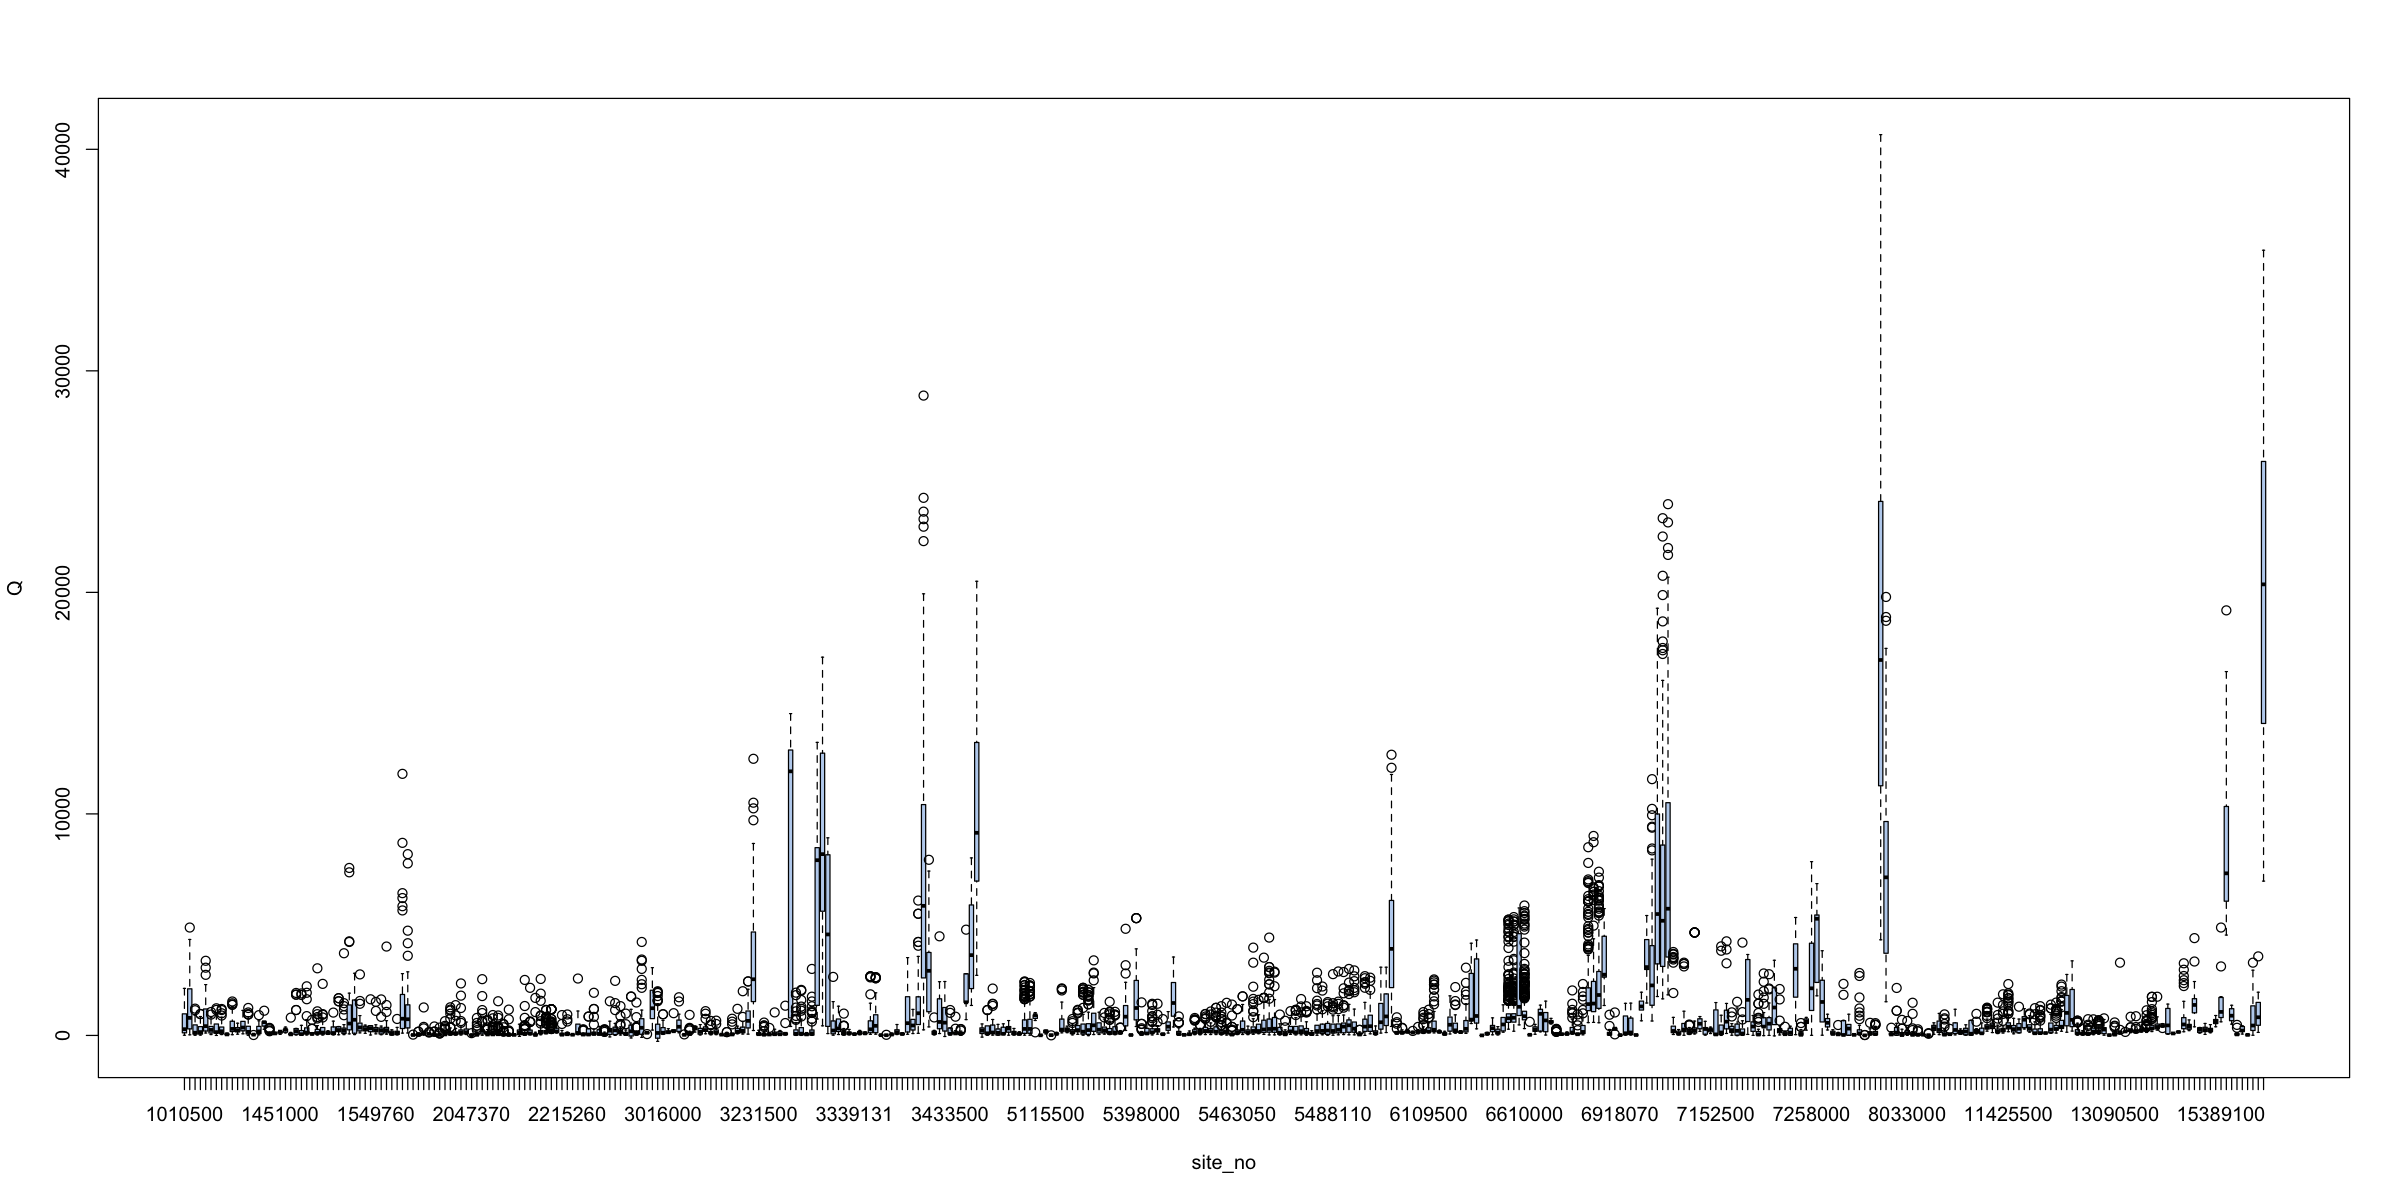

In [5]:
options(repr.plot.width=20, repr.plot.height=10)
boxplot(river$Q ~ river$site_no, xlab="site_no", ylab="Q", col="lightsteelblue2")

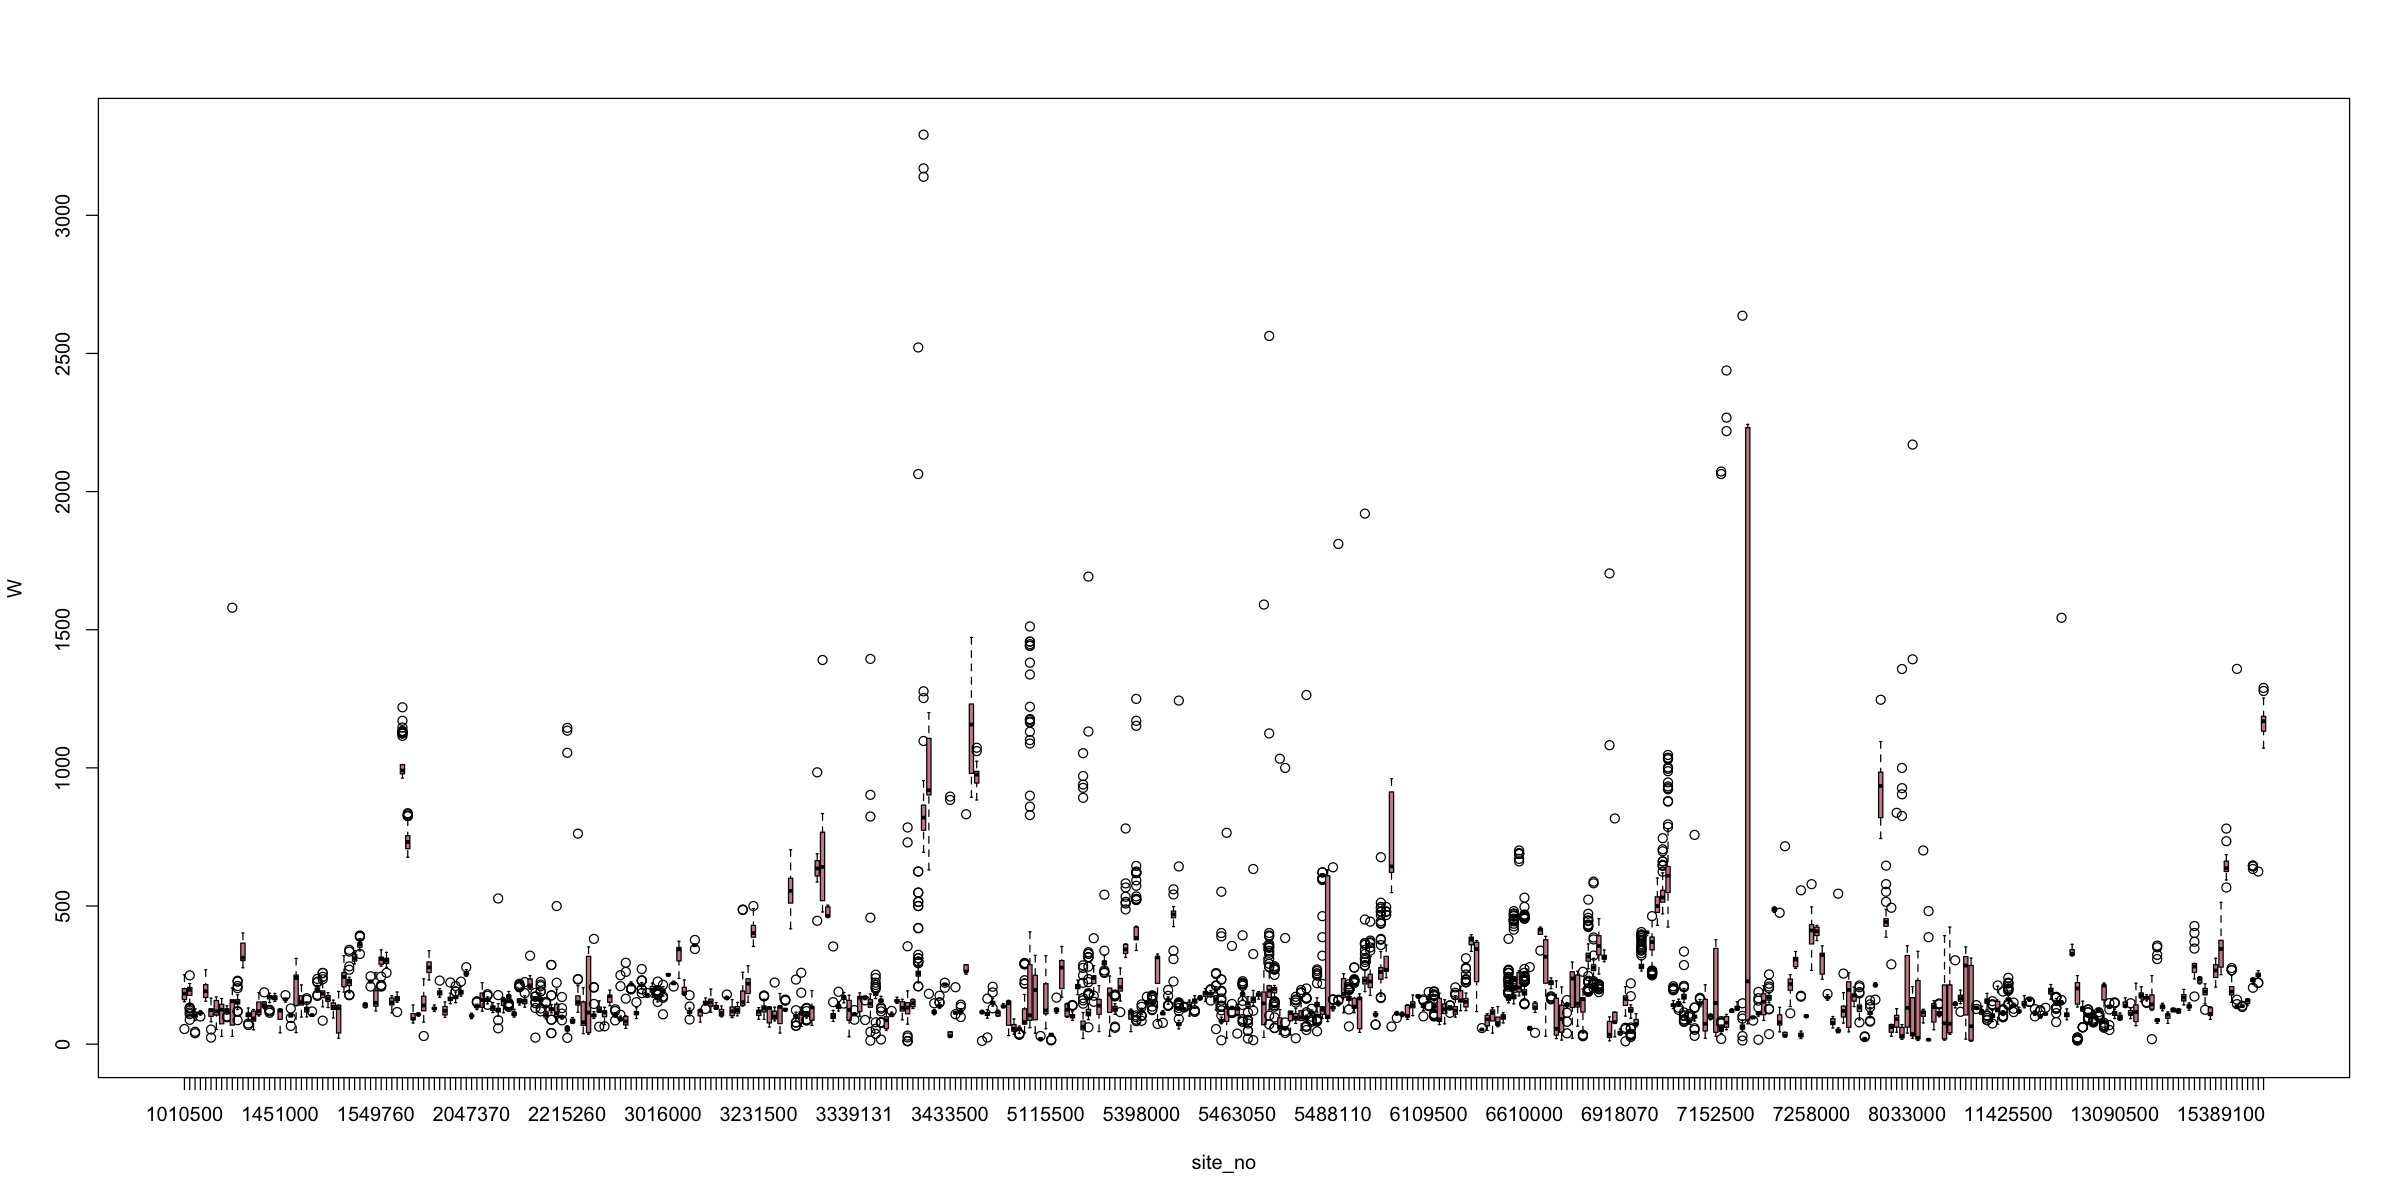

In [6]:
options(repr.plot.width=20, repr.plot.height=10)
boxplot(river$W ~ river$site_no, xlab="site_no", ylab="W", col="lightpink3")

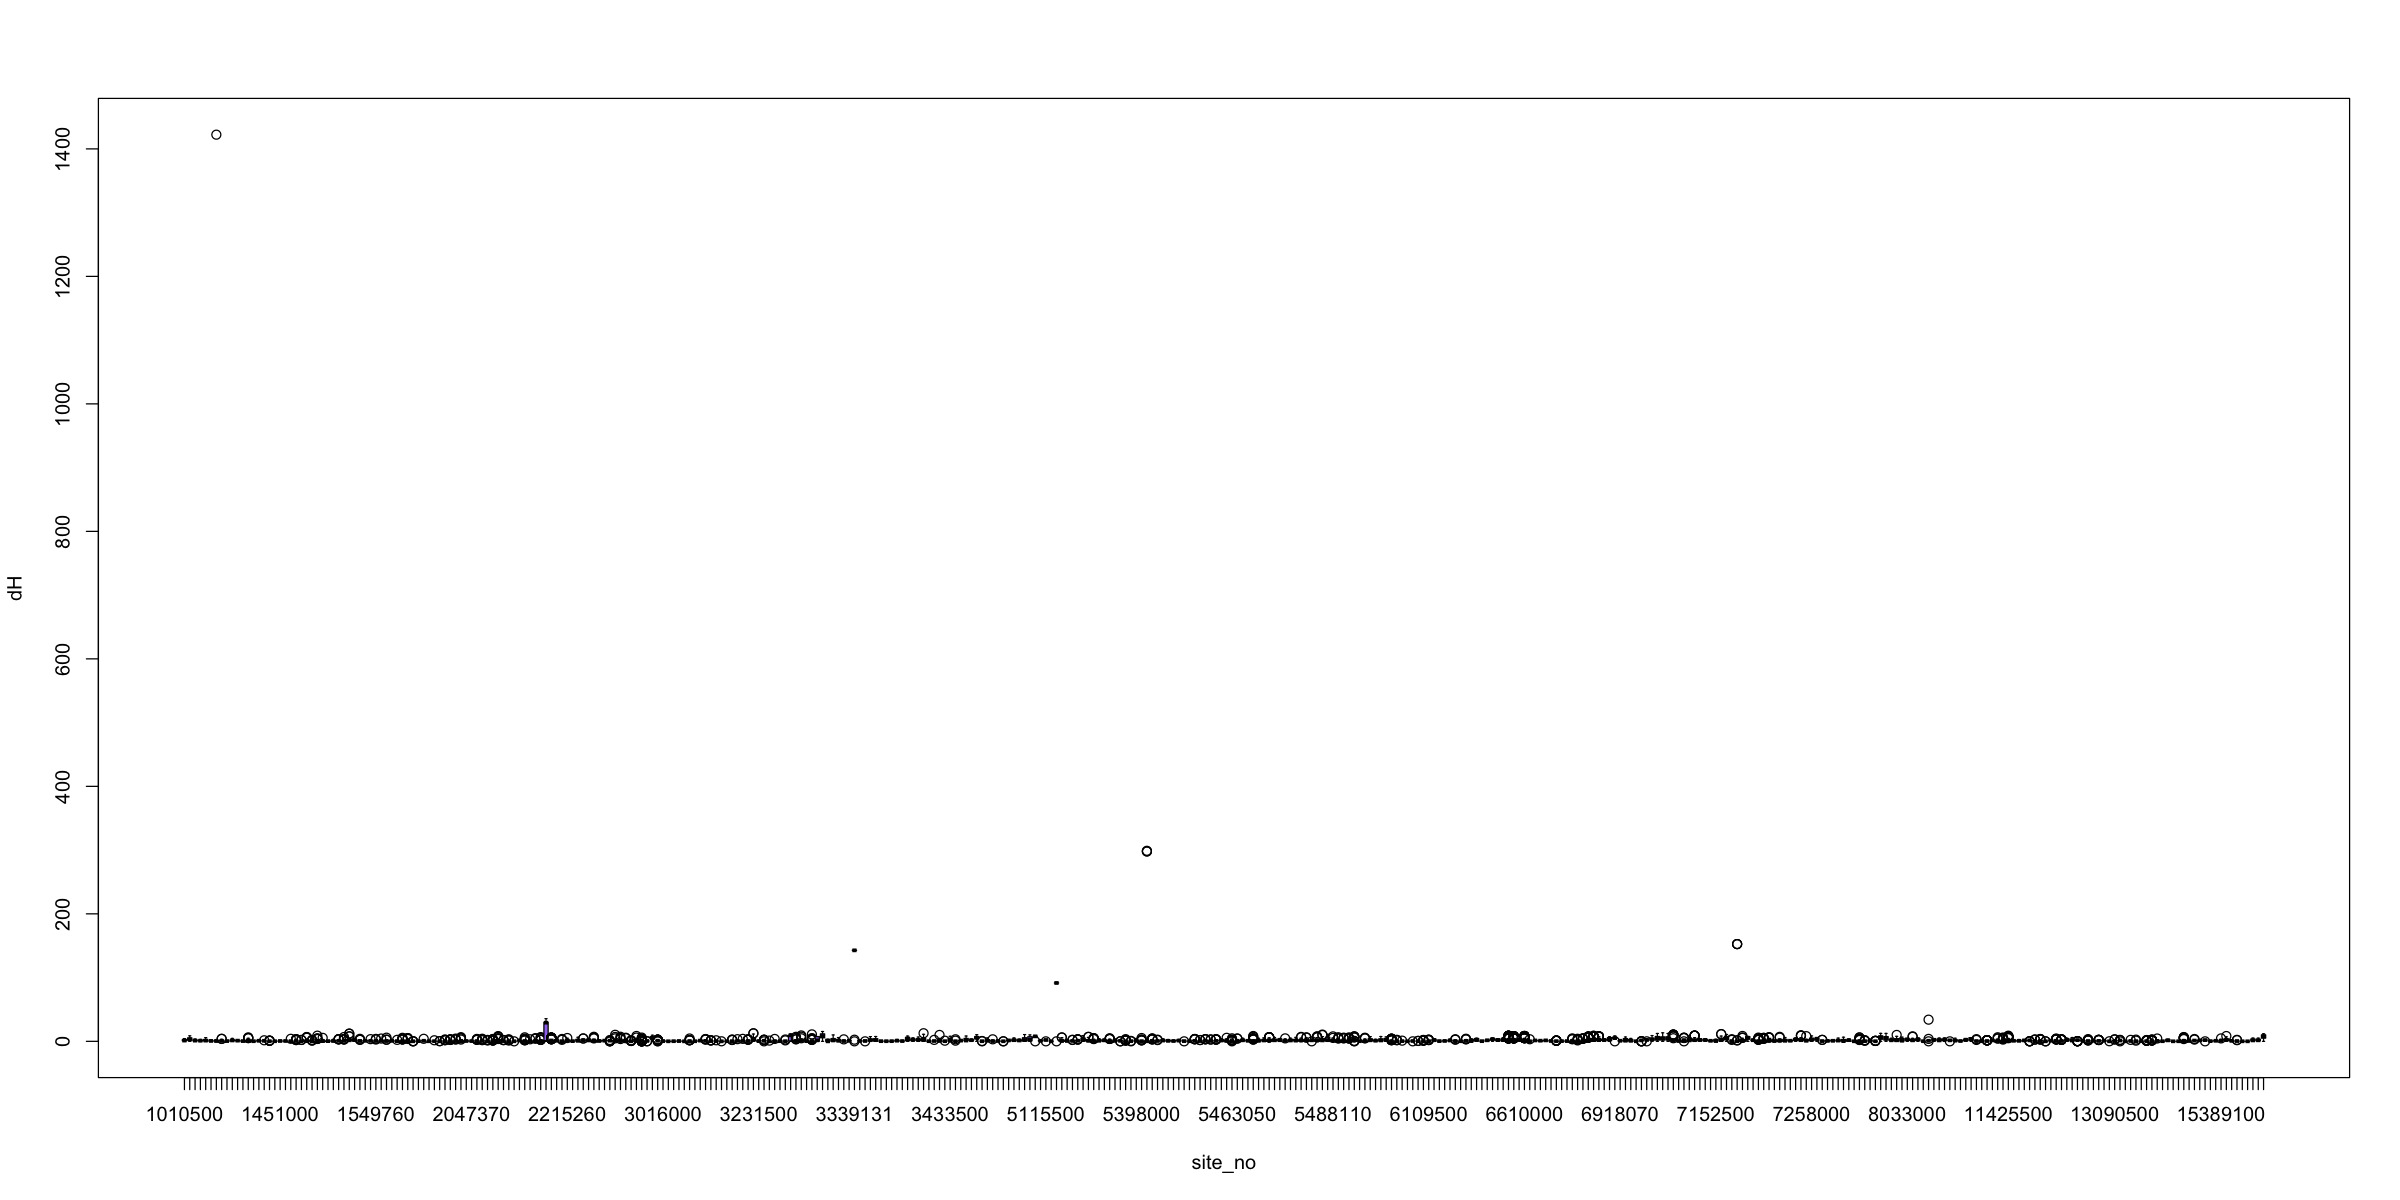

In [7]:
options(repr.plot.width=20, repr.plot.height=10)
boxplot(river$dH ~ river$site_no, xlab="site_no", ylab="dH", col="mediumpurple2")

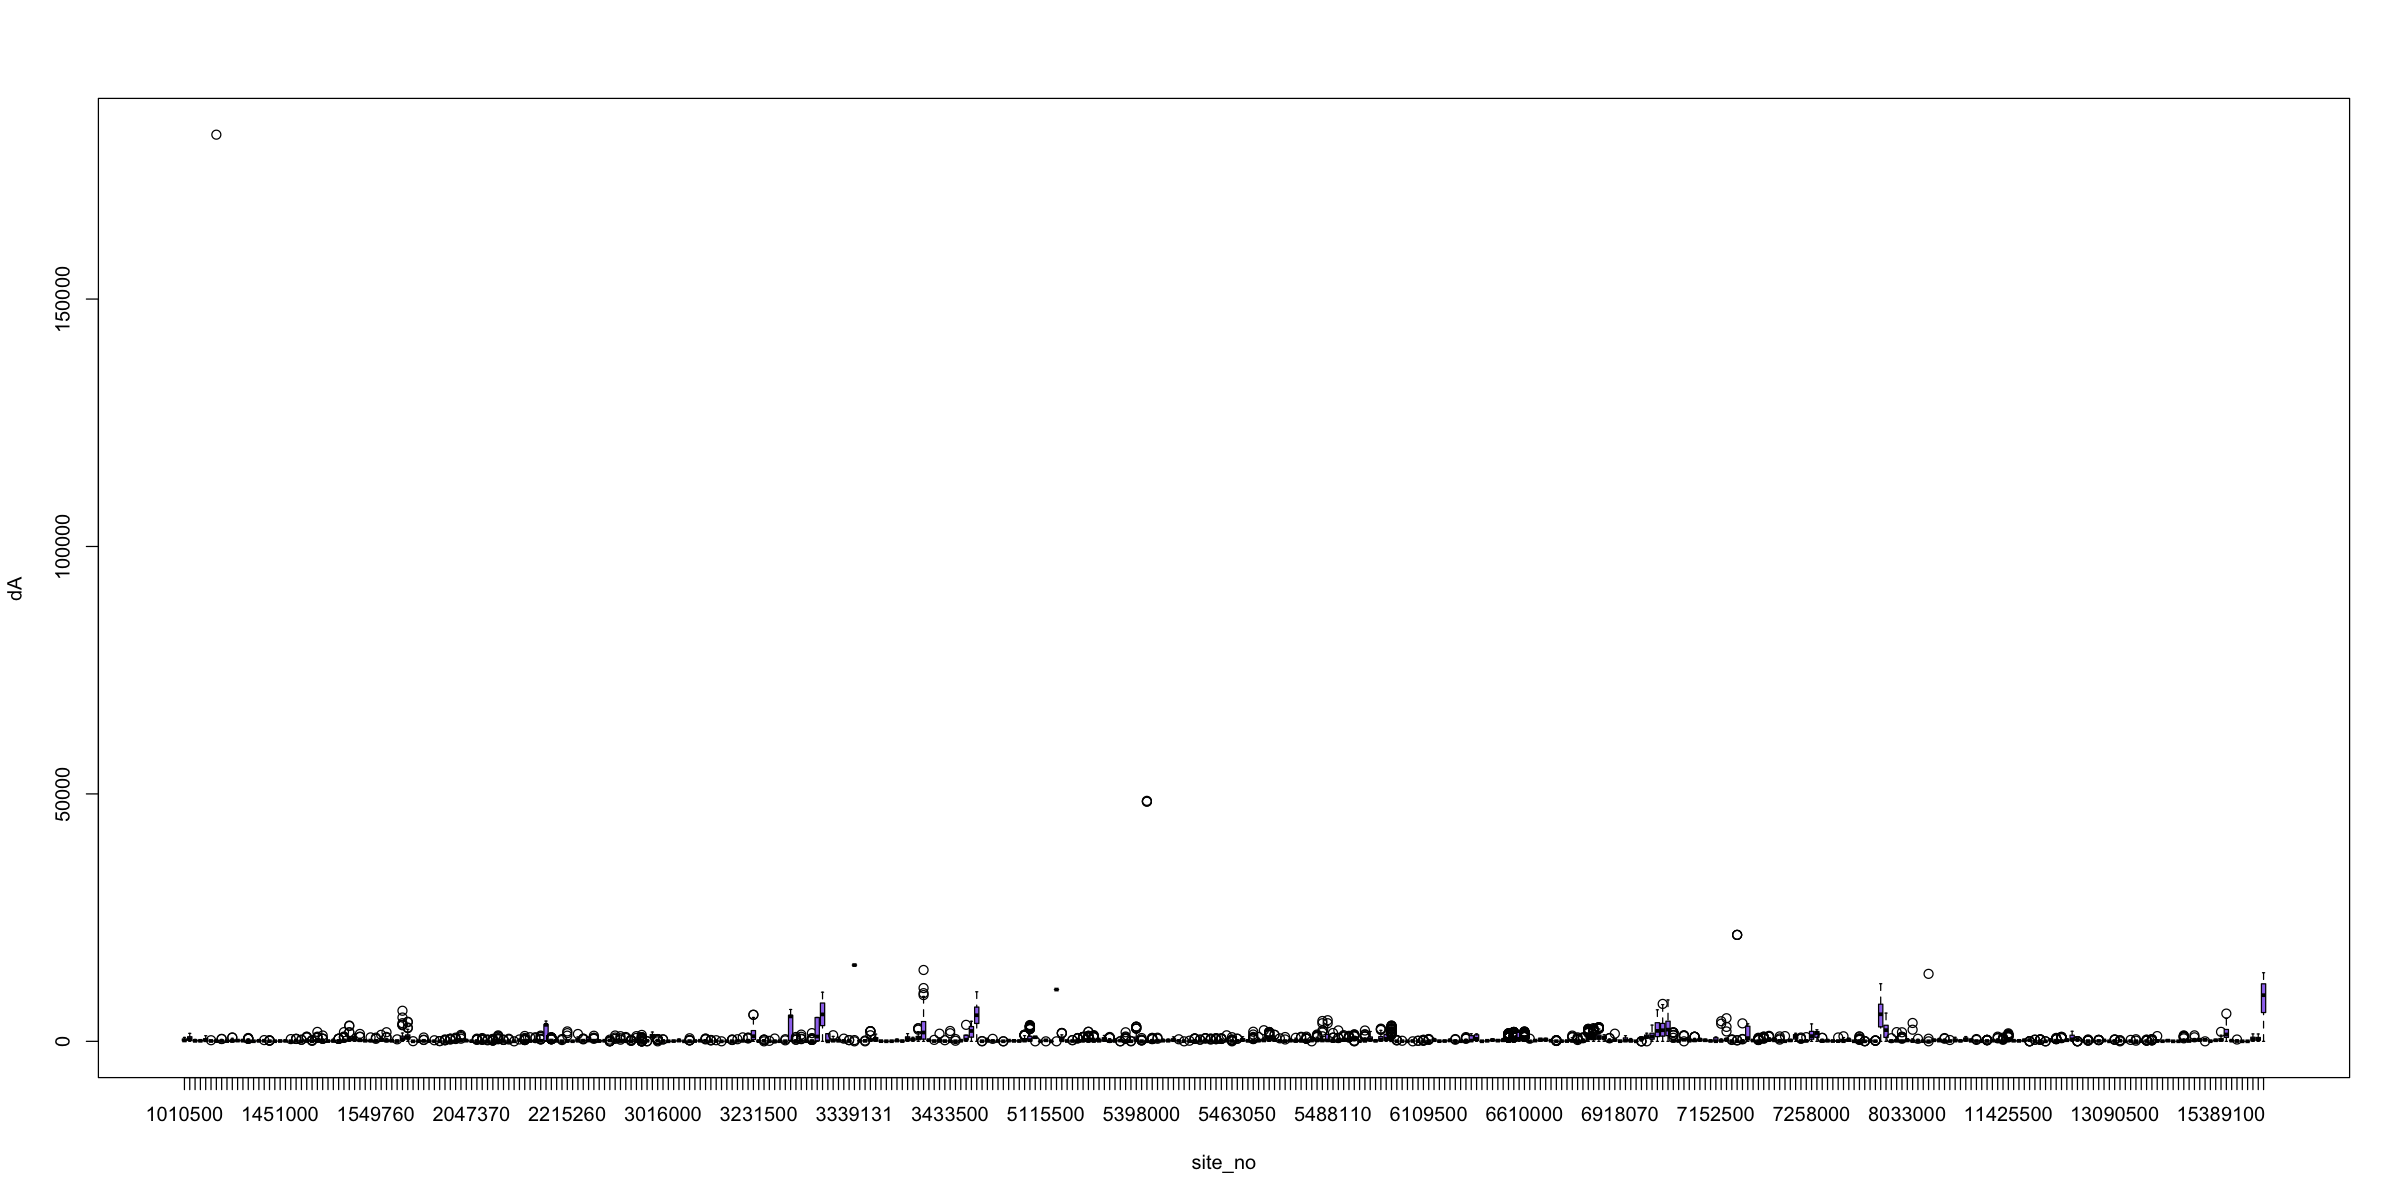

In [8]:
options(repr.plot.width=20, repr.plot.height=10)
boxplot(river$dA ~ river$site_no, xlab="site_no", ylab="dA", col="mediumpurple2")

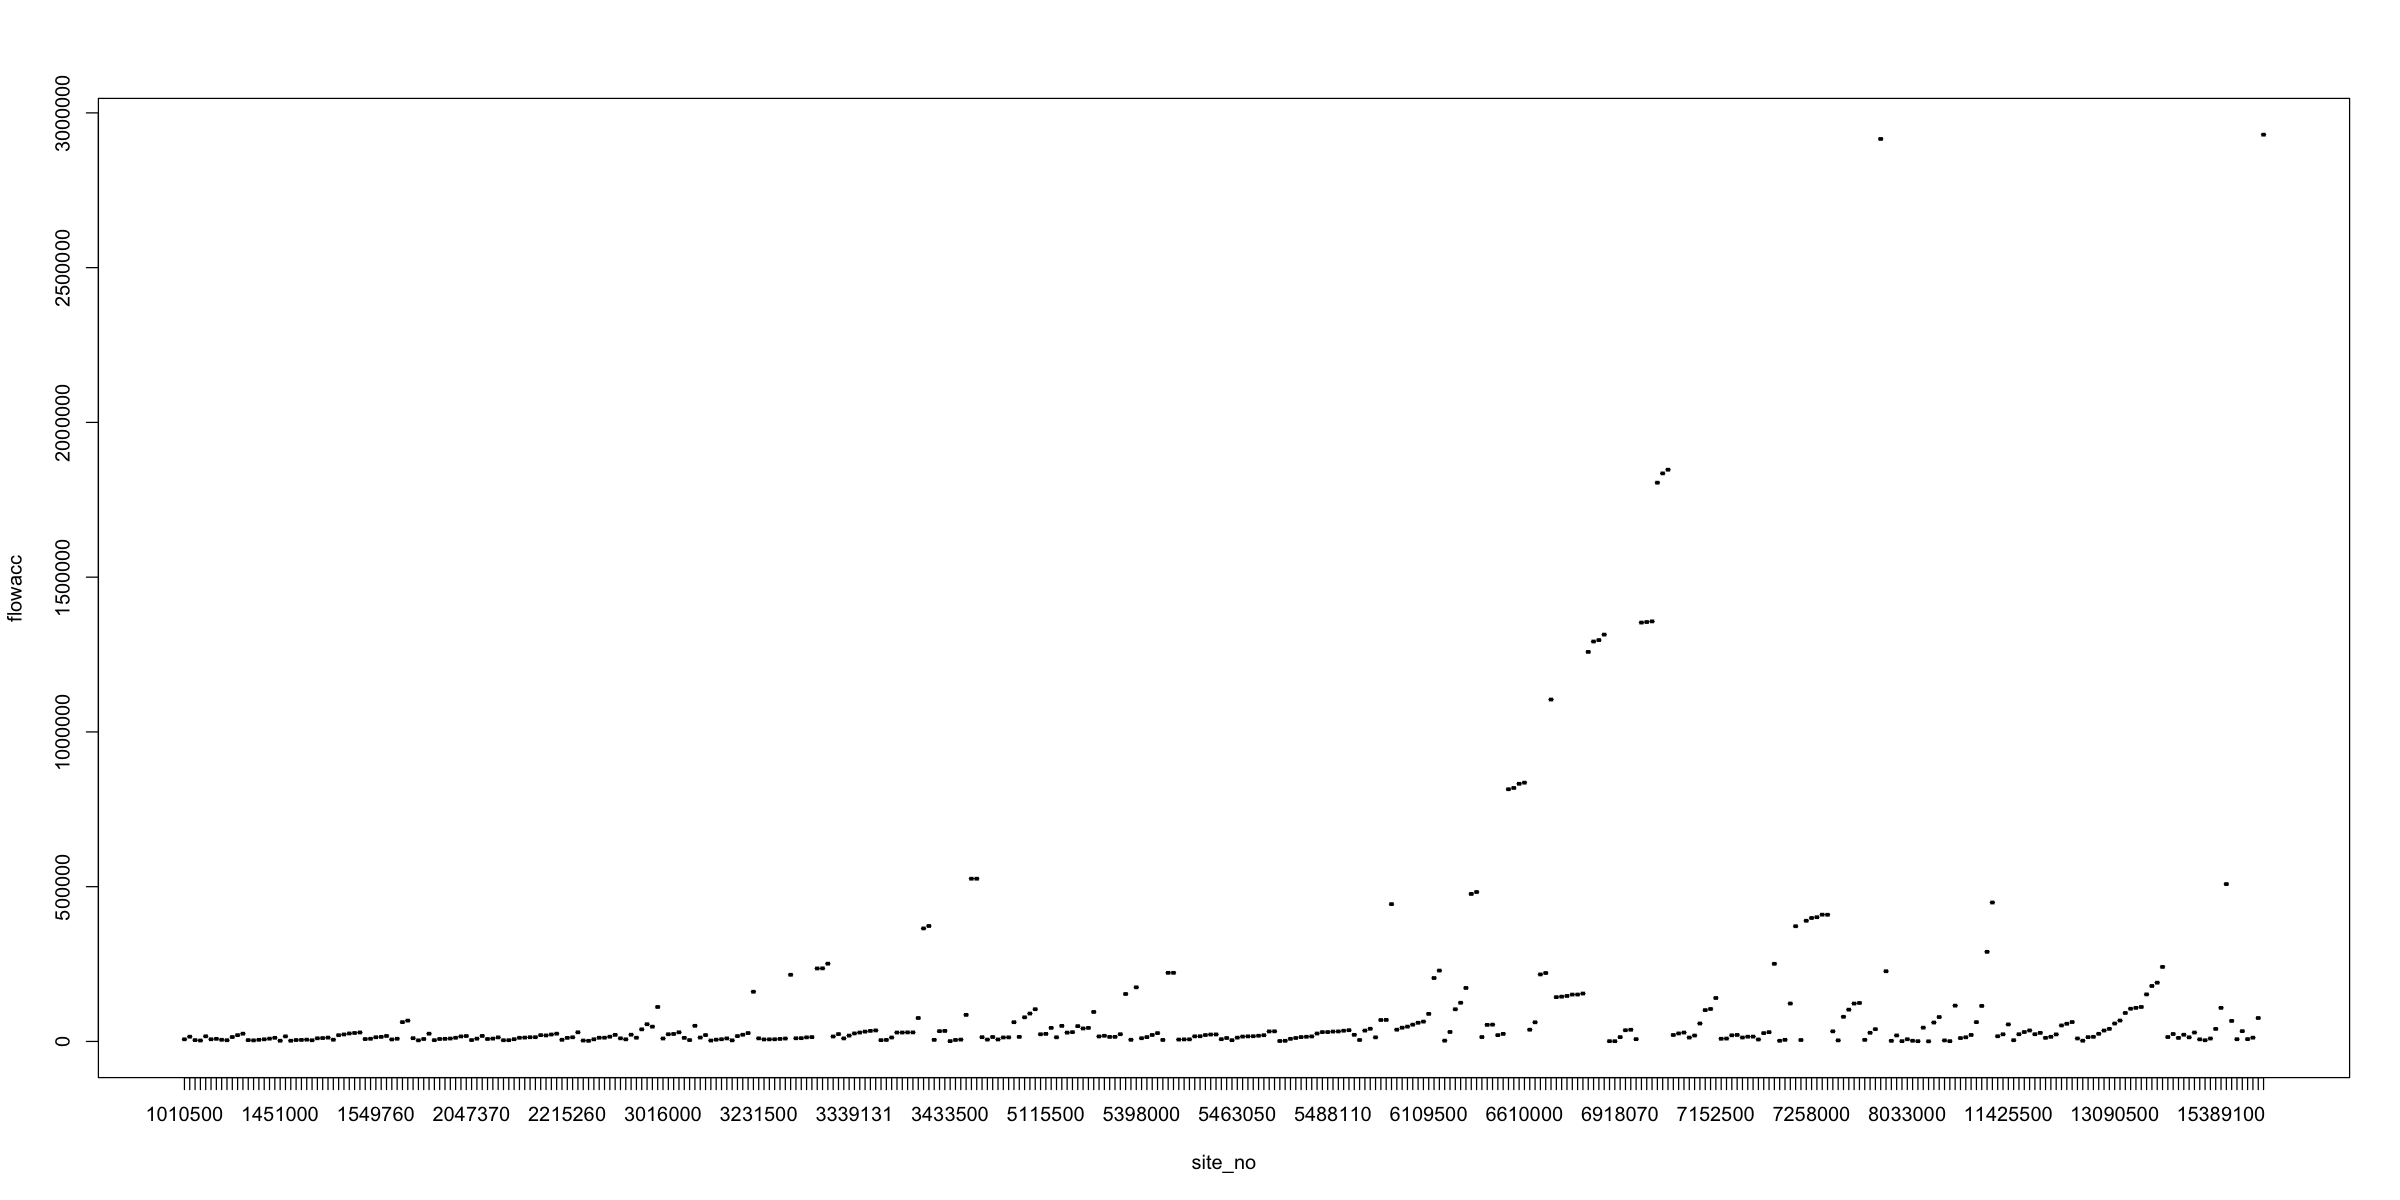

In [9]:
options(repr.plot.width=20, repr.plot.height=10)
boxplot(river$flowacc ~ river$site_no, xlab="site_no", ylab="flowacc", col="green")

### V - Modification du jeu de données

In [10]:
riverM = river[river$dH<50,]

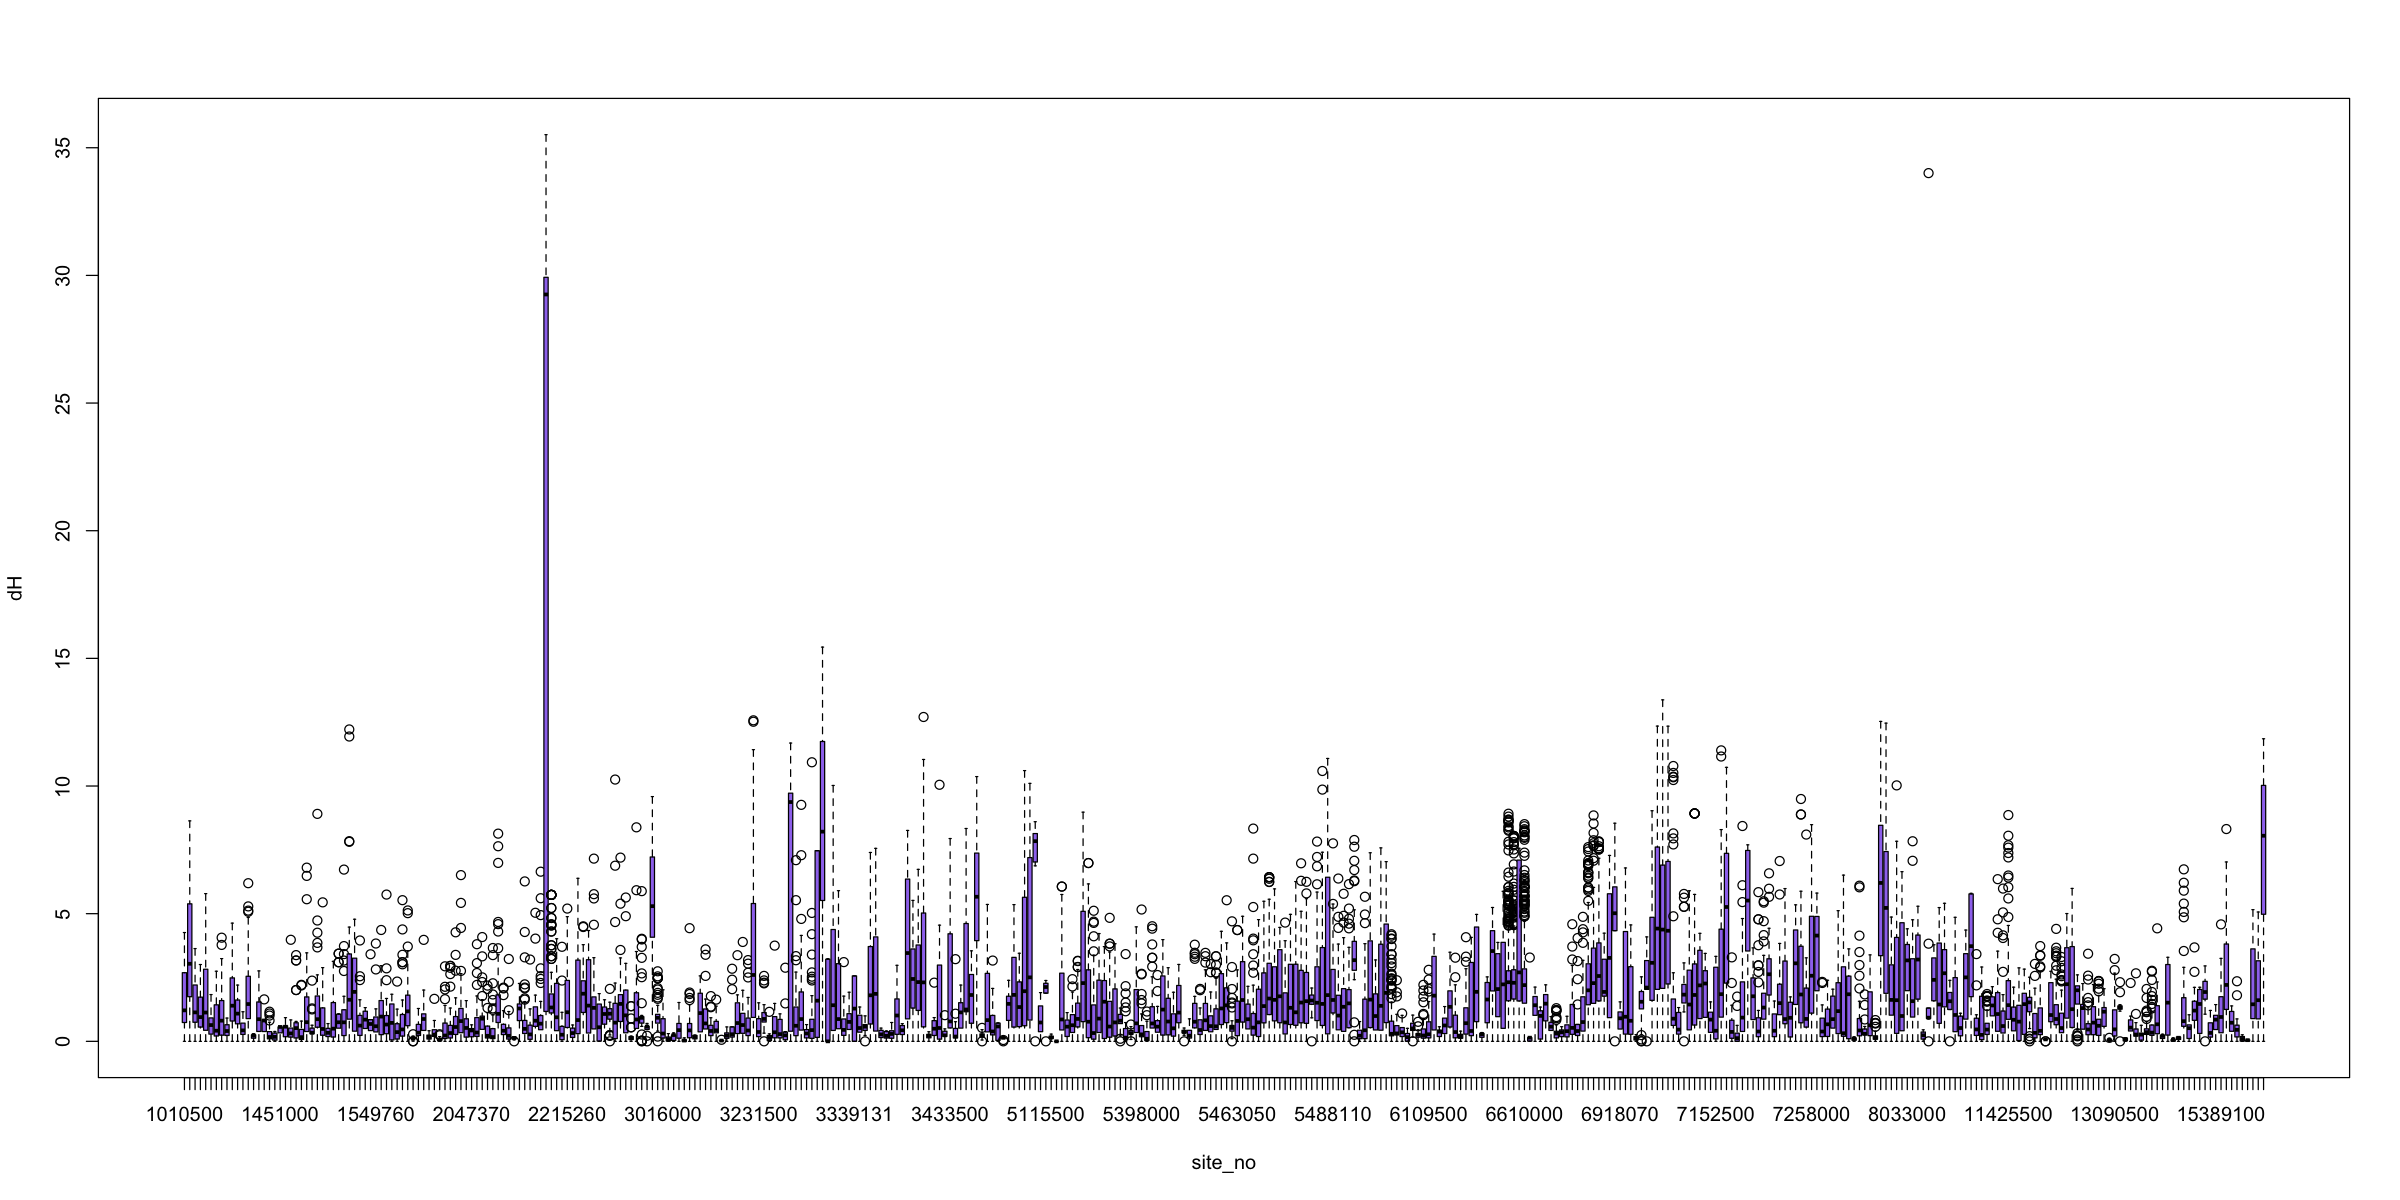

In [11]:
options(repr.plot.width=20, repr.plot.height=10)
boxplot(riverM$dH ~ riverM$site_no, xlab="site_no", ylab="dH", col="mediumpurple2")

In [12]:
riverM = riverM[riverM$dA<50000,]

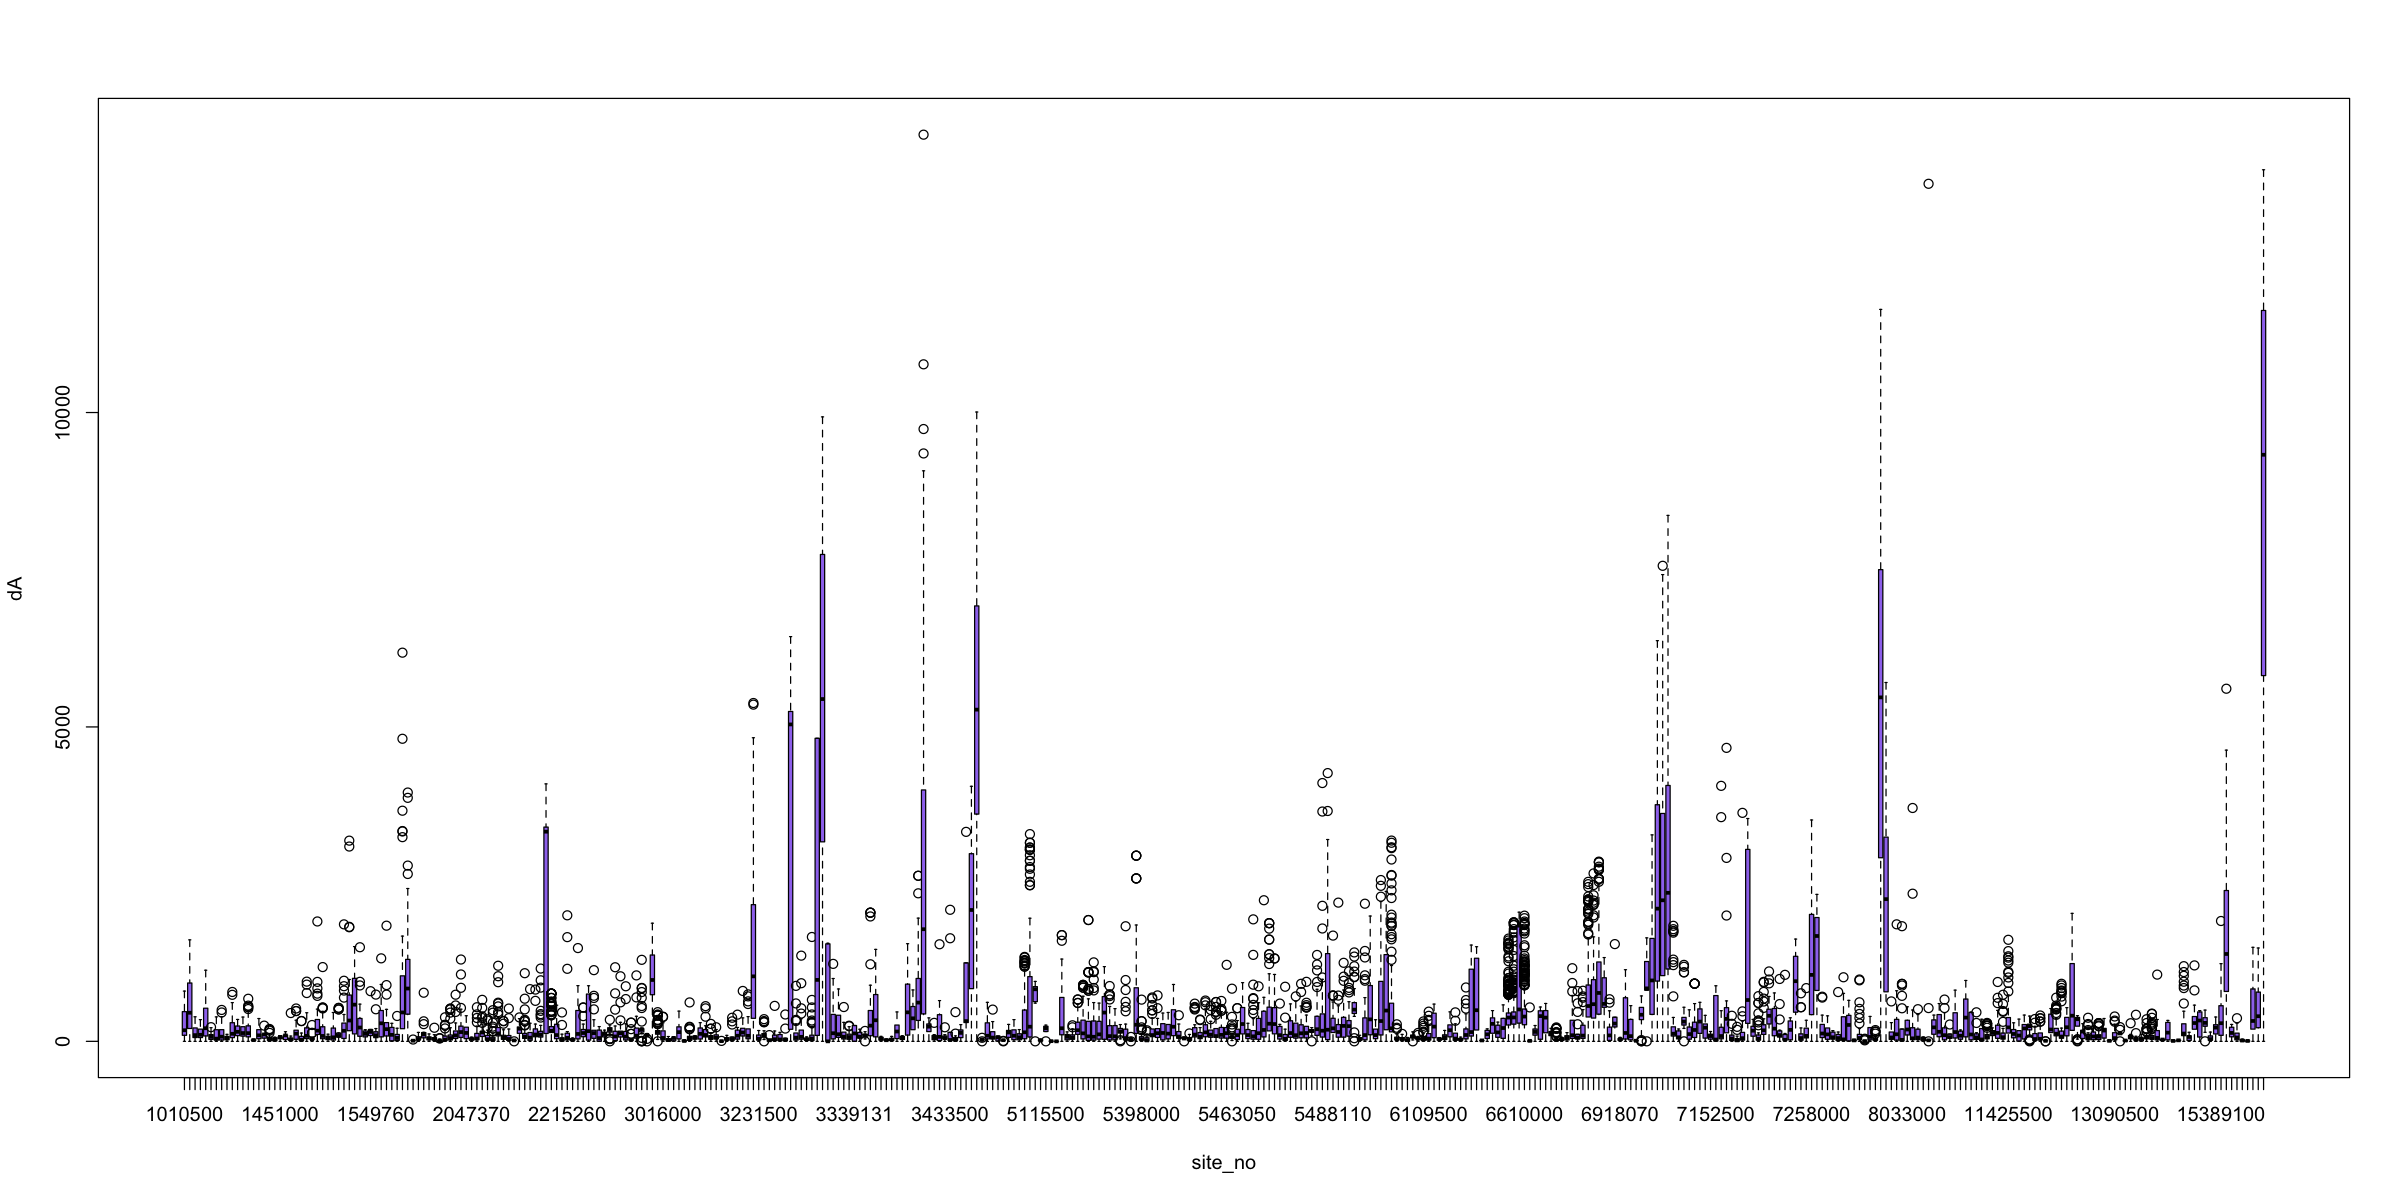

In [13]:
options(repr.plot.width=20, repr.plot.height=10)
boxplot(riverM$dA ~ riverM$site_no, xlab="site_no", ylab="dA", col="mediumpurple2")

In [14]:
#head(riverM)

### VI - Quelques statistiques descriptives supplémentaires

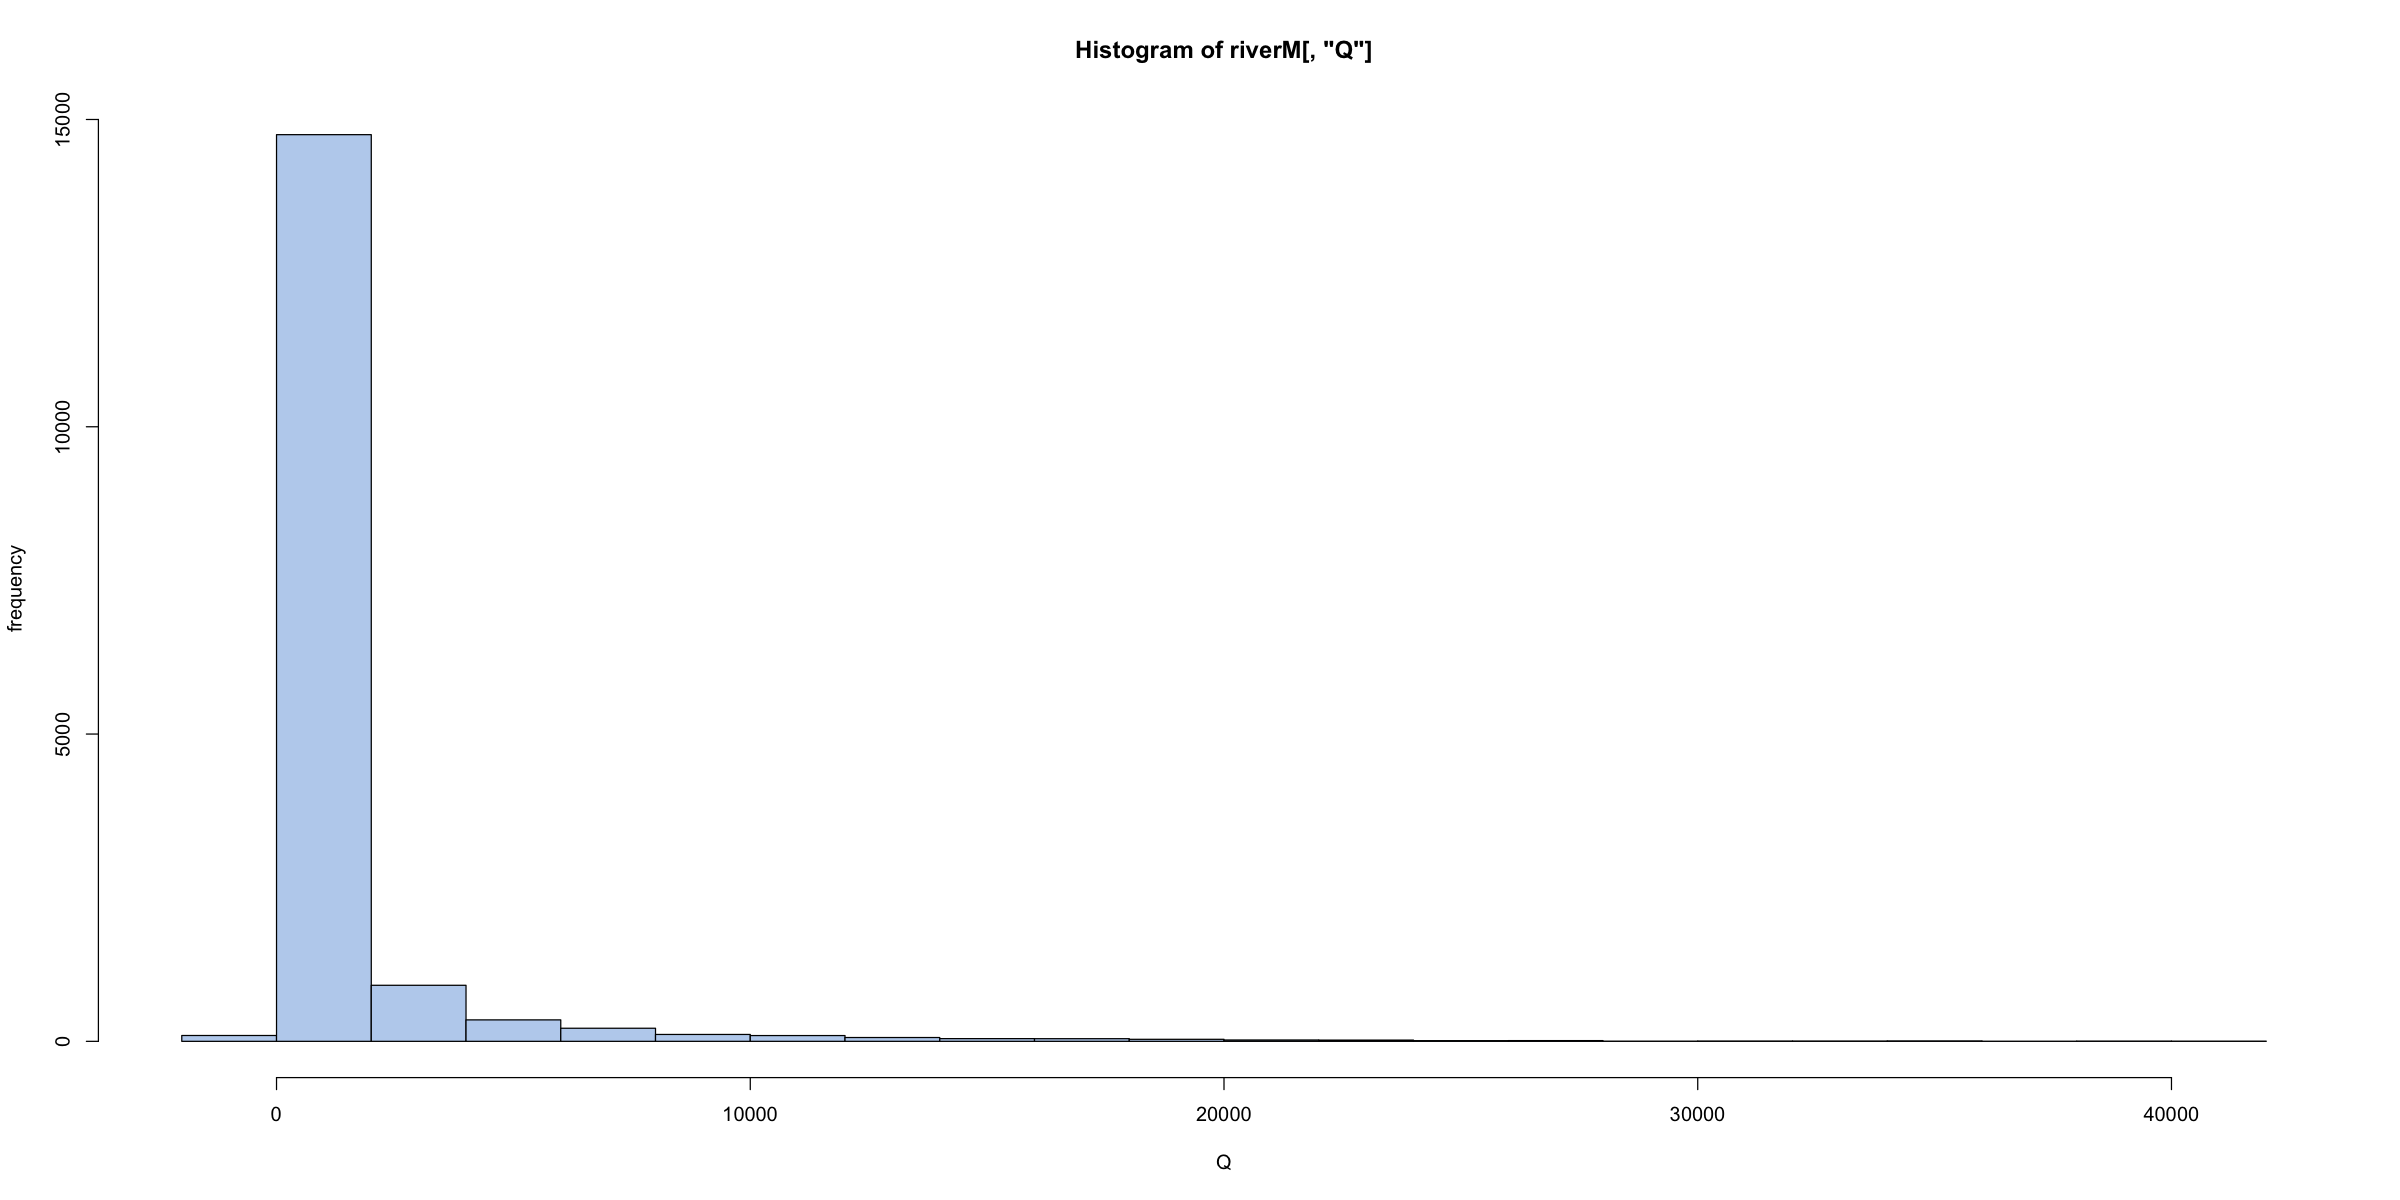

In [15]:
hist(riverM[,"Q"], xlab="Q", ylab="frequency", col="lightsteelblue2")

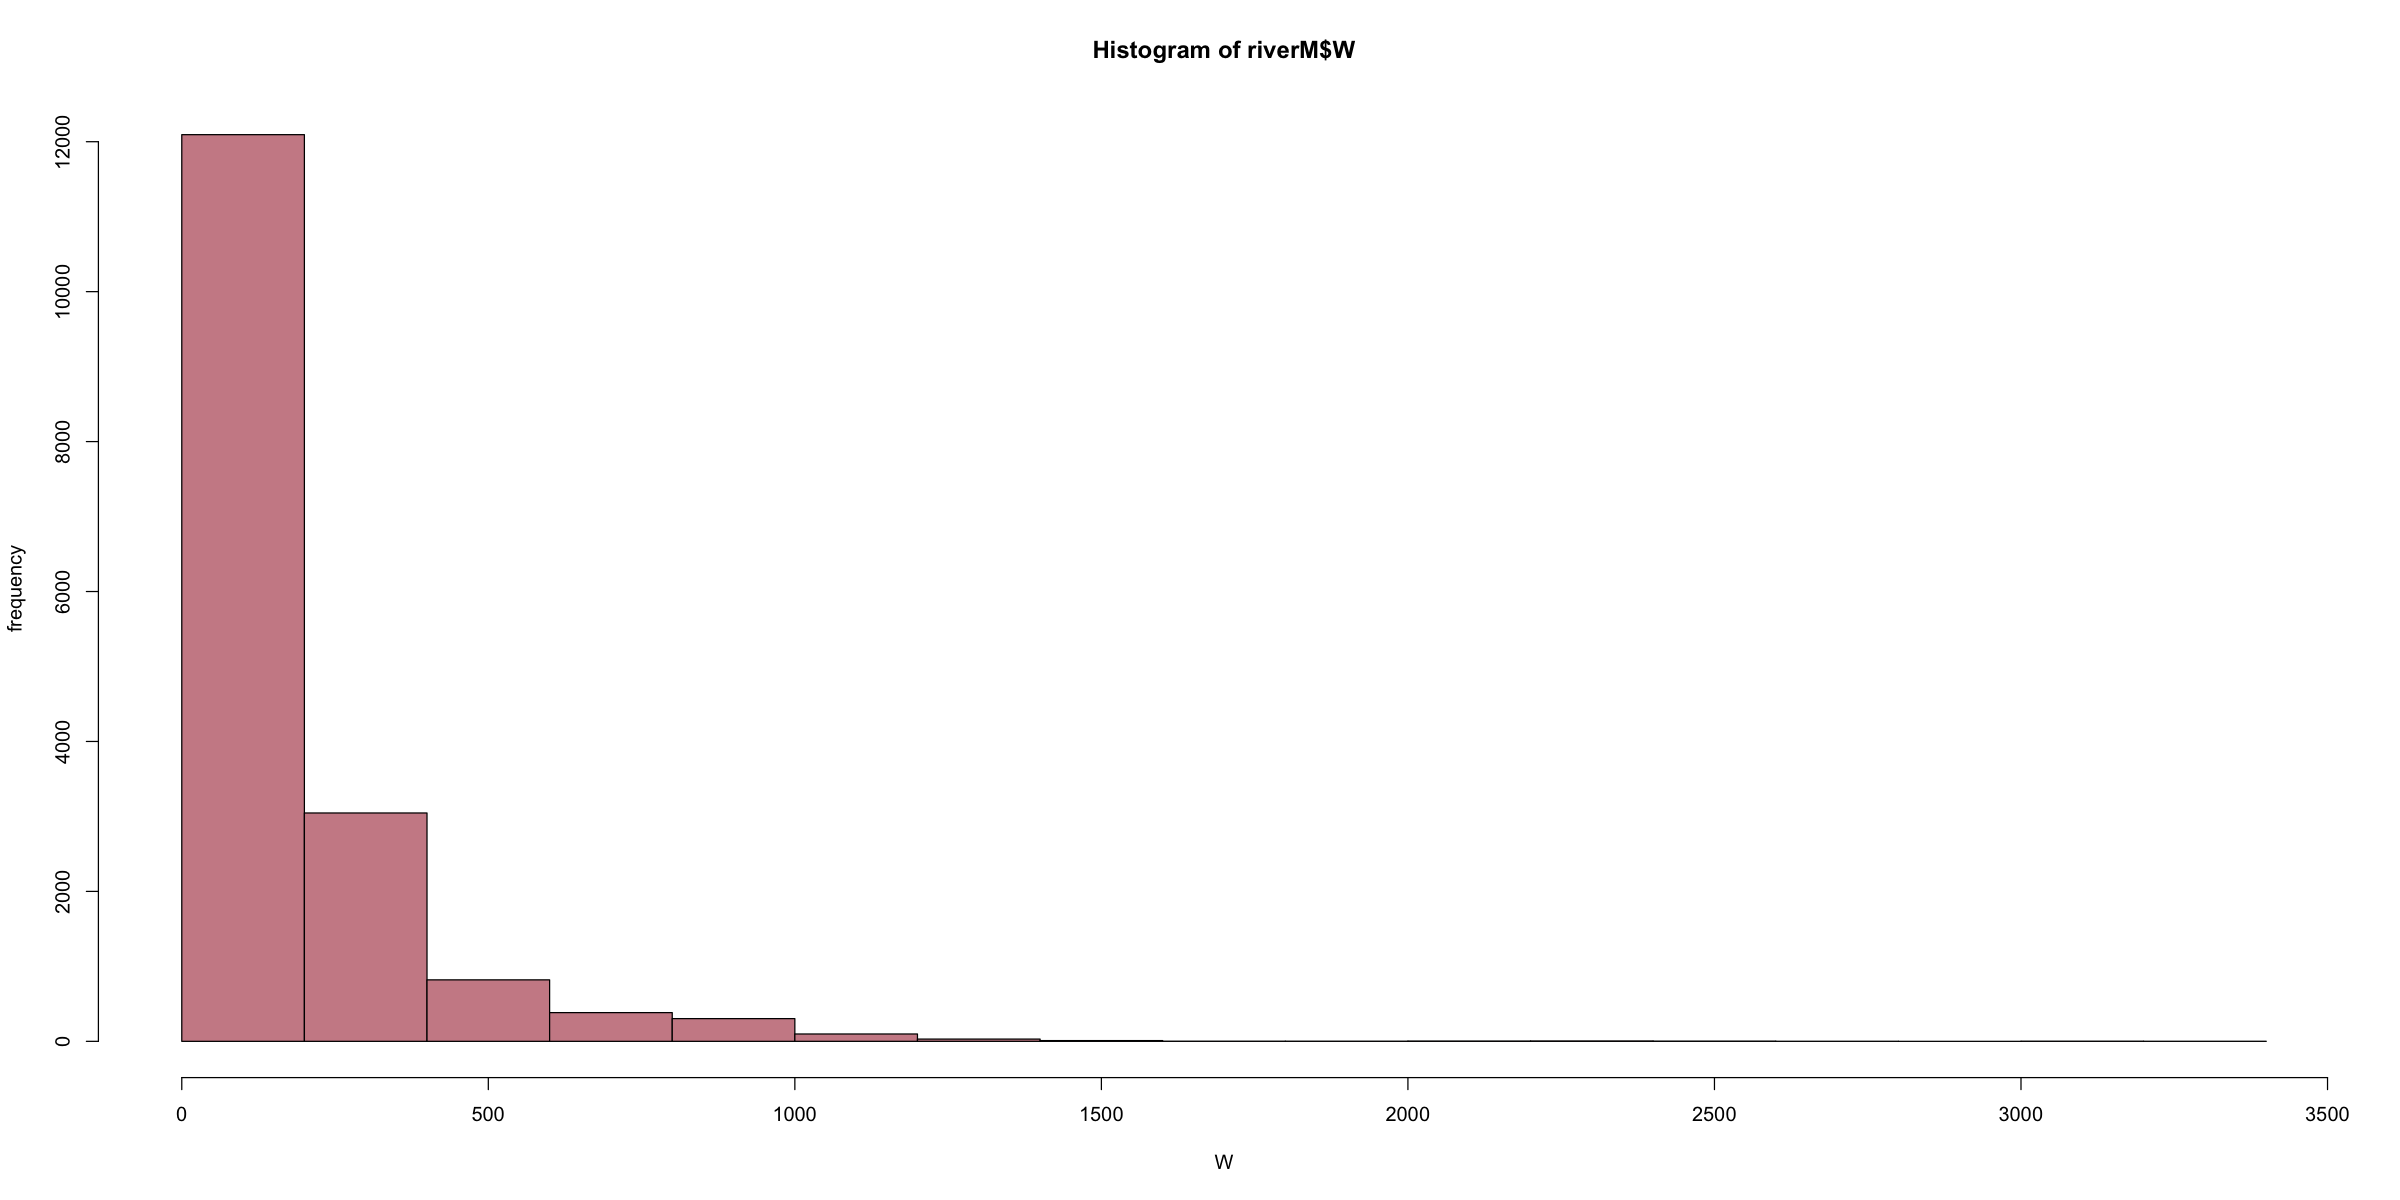

In [16]:
hist(riverM$W, xlab="W", ylab="frequency", col="lightpink3")

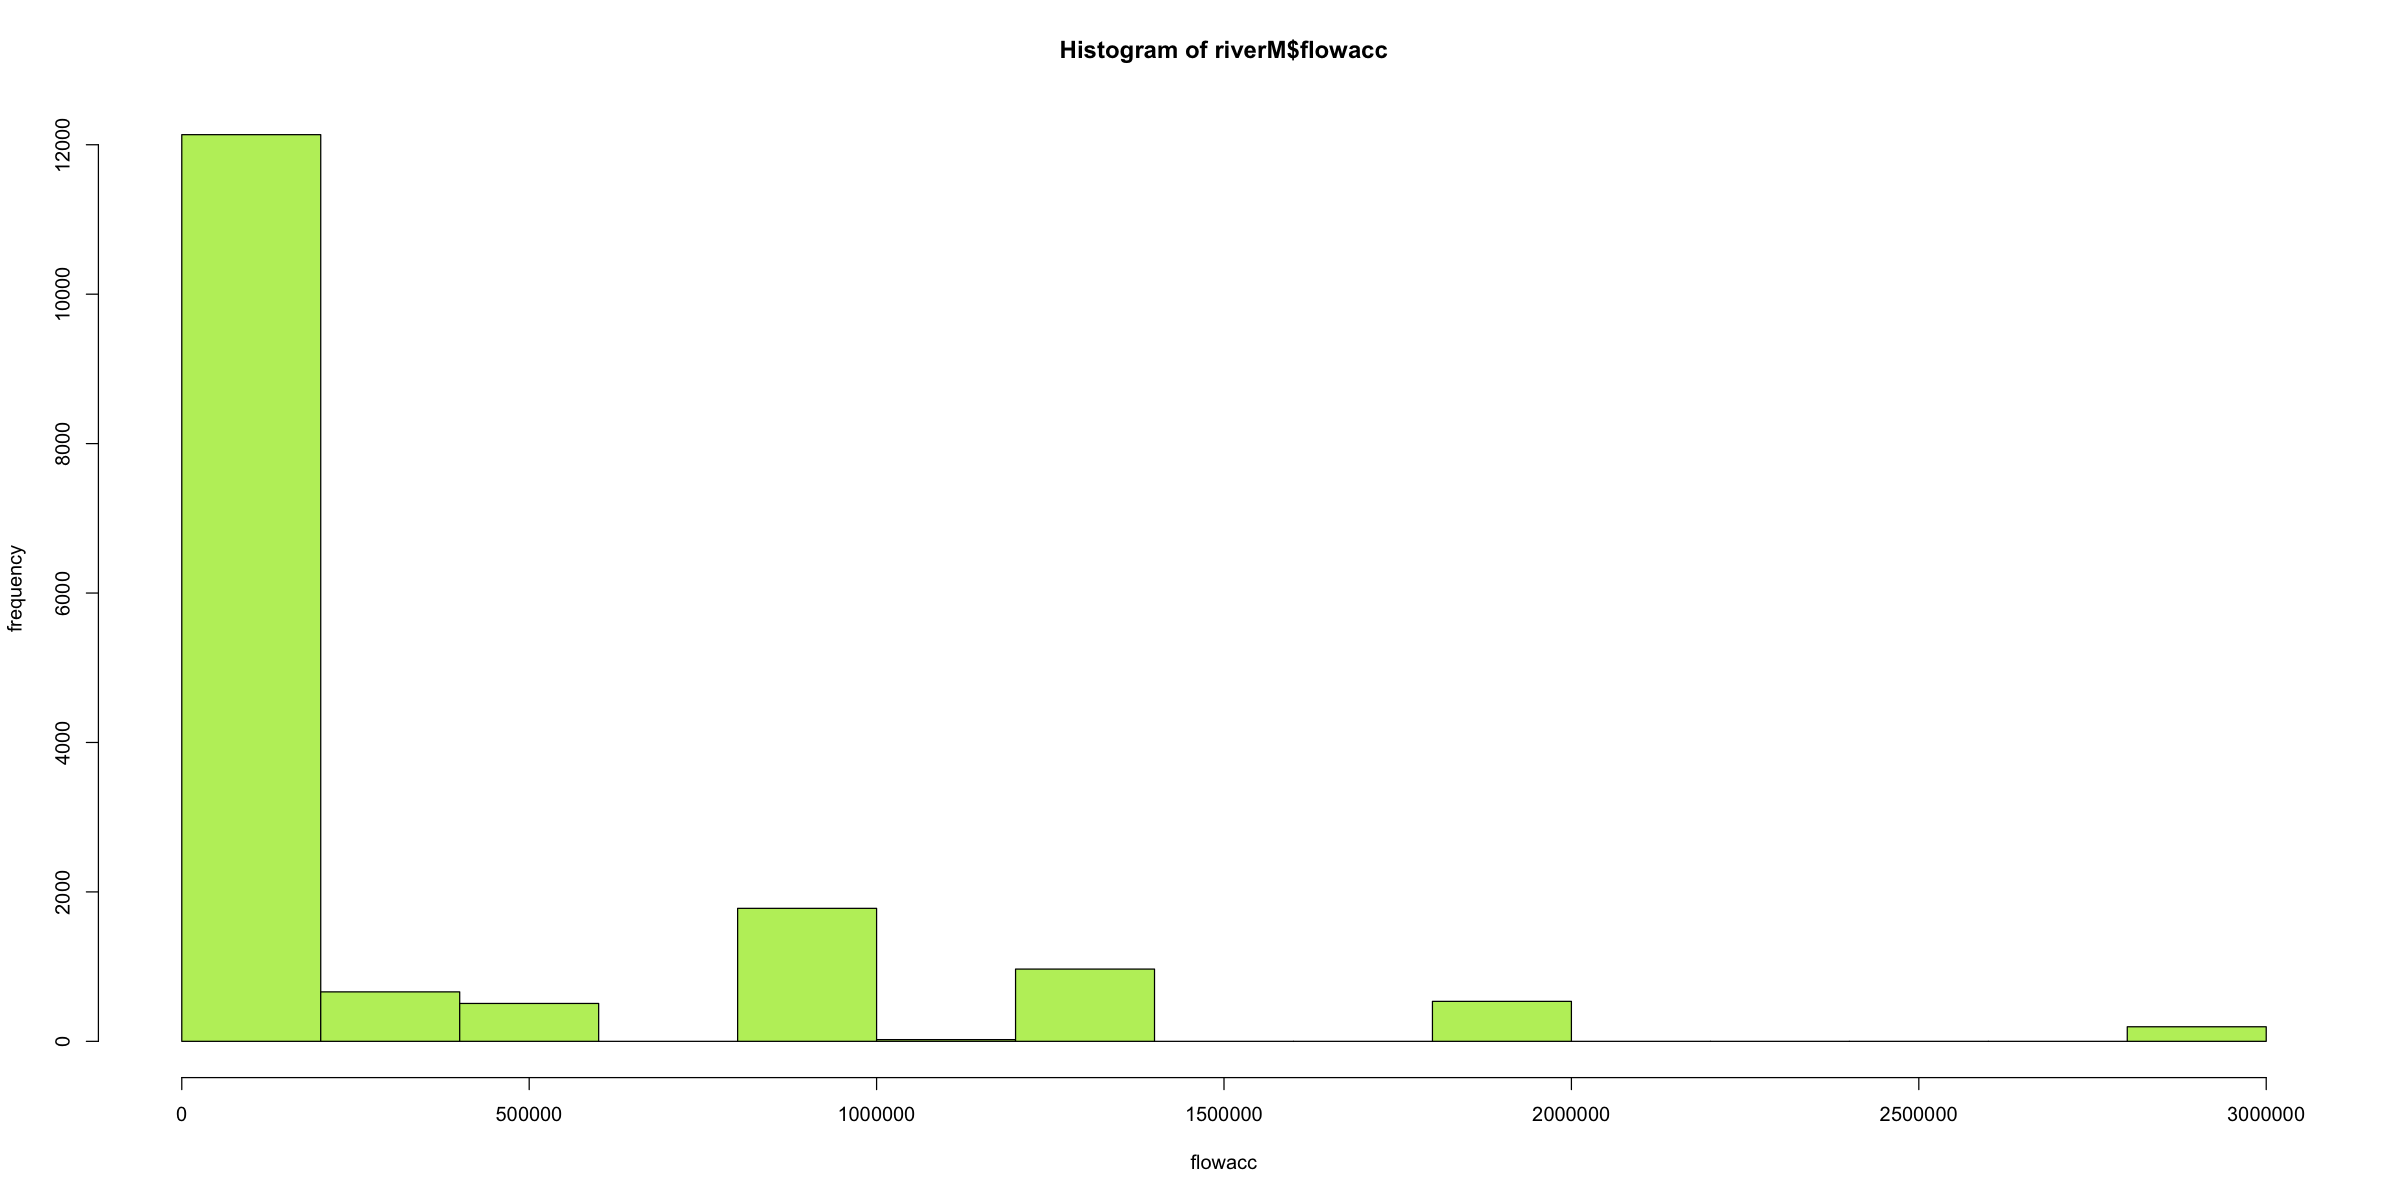

In [17]:
hist(riverM$flowacc, xlab="flowacc", ylab="frequency", col="darkolivegreen2")

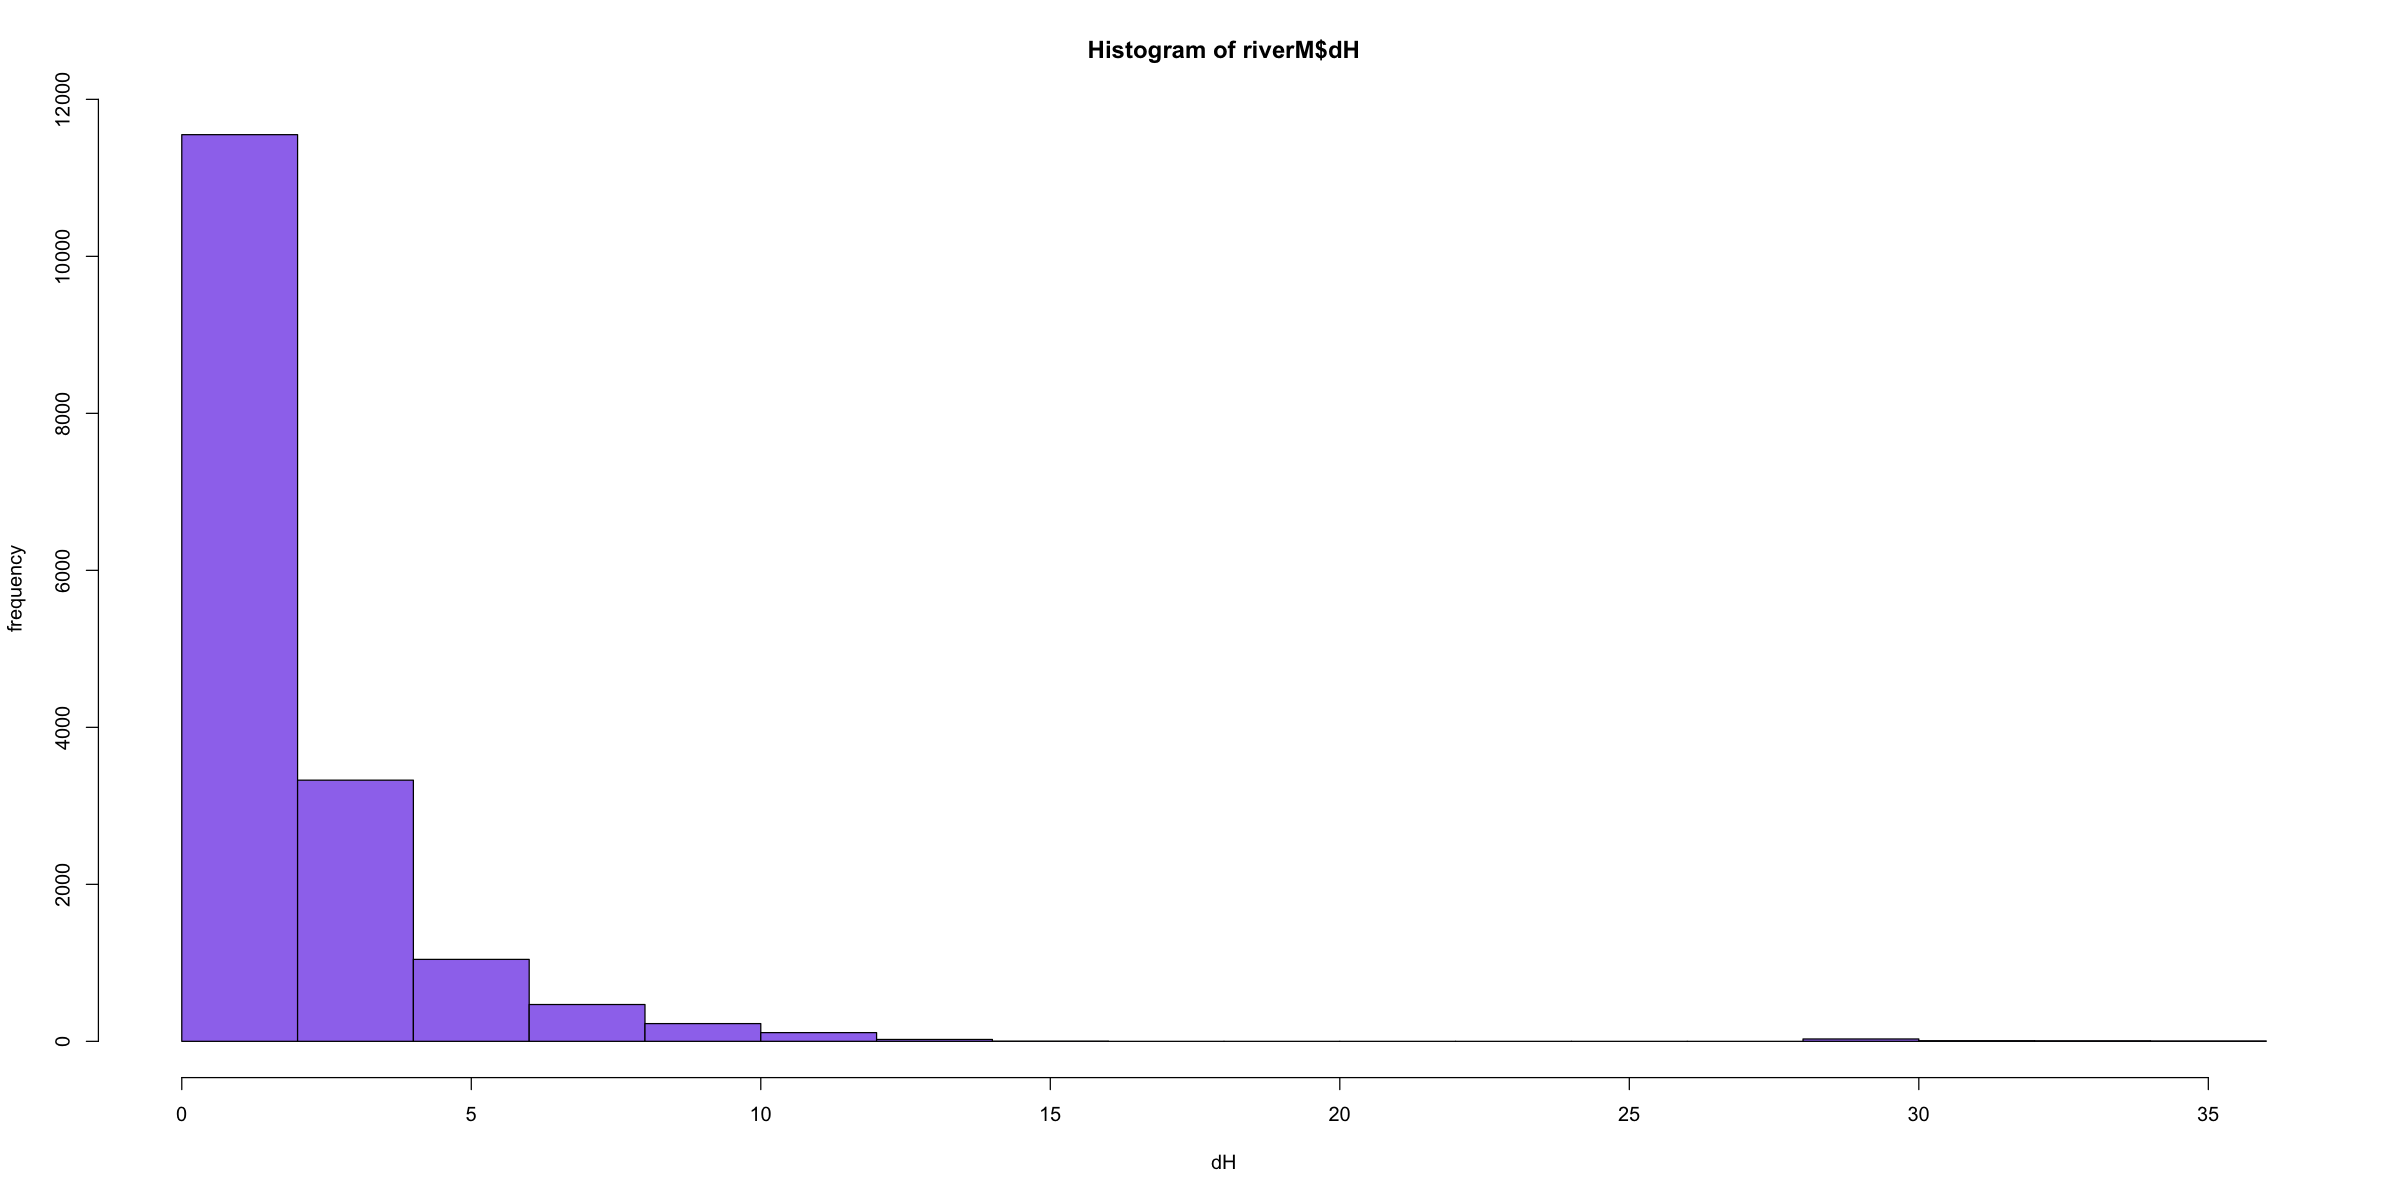

In [18]:
hist(riverM$dH, xlab="dH", ylab="frequency", col="mediumpurple2")

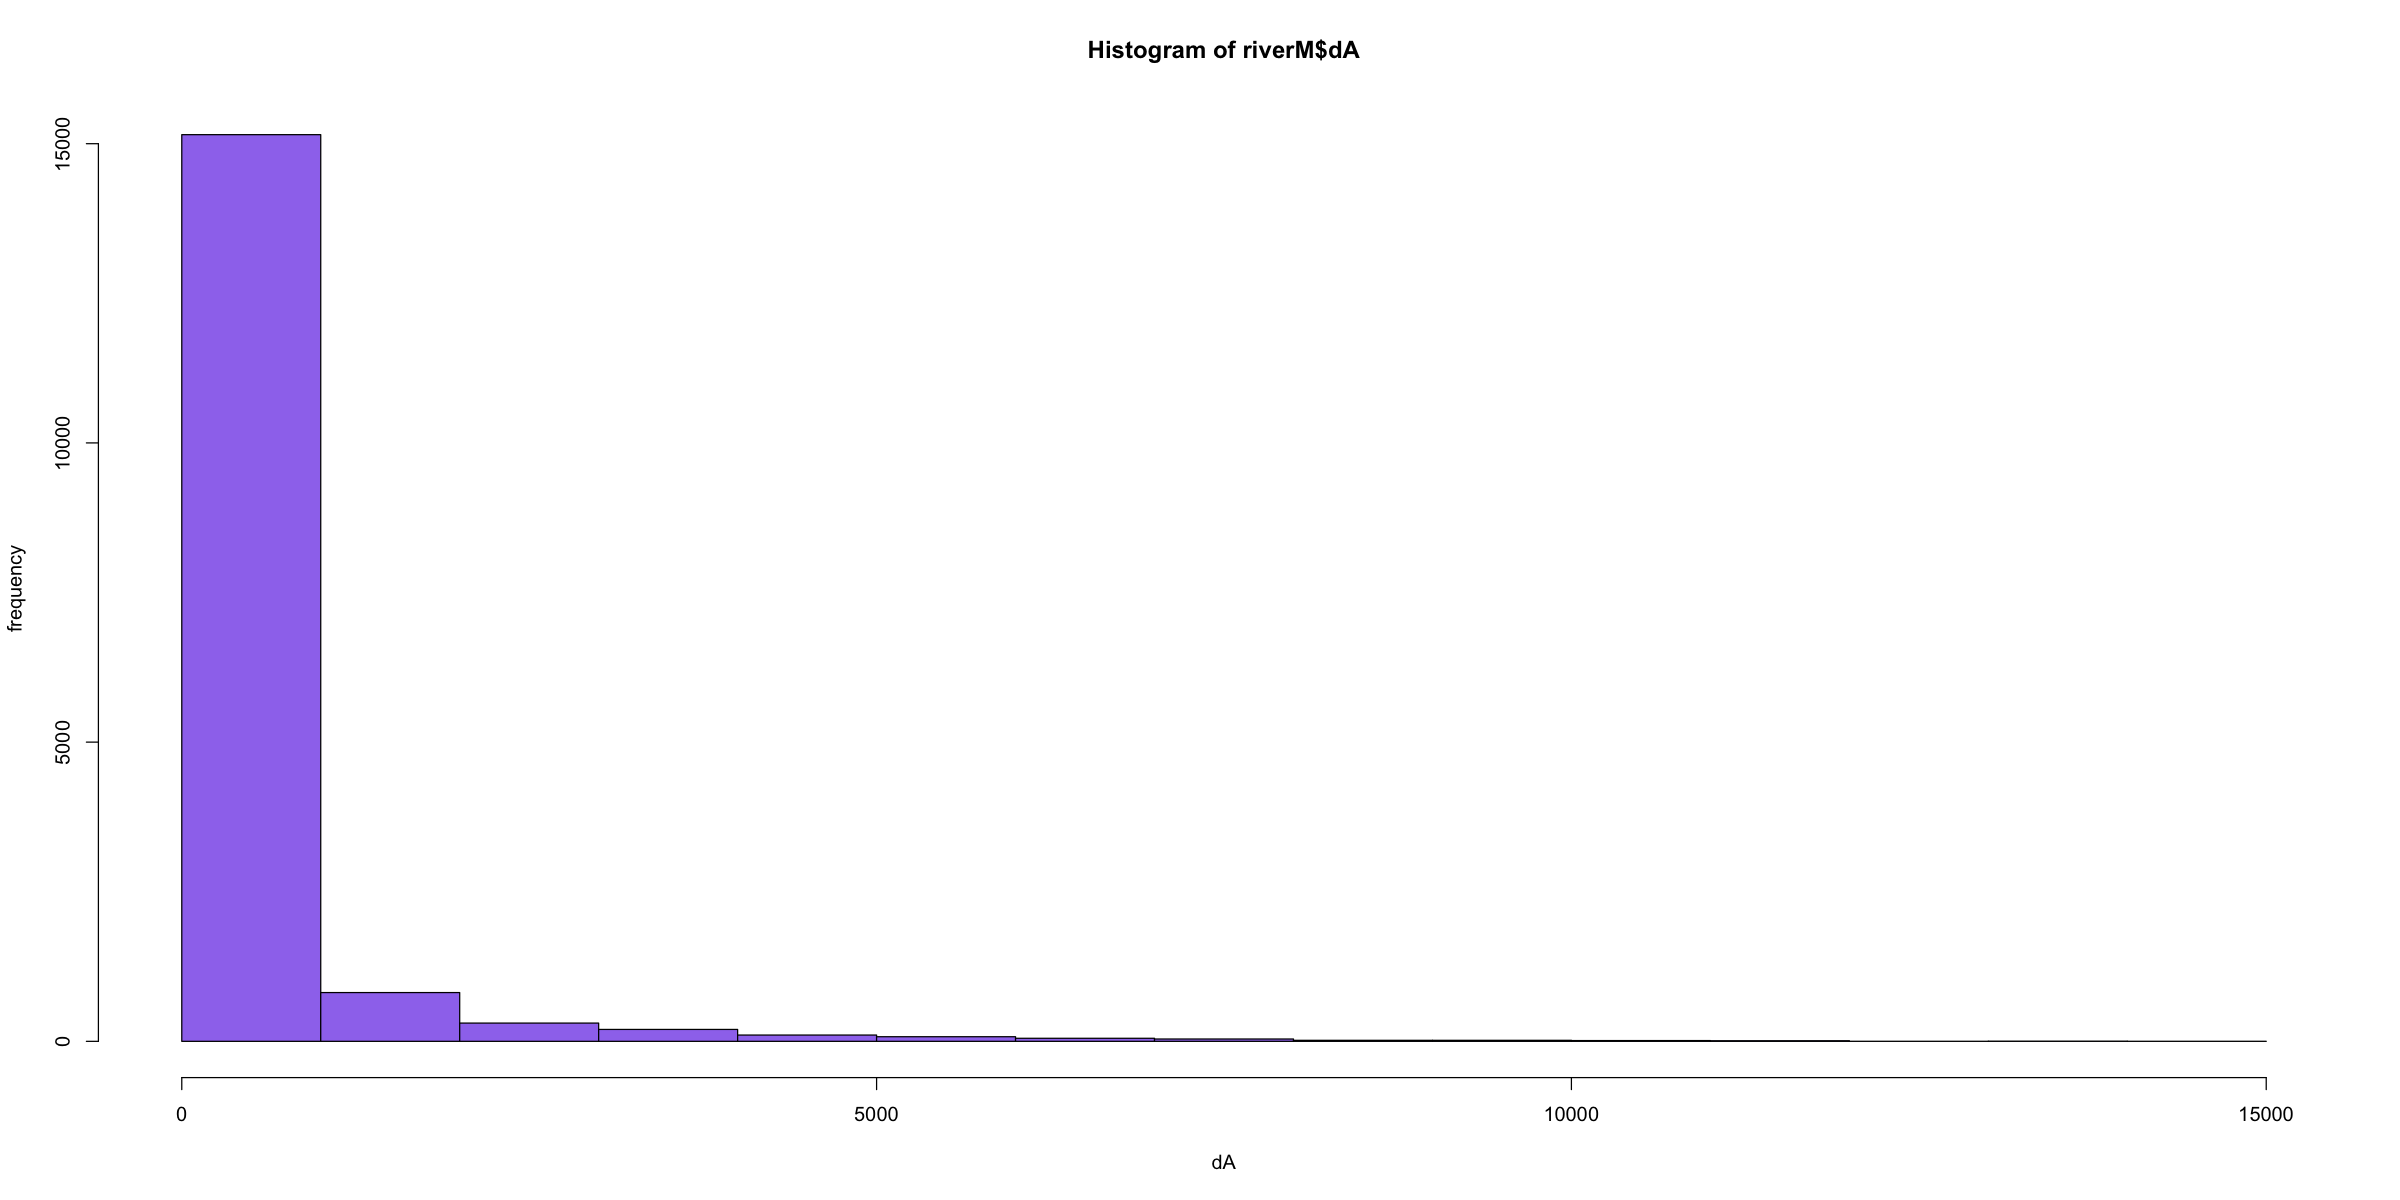

In [19]:
hist(riverM$dA, xlab="dA", ylab="frequency", col="mediumpurple2")

### VII - Matrice de corrélations

In [20]:
#Modification du jeu de données
todrop = c('site_no','station_name','U','Q5_GSCD','Q10_GSCD','Q20_GSCD','Q80_GSCD','Q90_GSCD','Q95_GSCD','QMEAN_GSCD')
riverCORR = riverM[,!(names(riverM) %in% todrop)]

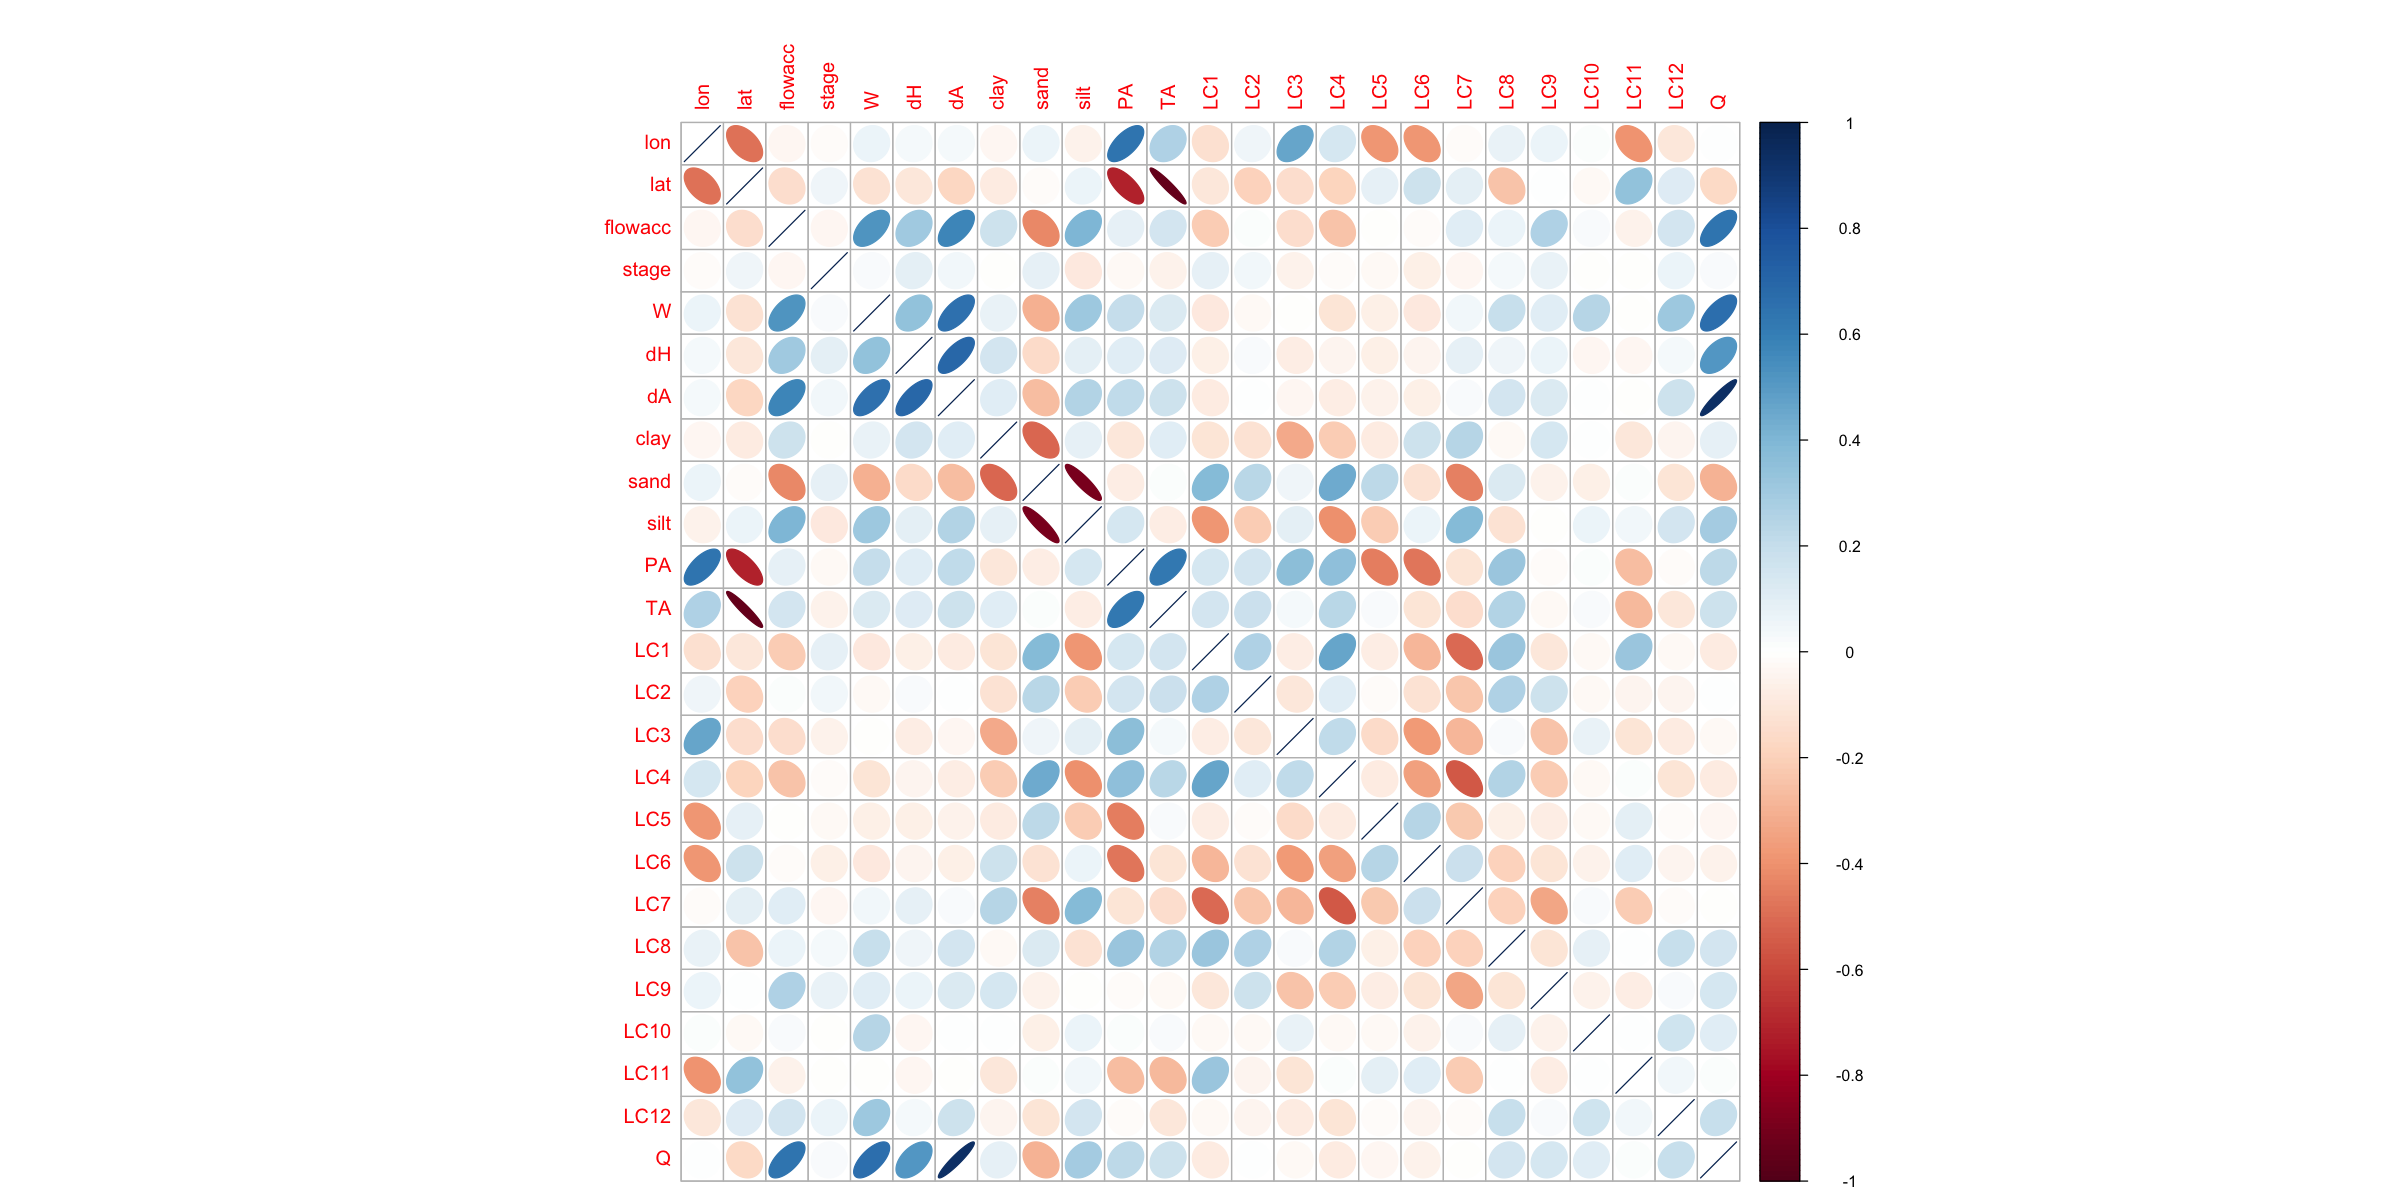

In [21]:
corrplot(cor(riverCORR), method="ellipse")

**Variables les plus fortement corrélées avec le débit (Q)**
- dA
- W
- flowacc
- dH
- sand

Remarques : Les trois premières ont une corrélation assez forte, c'est déjà beaucoup plus faible pour les suivantes. Concernabt sand, c'est une corrélation négative.

### VIII - Analyse en Composantes Principales (ACP)

**Objectif** : Réduire la dimension du problème de grande taille.  
**Reformulation** : Regrouper les différentes variables du problème au sein de méta-variables qui vont permettre d'analyser les données plus facilement.
**Méthode** : Projeter les p variables évoluant dans un espace vectoriel de dimennsion p (ici, p=24) dans un sous-espace vectoriel de dimension beaucoup plus petite. On remplcae ensuite le nuage de points initial par sa projection orthogonale sur le sous-espace ainsi défini.

In [22]:
#Modification du jeu de données
todrop2 = c('Q')
riverACP = riverCORR[,!(names(riverCORR) %in% todrop2)]

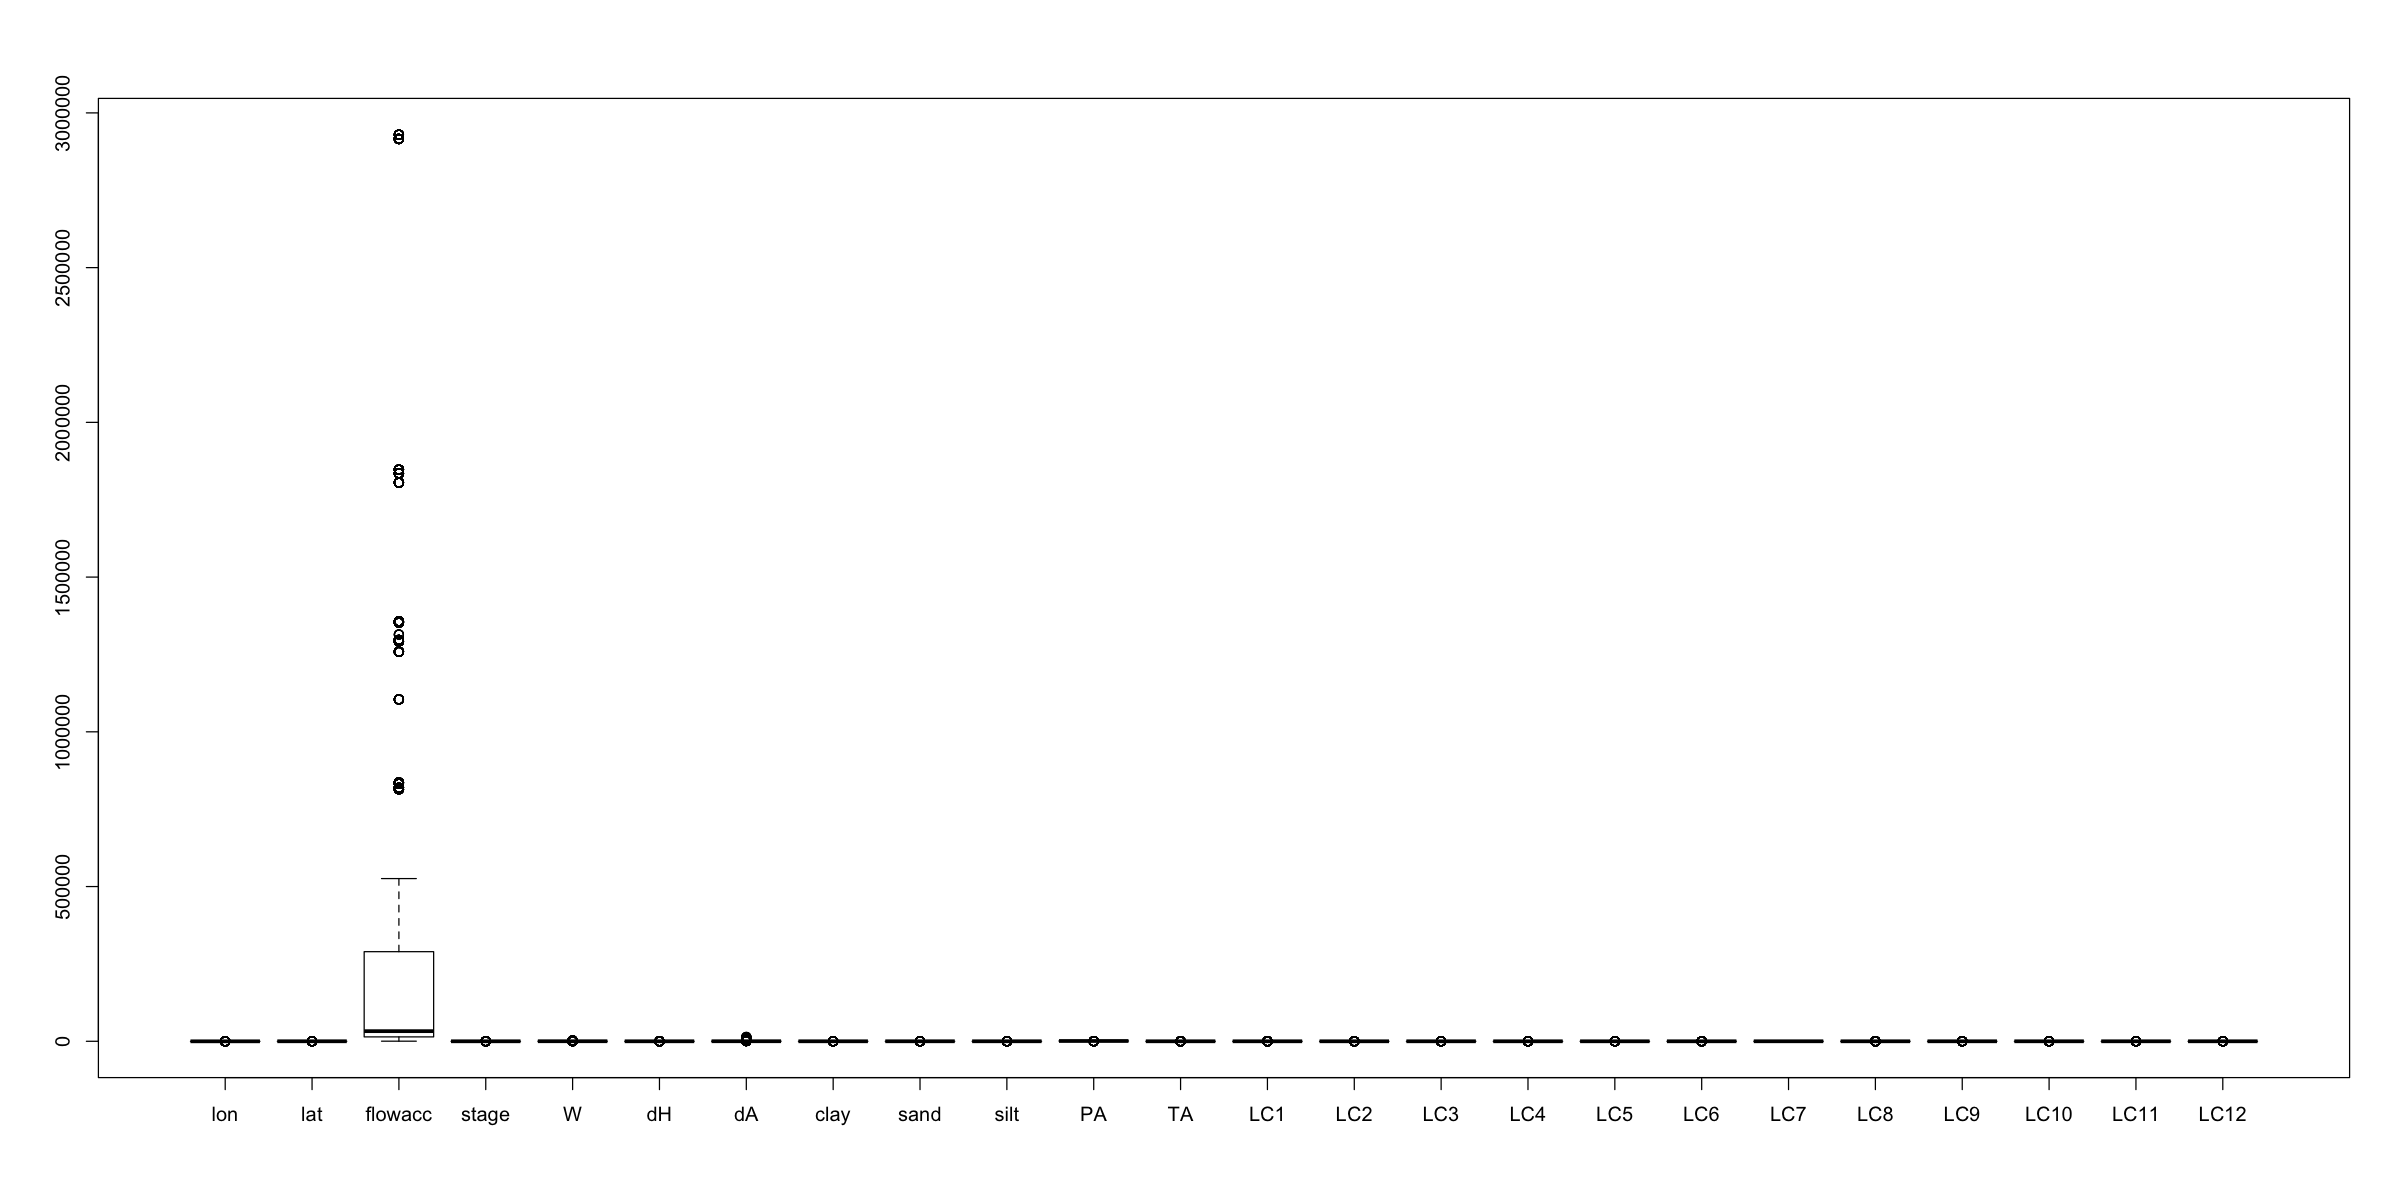

In [23]:
boxplot(riverACP)

Nécessité de normaliser les données car la variable *flowacc* prend des valeurs beaucoup plus grandes que celles des autres variables.

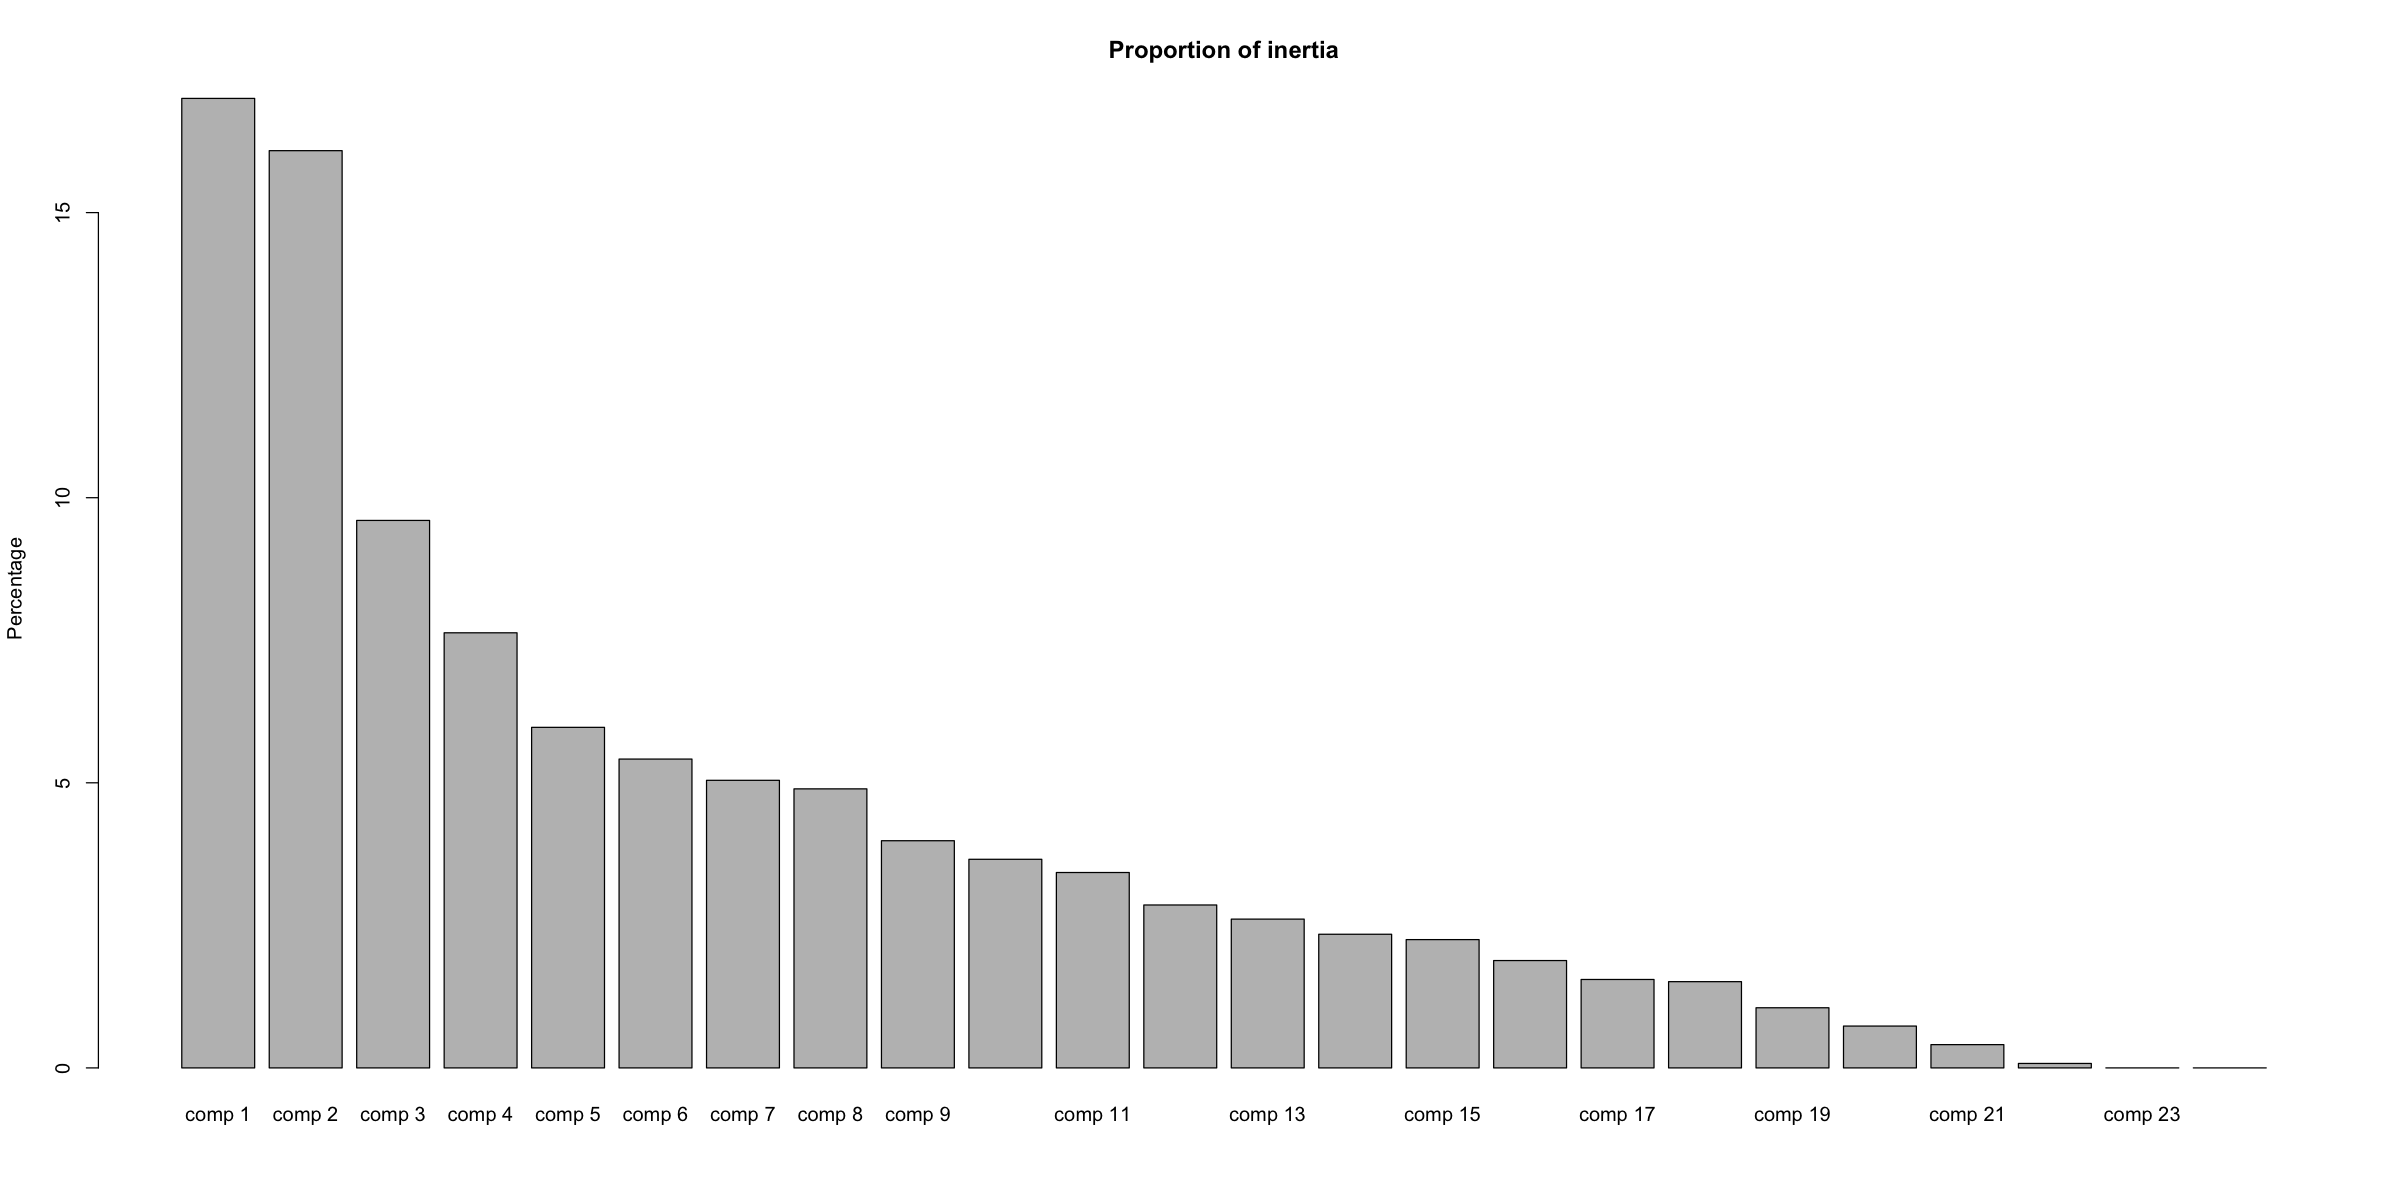

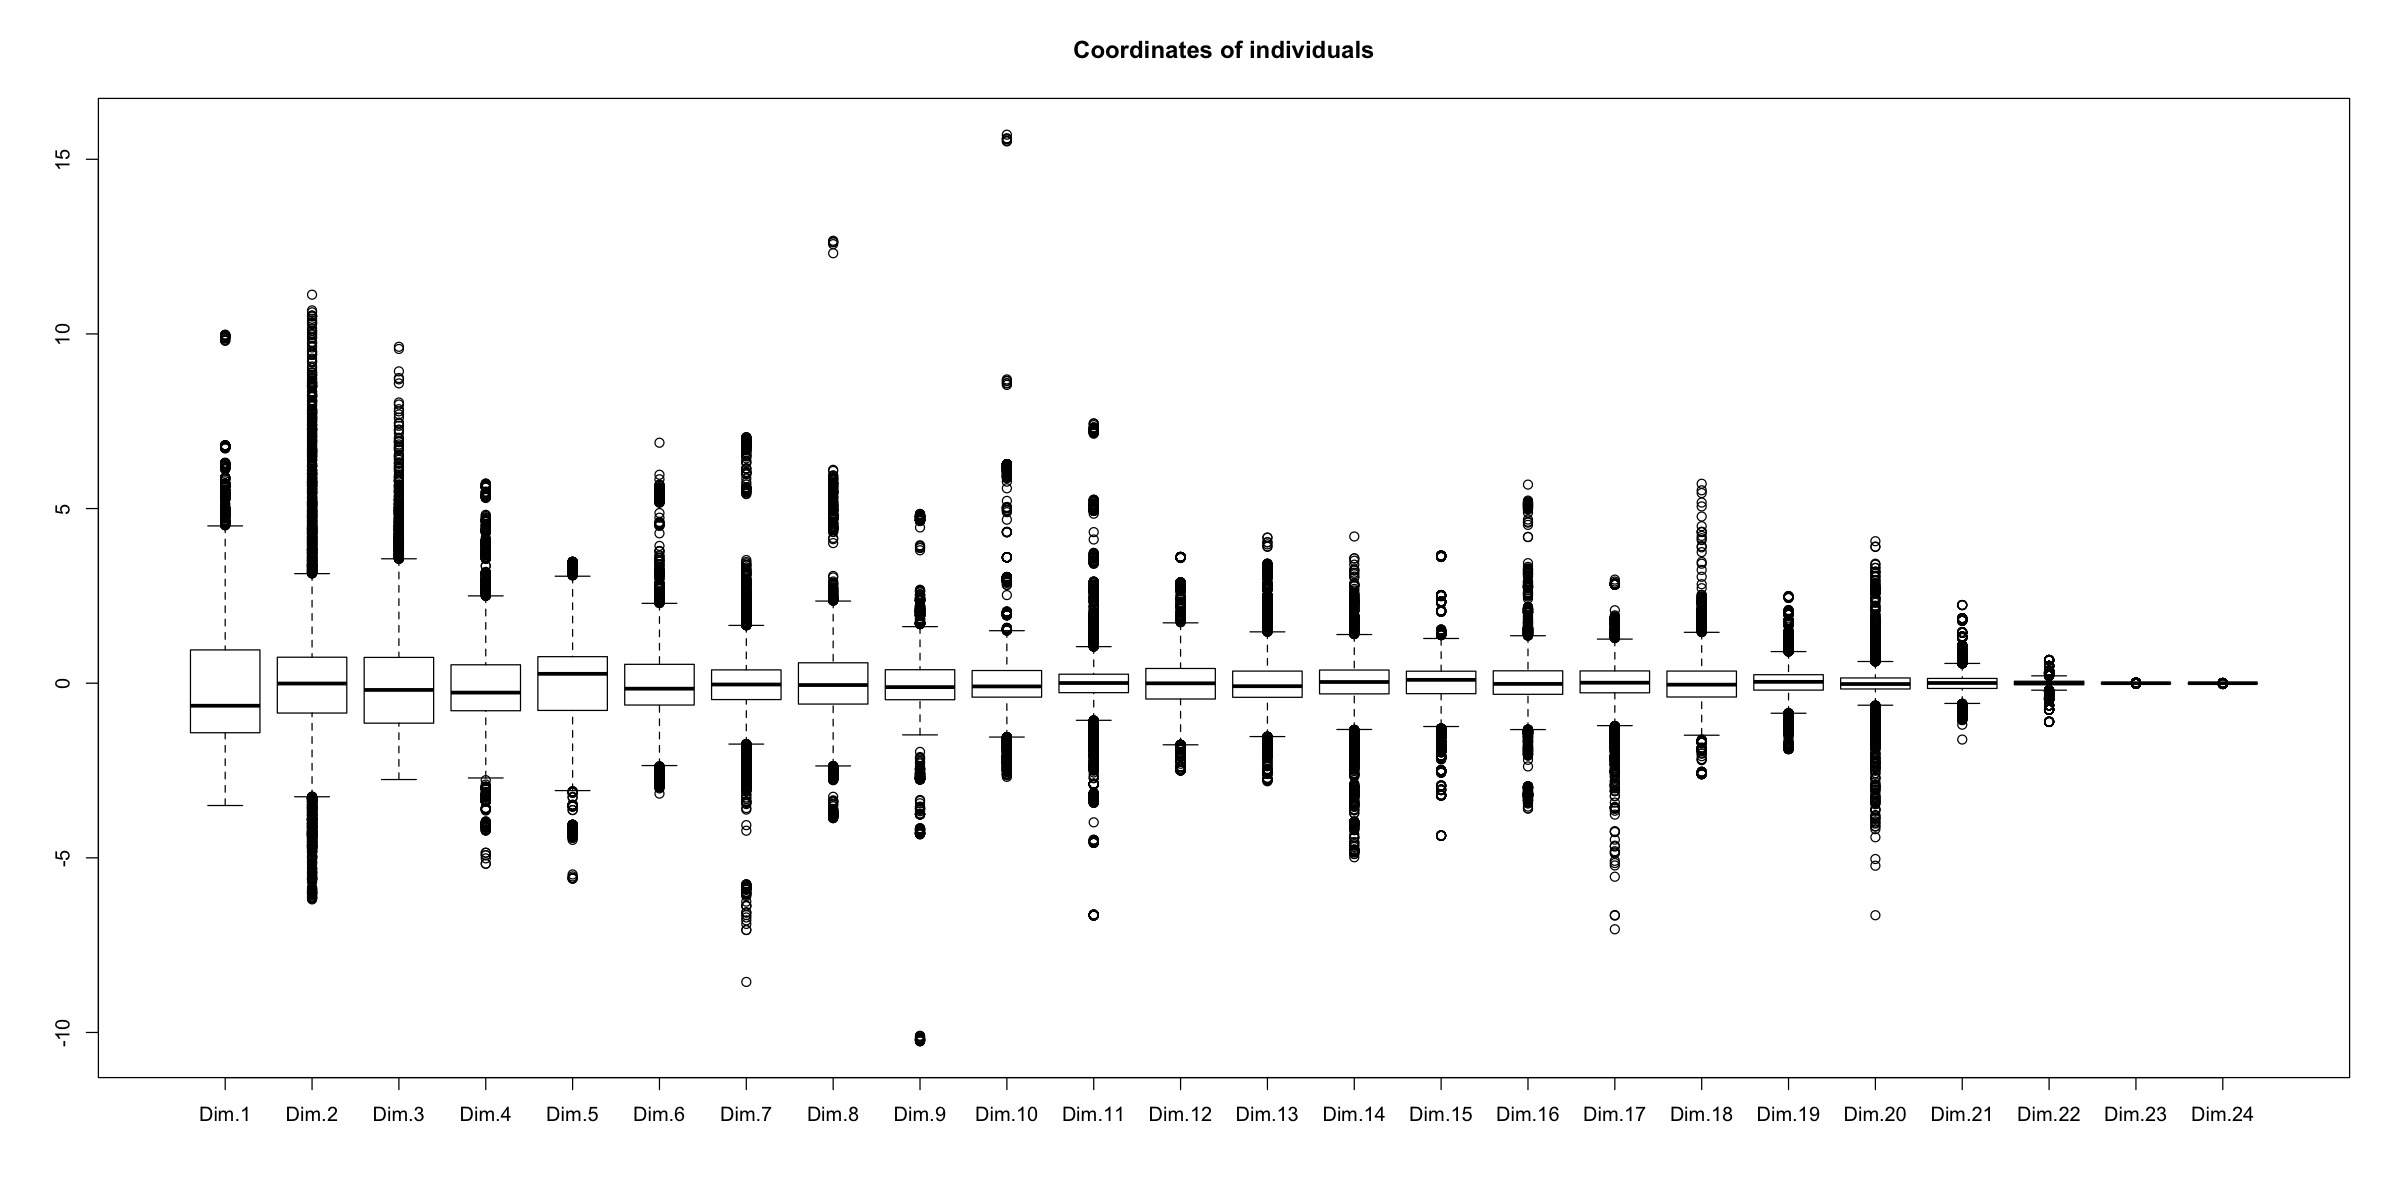

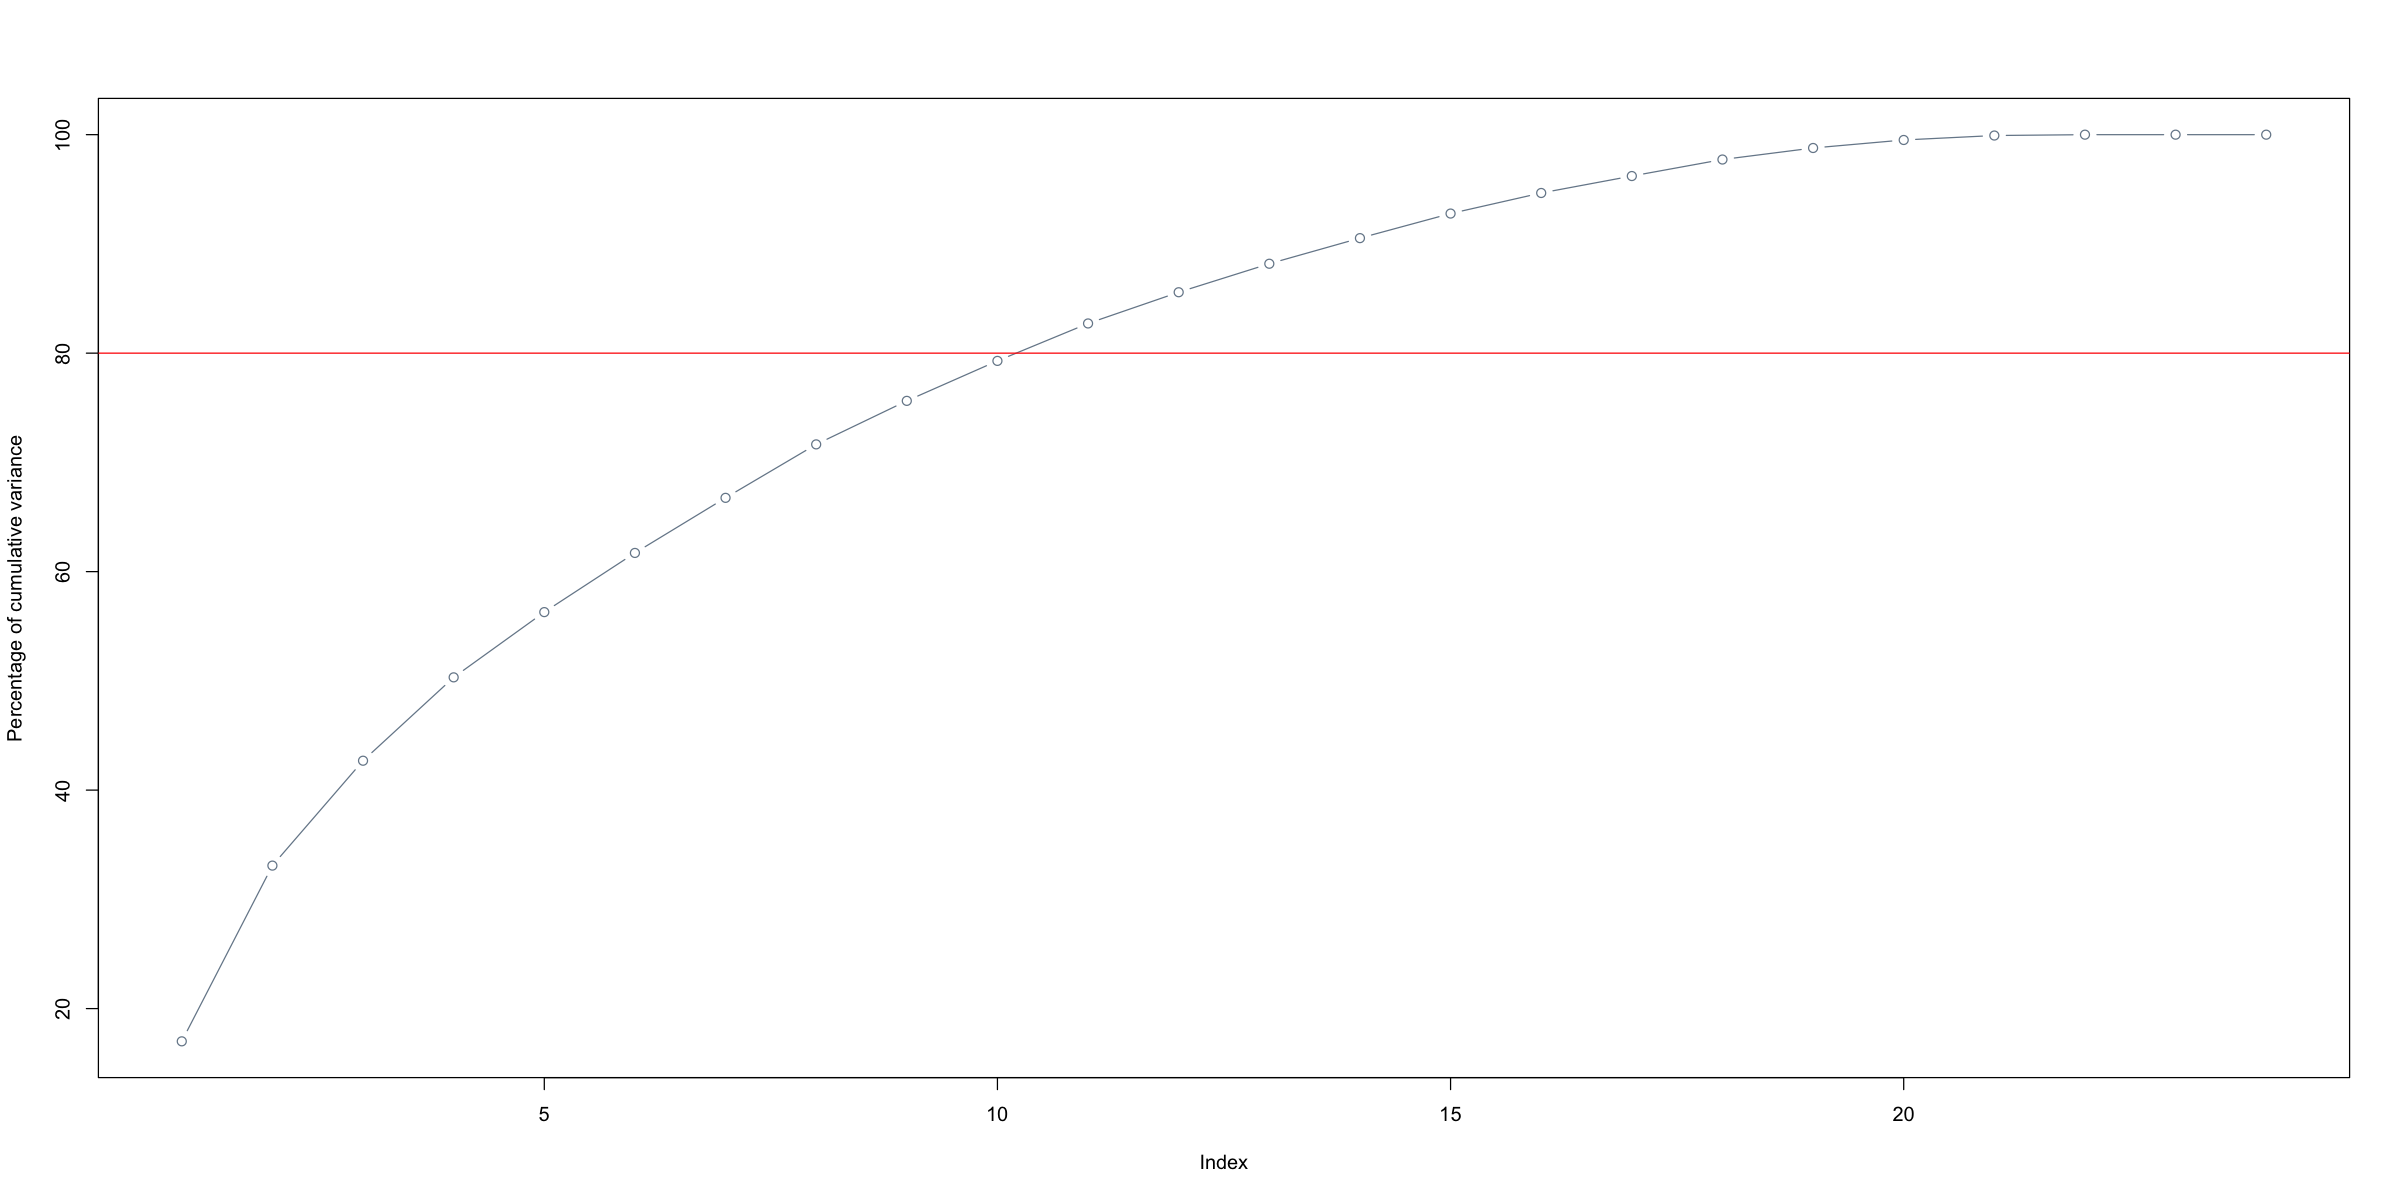

In [24]:
ACP = PCA(riverACP, scale=TRUE, graph=FALSE, ncp=24)
barplot(ACP$eig[, 2], ylab = "Percentage", main = "Proportion of inertia")
boxplot(ACP$ind$coord, main = "Coordinates of individuals")
plot(cumsum(ACP$eig[, 2]), type='b', col='lightslategrey', ylab="Percentage of cumulative variance")
abline(h=80, col='red')

#### Choix du nombre de composantes

**Étape 1** : Trouver un vecteur *v1* tel que Var(Xv1) est maximale (cela revient à former une combinaison linéaire des colonnes de X). X est la matrice du problème, et *v1* est la direction de ce que l'on appelle la première composante. Xv1 est ainsi les coordonnées du nuage de point sur ce nouvel axe.  
**Étape 2** : Faire de même pour *v2*, *v3*, ..., *vp*, en rajoutant une contrainte d'orthogonalité sur Xvi et Xvj. Les *vk* correspondent aussi aux vecteurs propres de la matrice de variance-covariance.  
**Étape 3** : On obtient donc nos p nouveaux axes et composantes, et il faut sélectionner les r composantes qui permettent d'expliquer en grande partie les données. Pour cela, on regarde les deux graphiques ci-dessus (pourcentage d'inertie et boxplot des composantes).  

**Bilan** : On pourrait garder 6 ou 10 composantes. Nous nous orientons vers 6, 1à étant un nombr de composantes déjà très important pour un problème que l'on souhaite réduire.

#### Graphiques des individus et des variables

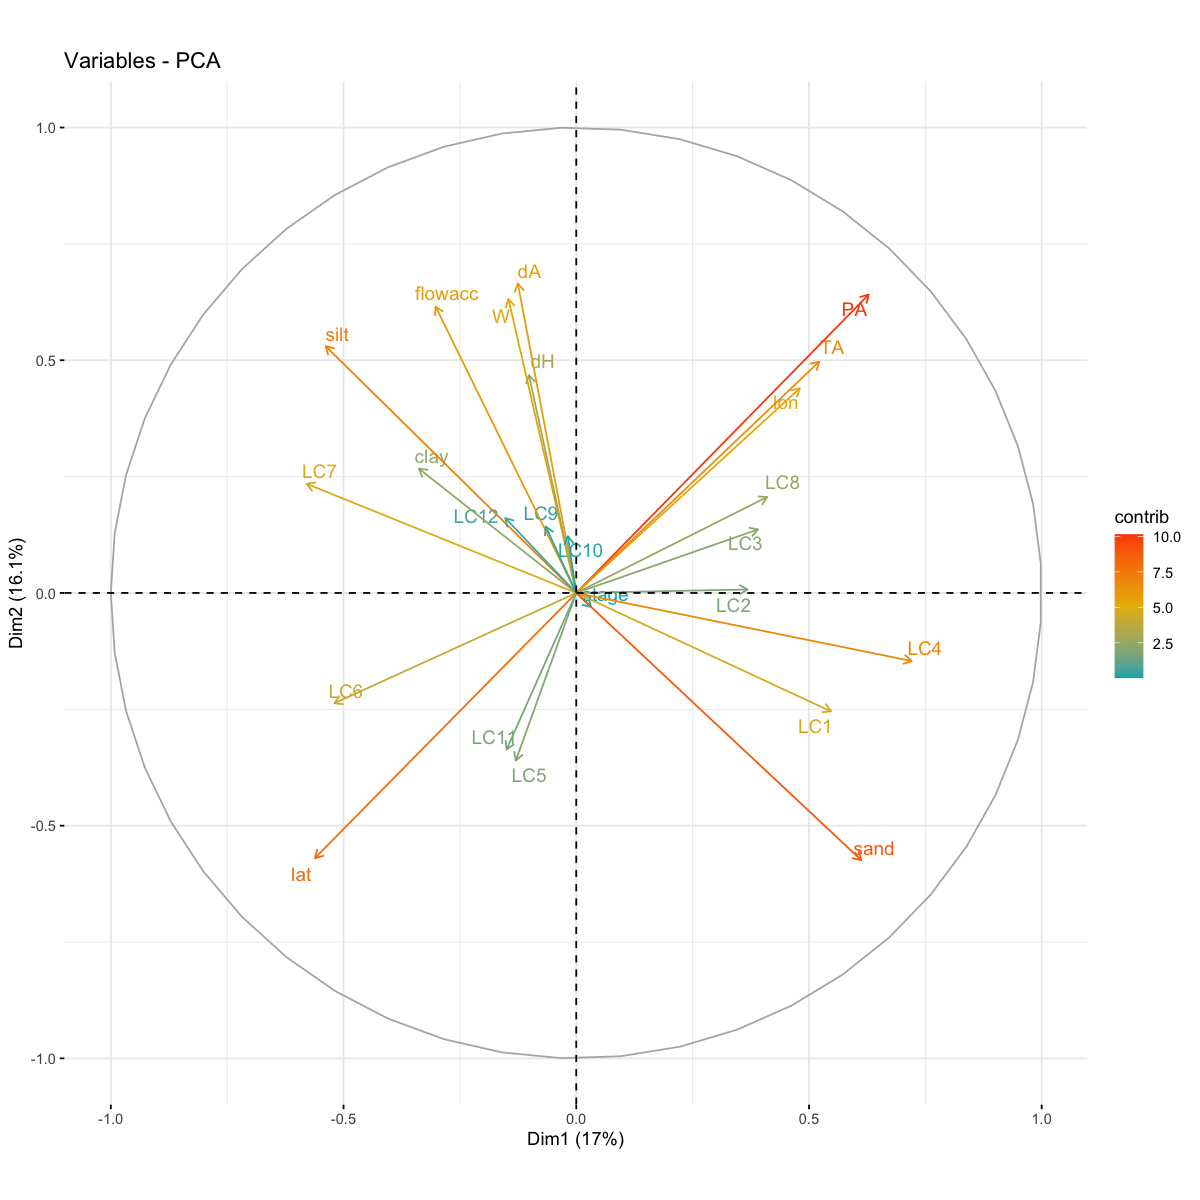

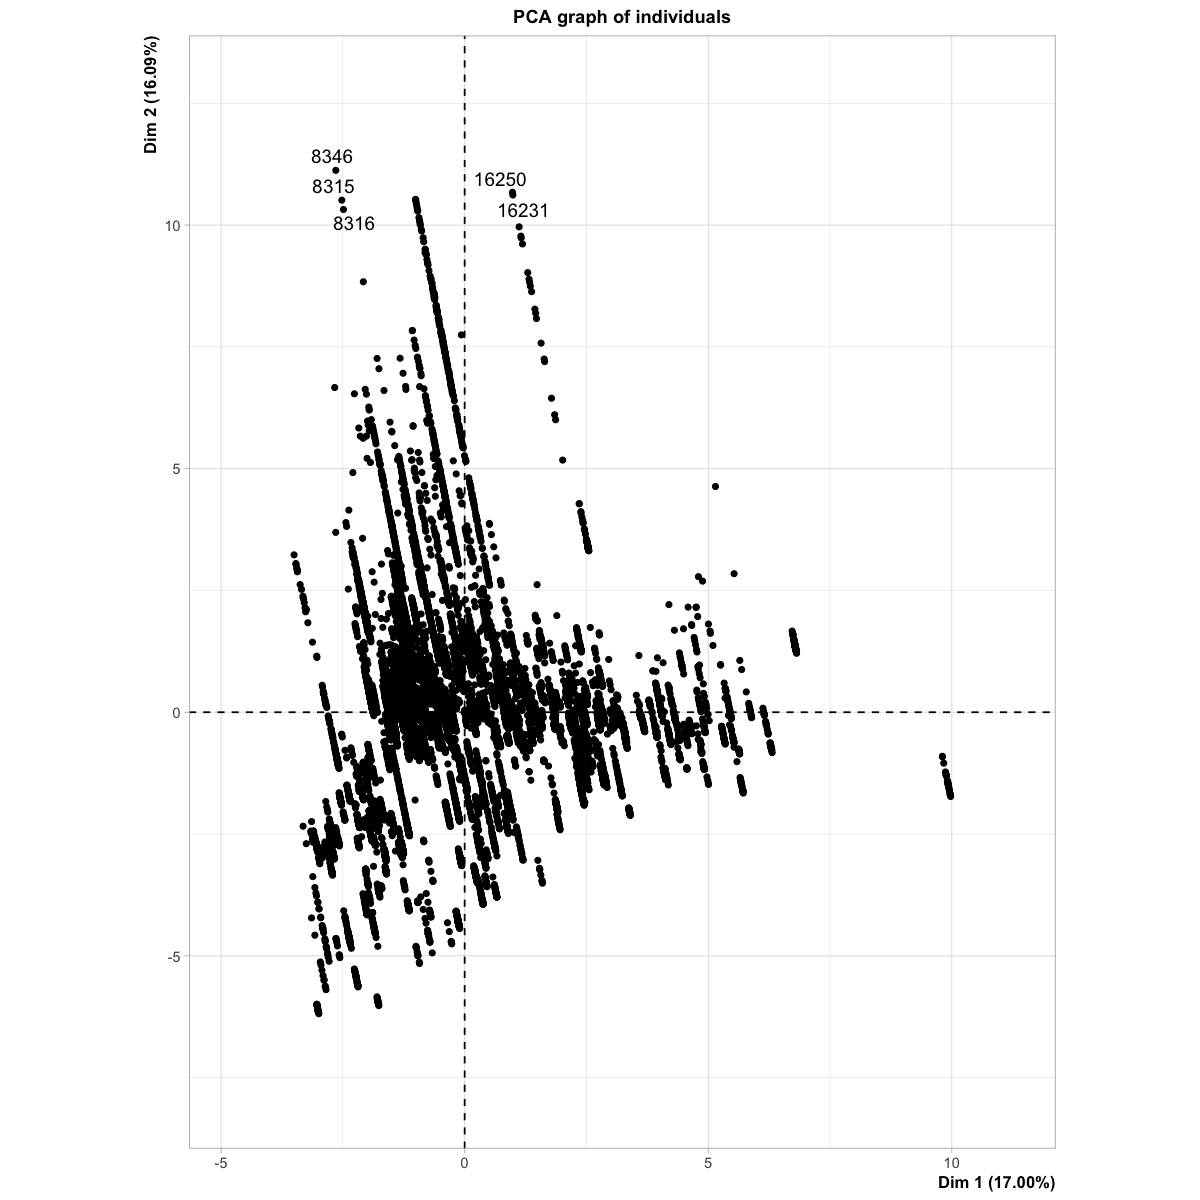

In [50]:
options(repr.plot.width=10, repr.plot.height=10)
fviz_pca_var(ACP, axes=c(1,2), col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)
plot(ACP, axes=c(1,2), choix = "ind", select = "contrib 5", unselect = 0)

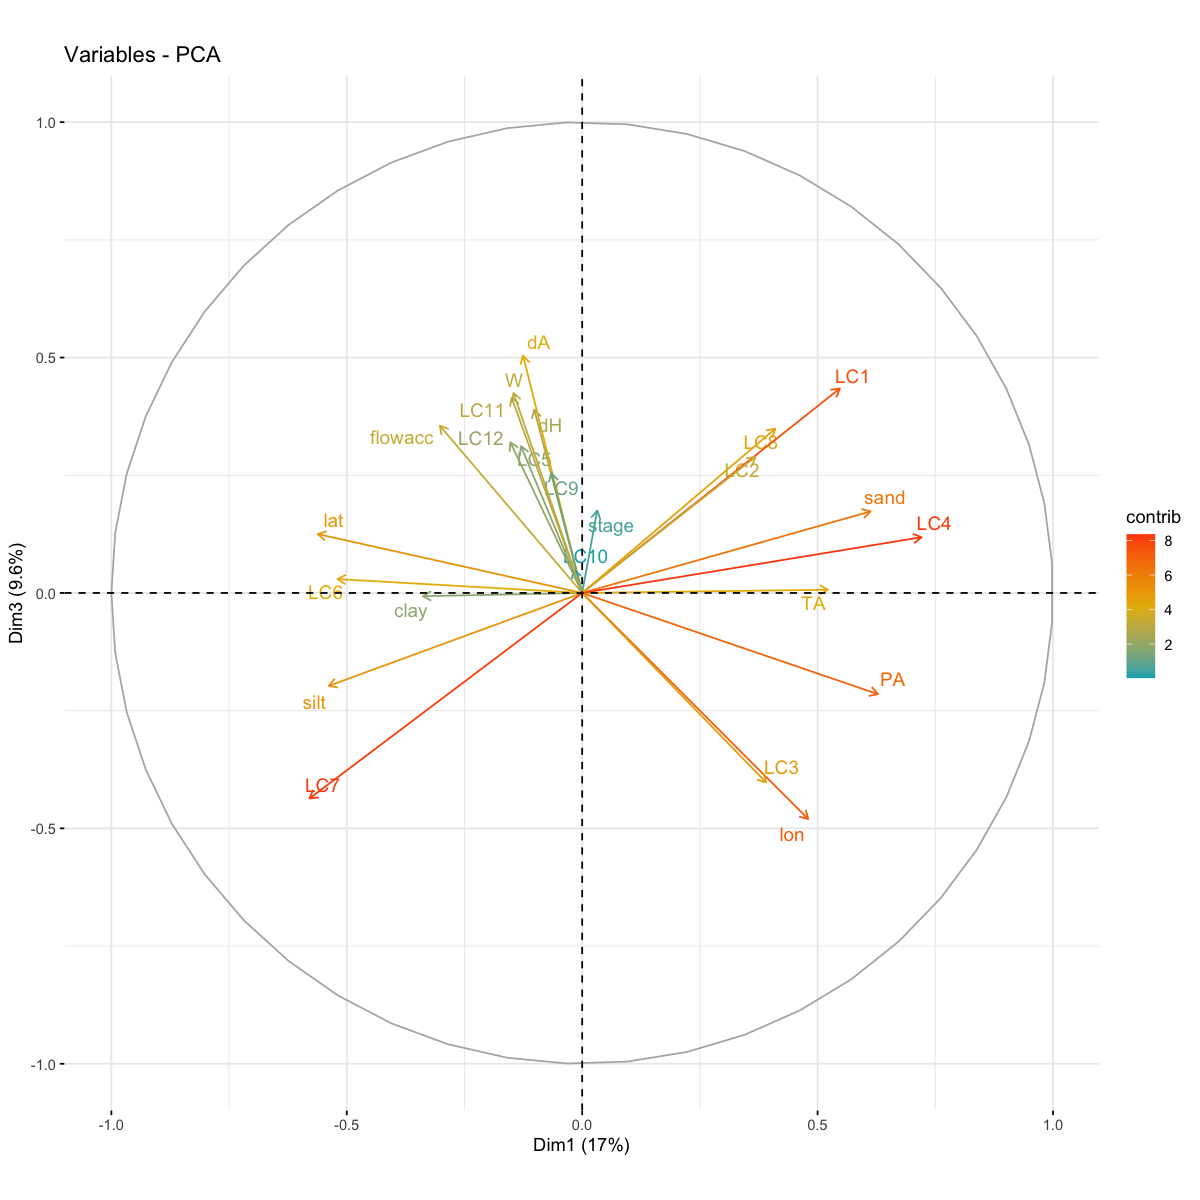

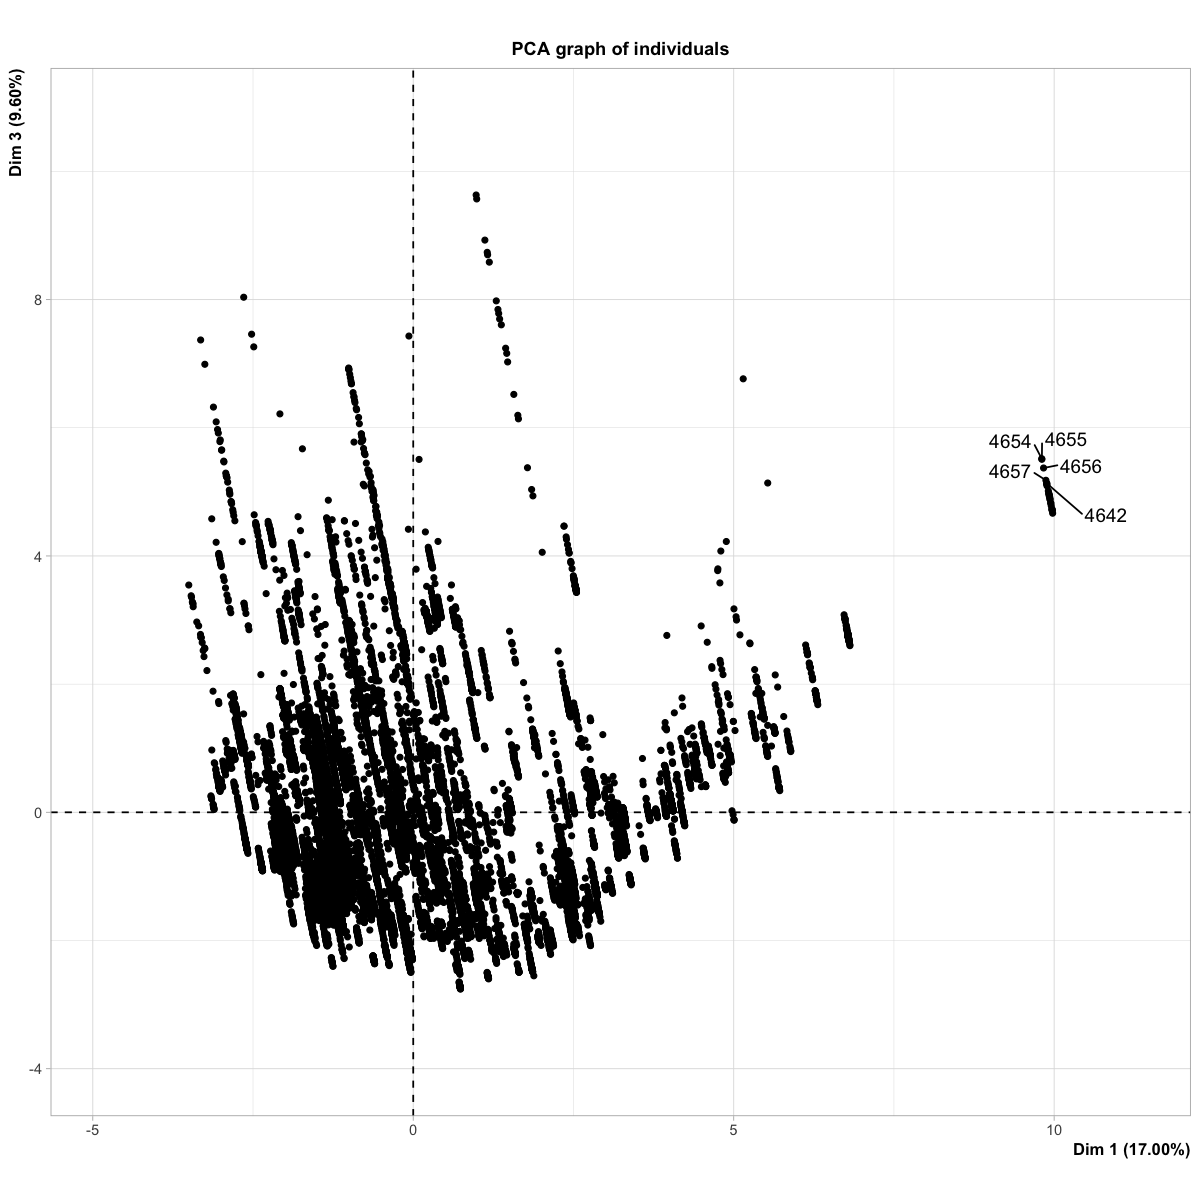

In [55]:
options(repr.plot.width=10, repr.plot.height=10)
fviz_pca_var(ACP, axes=c(1,3), col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)
plot(ACP, axes=c(1,3), choix = "ind", select = "contrib 5", unselect = 0)

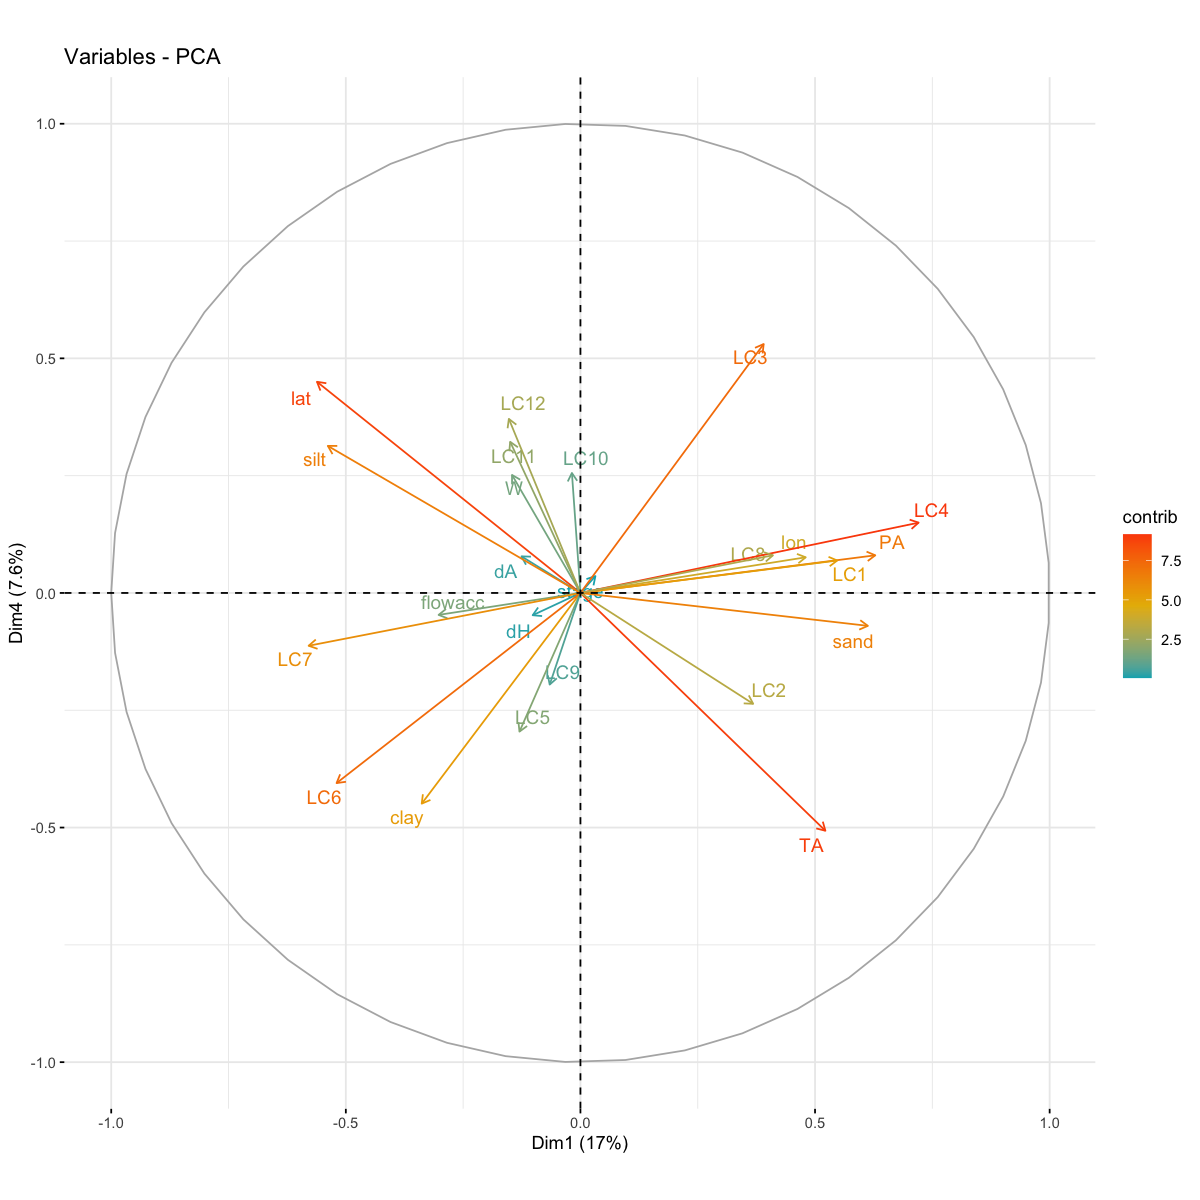

In [40]:
options(repr.plot.width=10, repr.plot.height=10)
fviz_pca_var(ACP, axes=c(1,4), col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)
#plot(ACP, axes=c(1,4), choix = "ind", select = "contrib 5", unselect = 0)

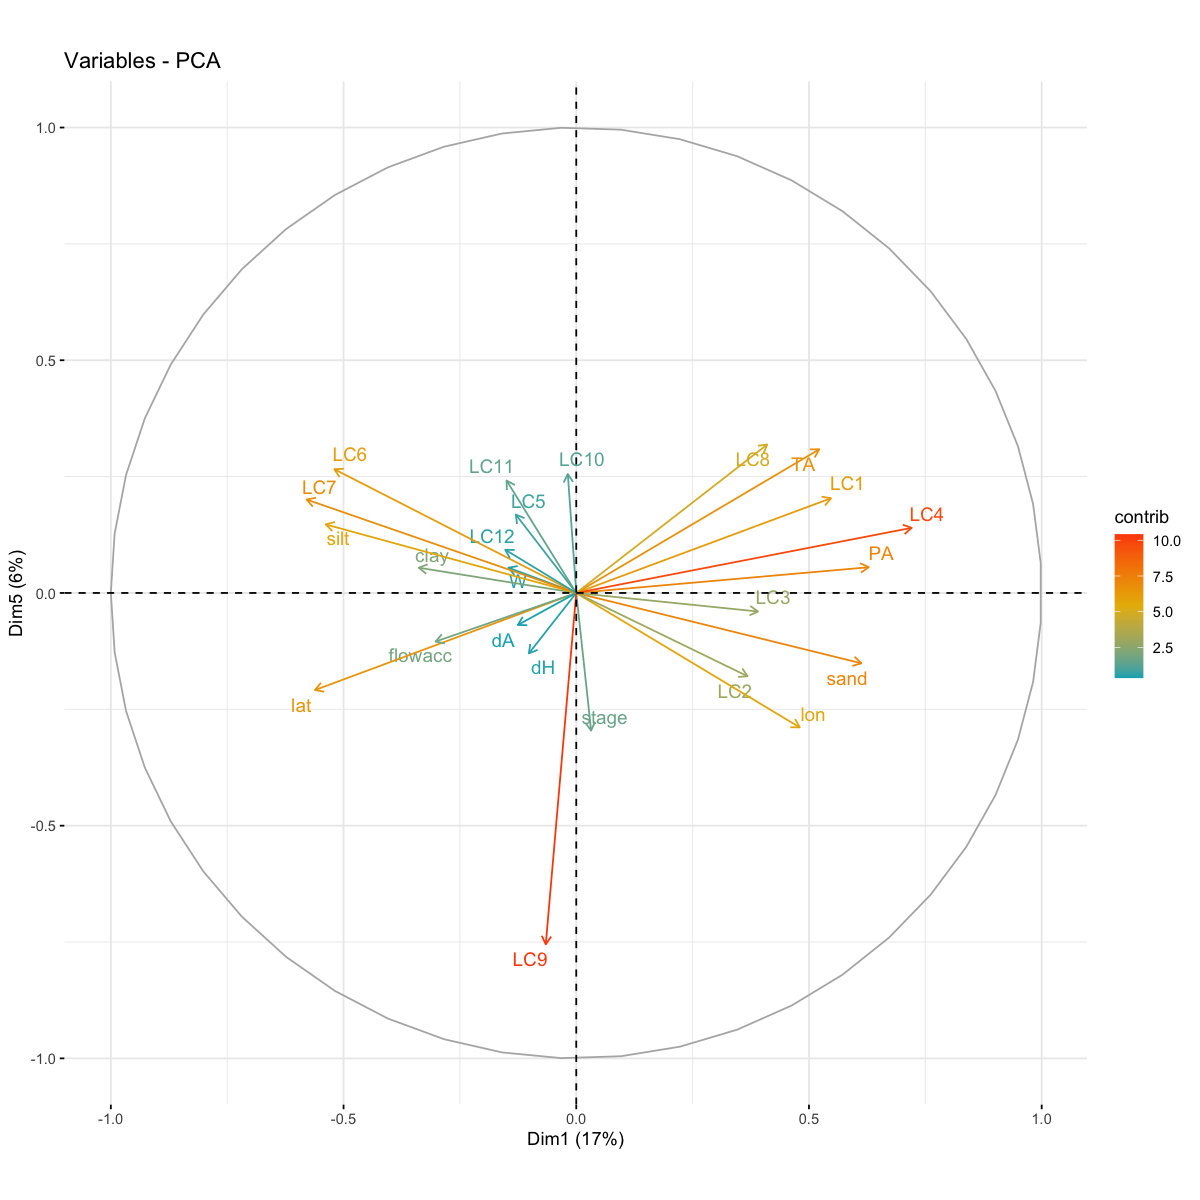

In [41]:
options(repr.plot.width=10, repr.plot.height=10)
fviz_pca_var(ACP, axes=c(1,5), col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)
#plot(ACP, axes=c(1,5), choix = "ind", select = "contrib 5", unselect = 0)

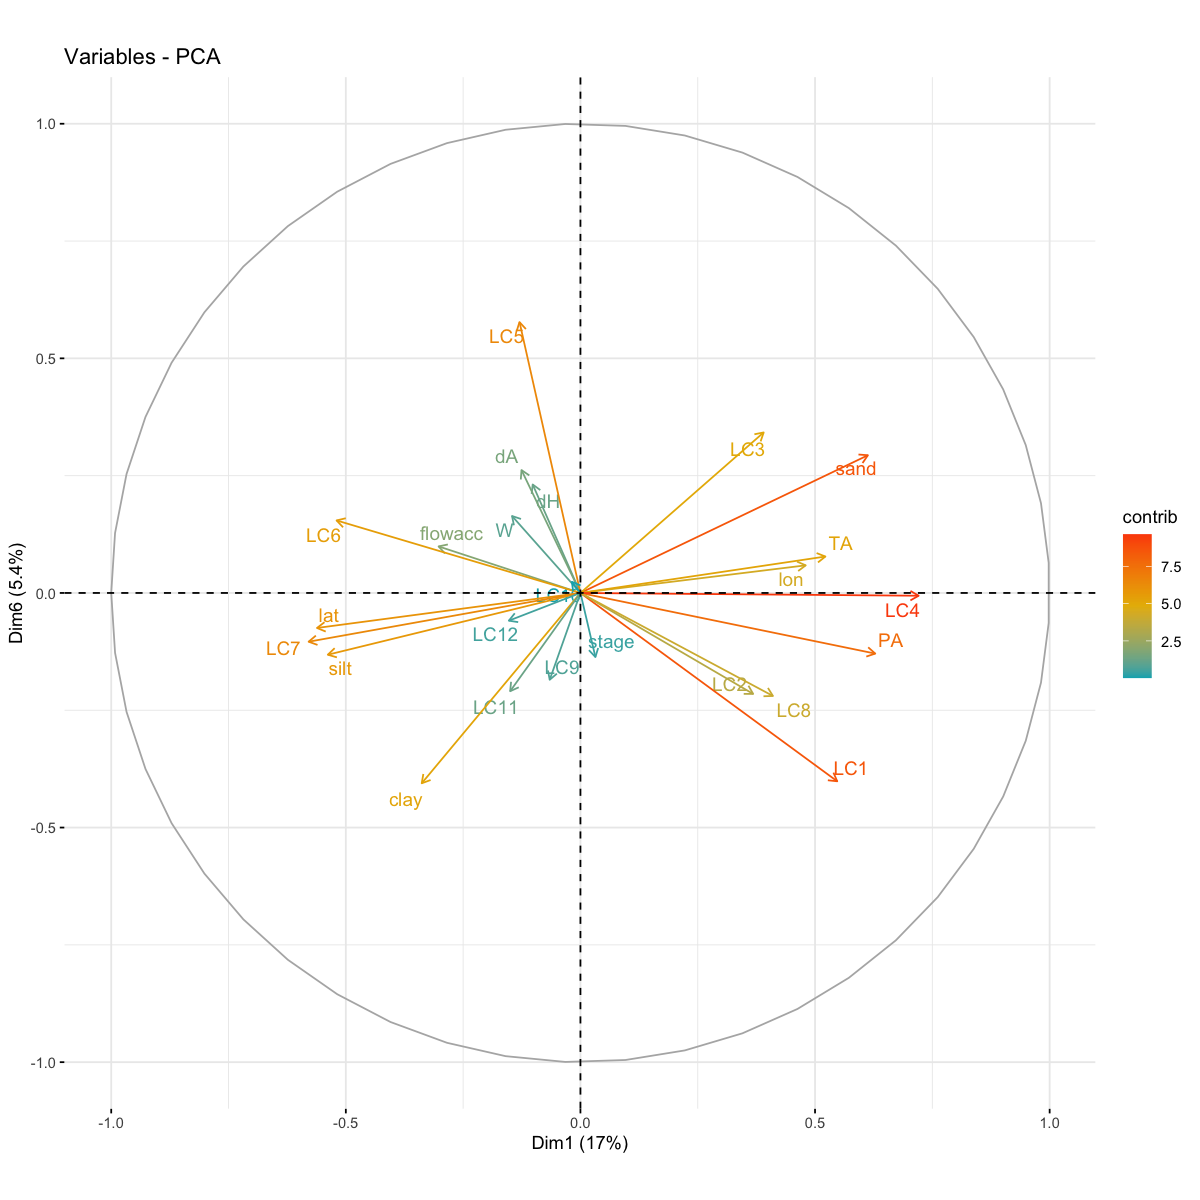

In [42]:
options(repr.plot.width=10, repr.plot.height=10)
fviz_pca_var(ACP, axes=c(1,6), col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)
#plot(ACP, axes=c(1,6), choix = "ind", select = "contrib 5", unselect = 0)

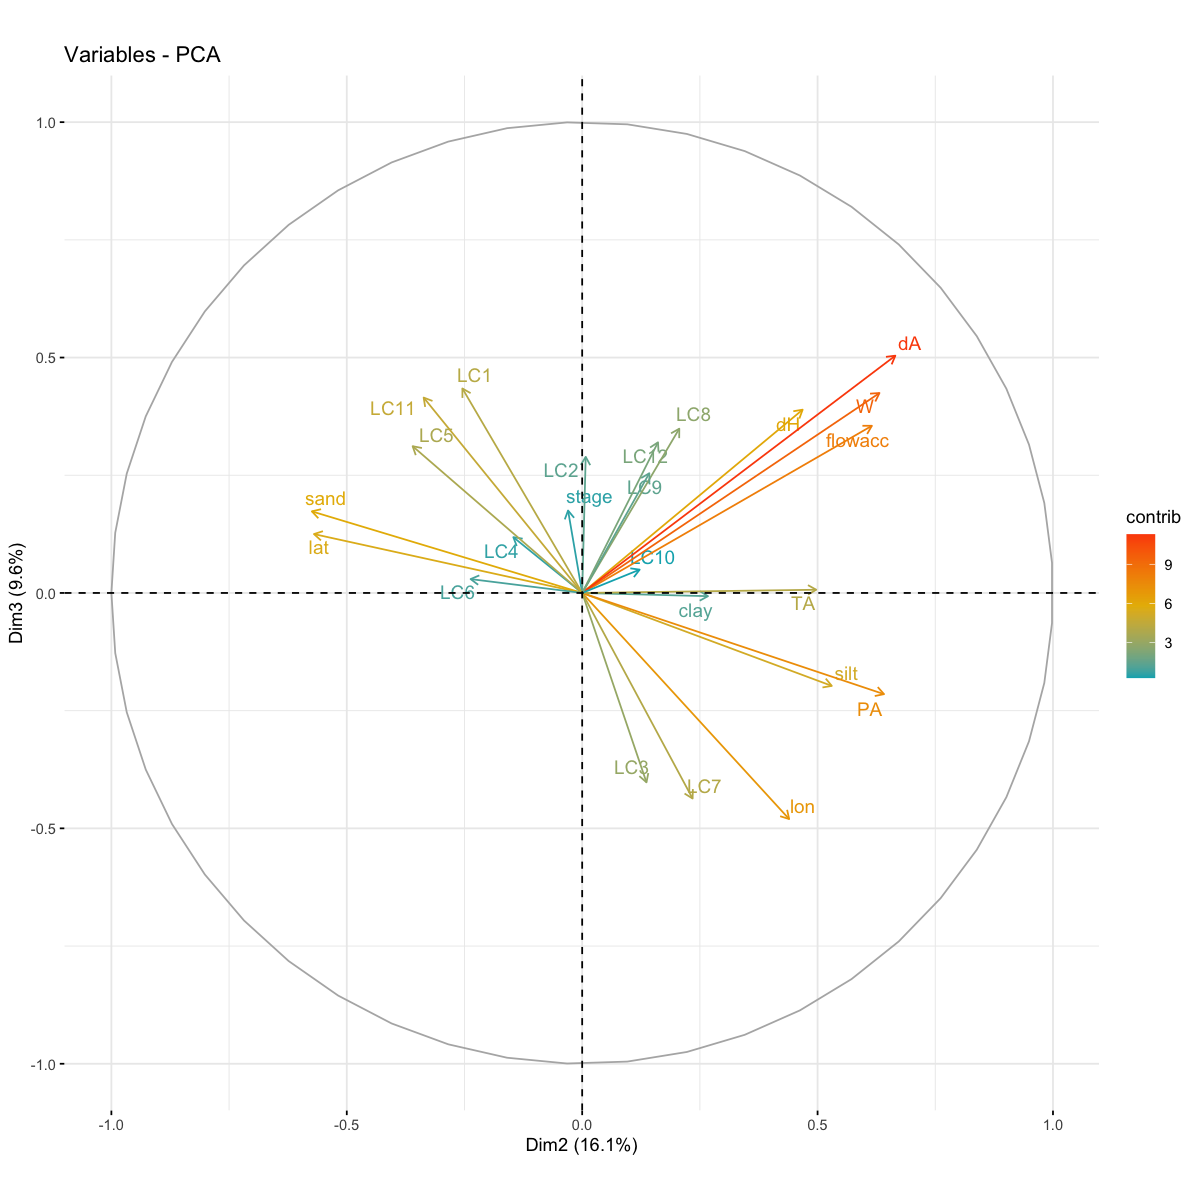

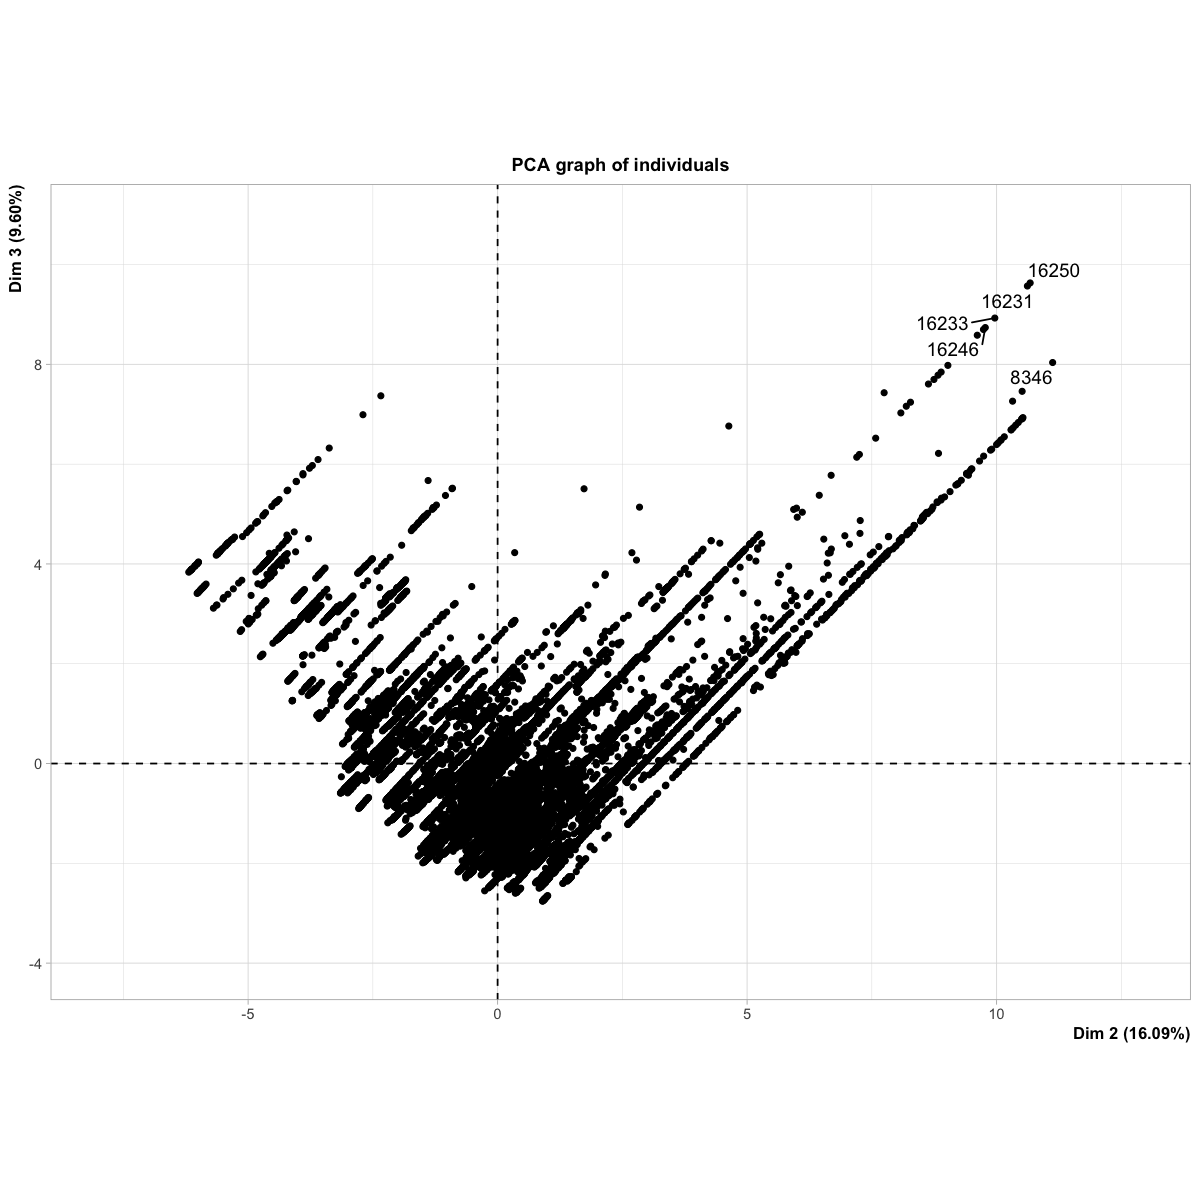

In [56]:
options(repr.plot.width=10, repr.plot.height=10)
fviz_pca_var(ACP, axes=c(2,3), col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)
plot(ACP, axes=c(2,3), choix = "ind", select = "contrib 5", unselect = 0)

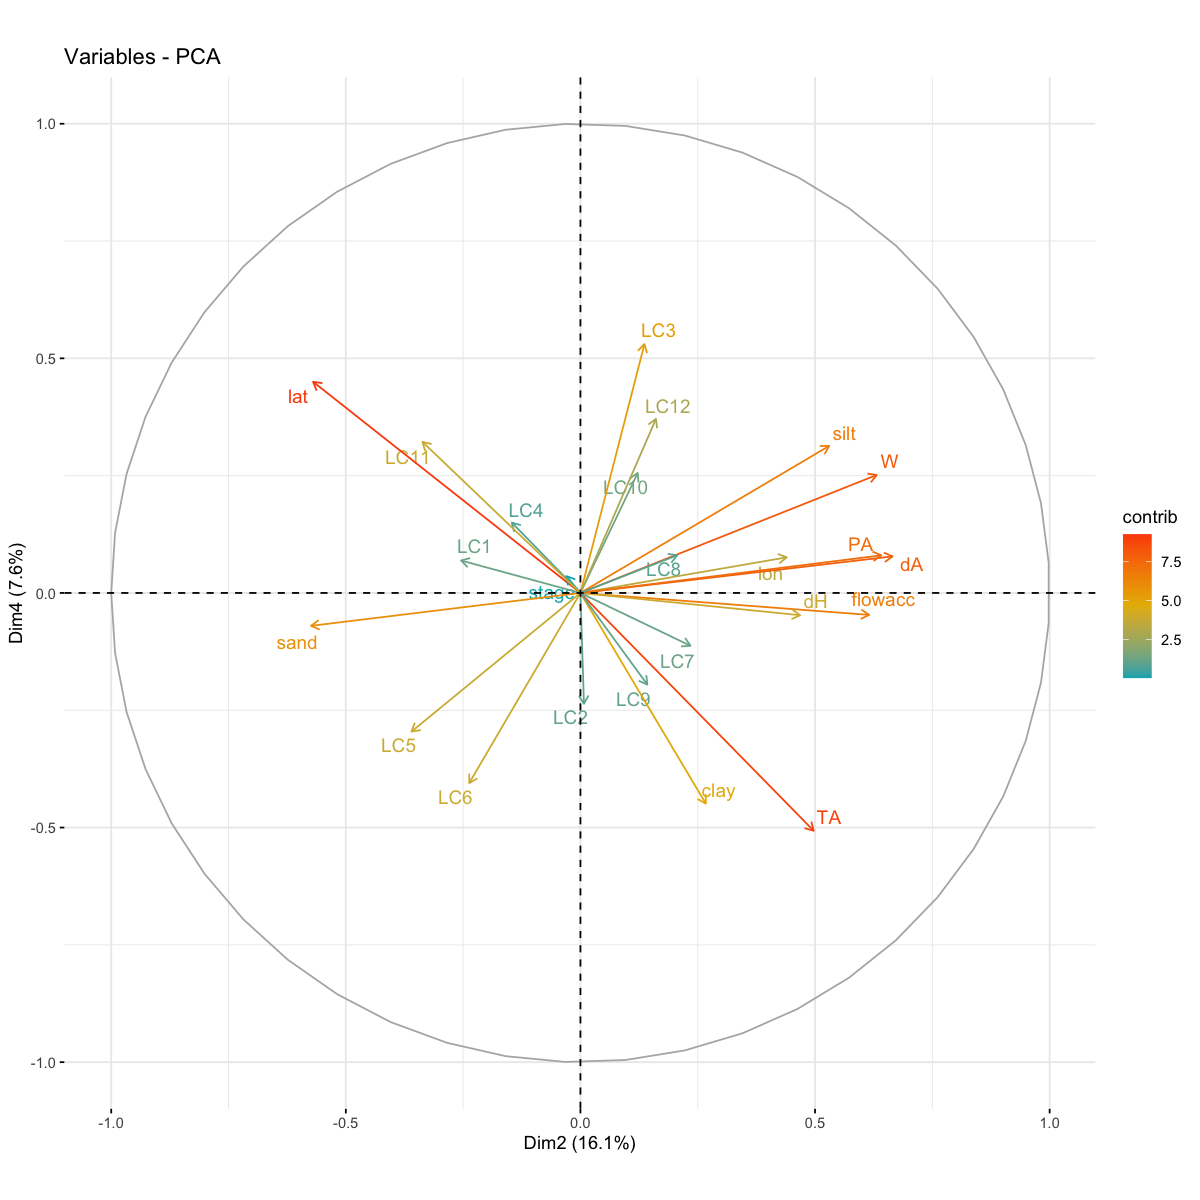

In [44]:
options(repr.plot.width=10, repr.plot.height=10)
fviz_pca_var(ACP, axes=c(2,4), col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)
#plot(ACP, axes=c(2,4), choix = "ind", select = "contrib 5", unselect = 0)

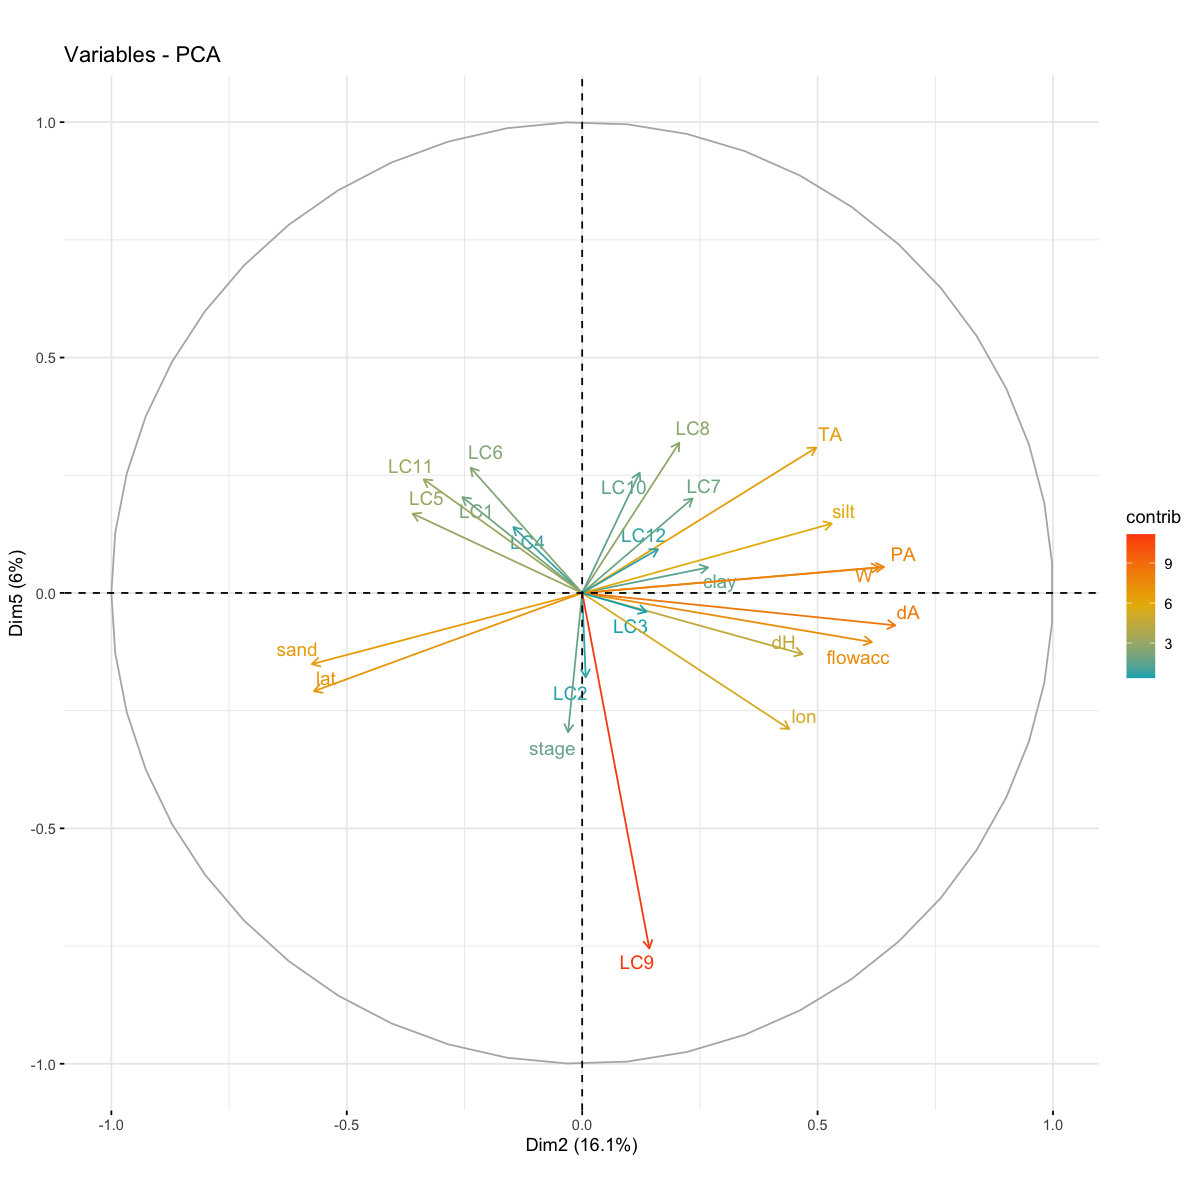

In [45]:
options(repr.plot.width=10, repr.plot.height=10)
fviz_pca_var(ACP, axes=c(2,5), col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)
#plot(ACP, axes=c(2,5), choix = "ind", select = "contrib 5", unselect = 0)

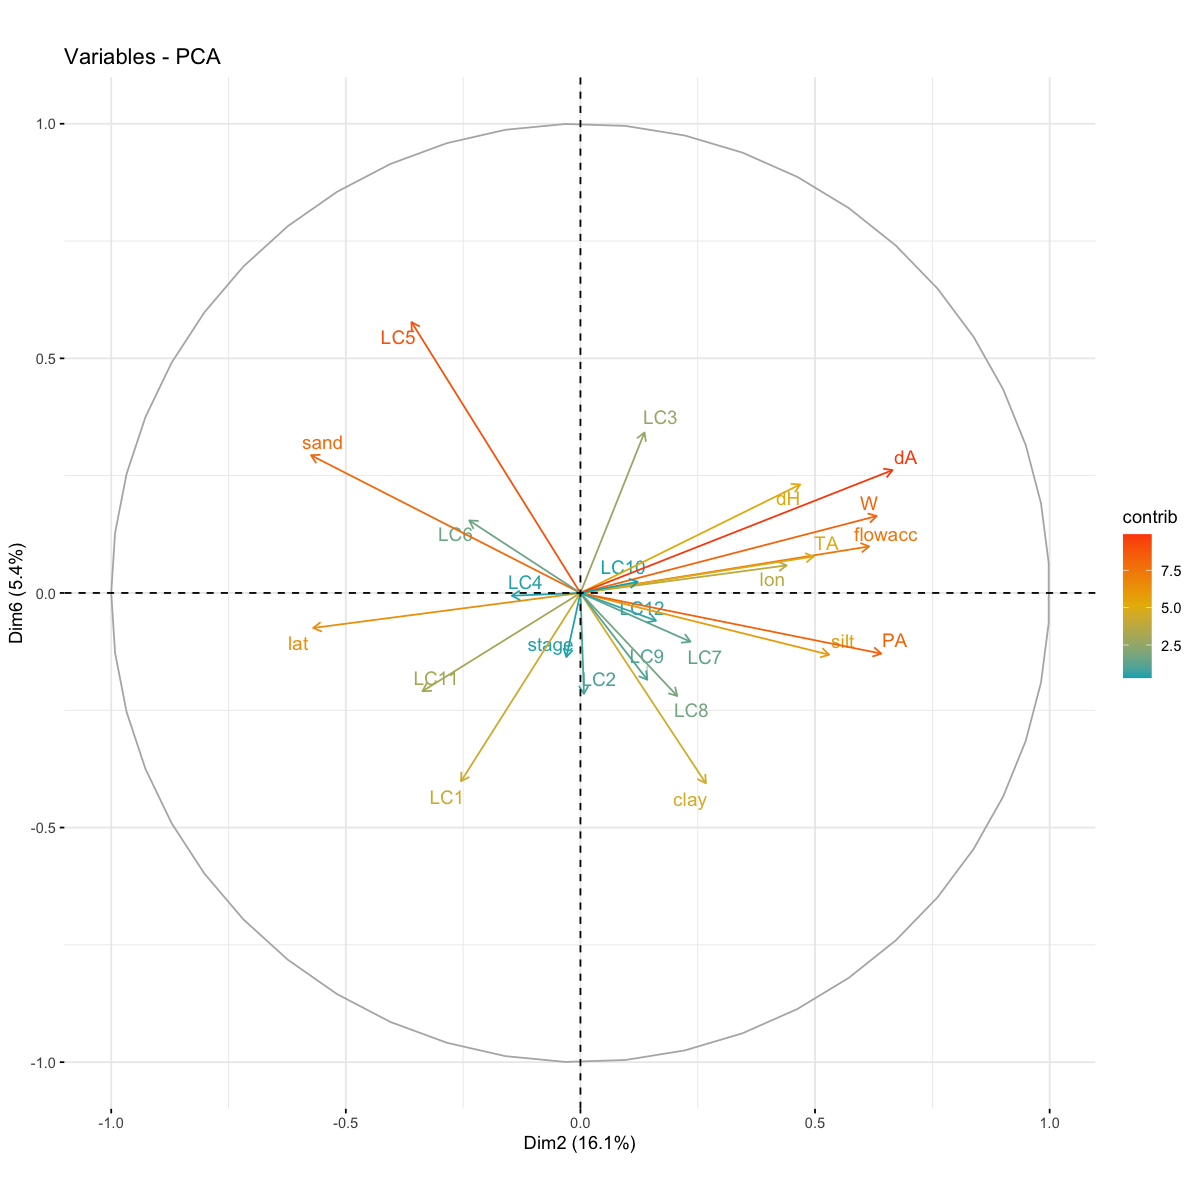

In [46]:
options(repr.plot.width=10, repr.plot.height=10)
fviz_pca_var(ACP, axes=c(2,6), col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)
#plot(ACP, axes=c(2,6), choix = "ind", select = "contrib 5", unselect = 0)

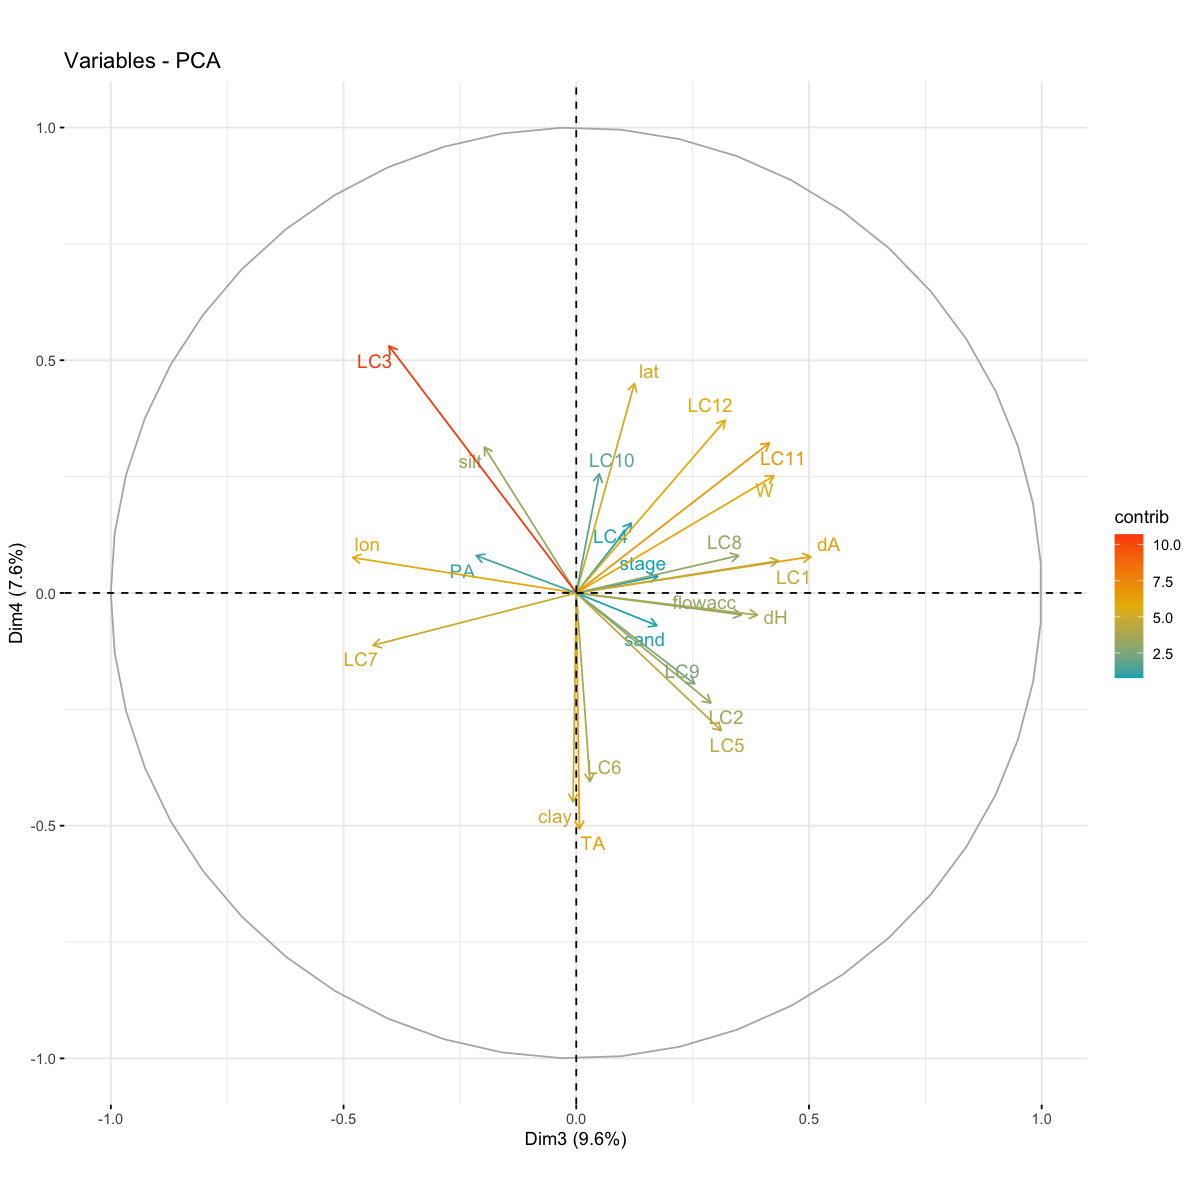

In [47]:
options(repr.plot.width=10, repr.plot.height=10)
fviz_pca_var(ACP, axes=c(3,4), col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)
#plot(ACP, axes=c(3,4), choix = "ind", select = "contrib 5", unselect = 0)

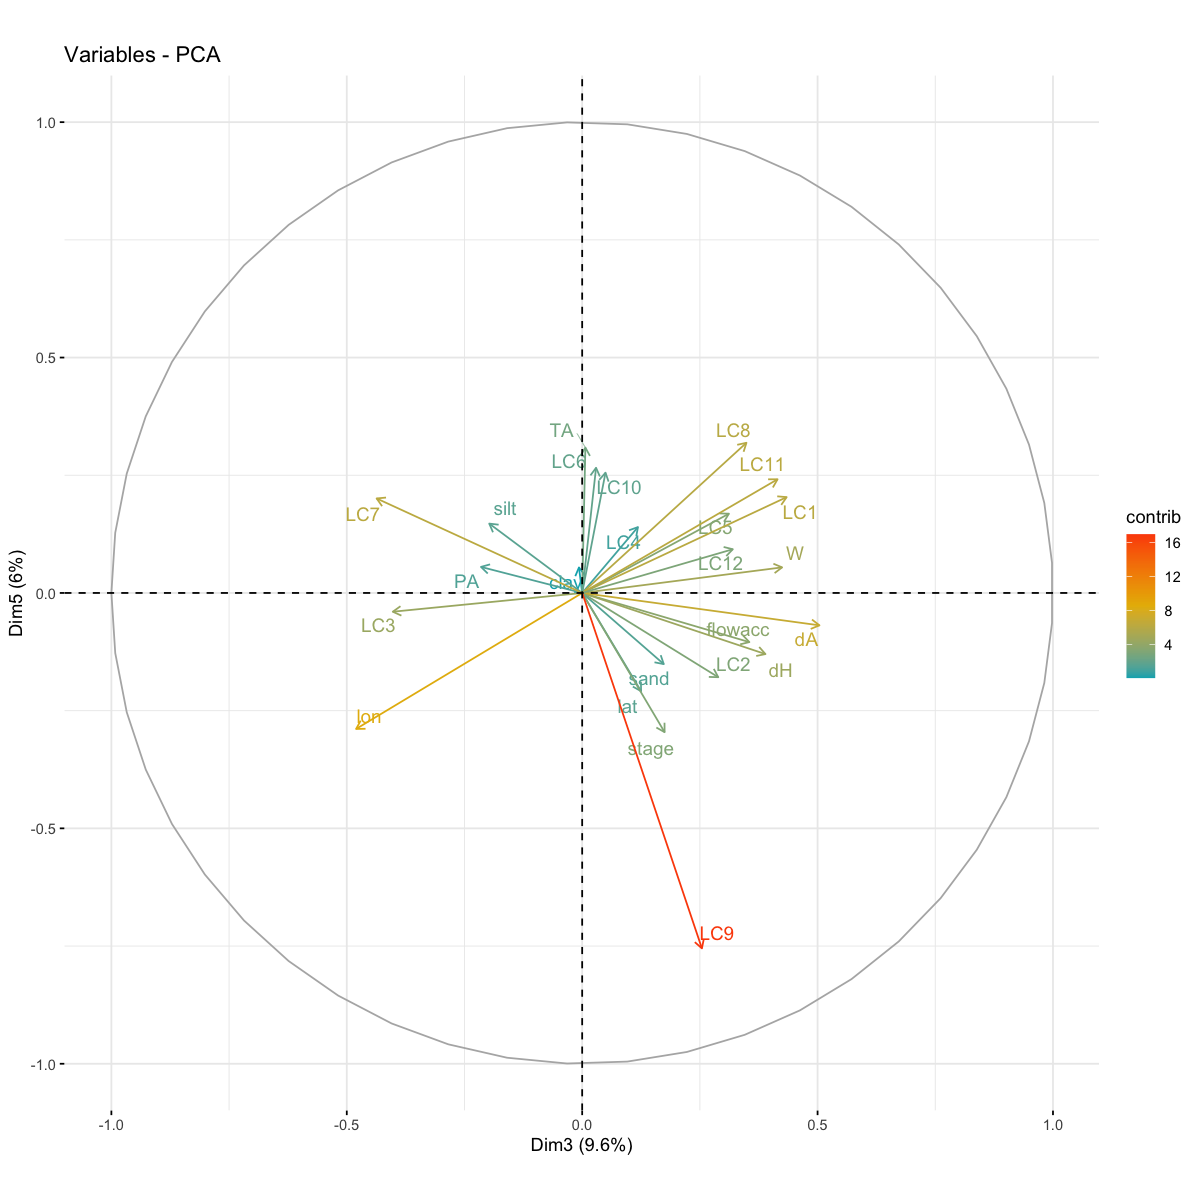

In [48]:
options(repr.plot.width=10, repr.plot.height=10)
fviz_pca_var(ACP, axes=c(3,5), col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)
#plot(ACP, axes=c(3,5), choix = "ind", select = "contrib 5", unselect = 0)

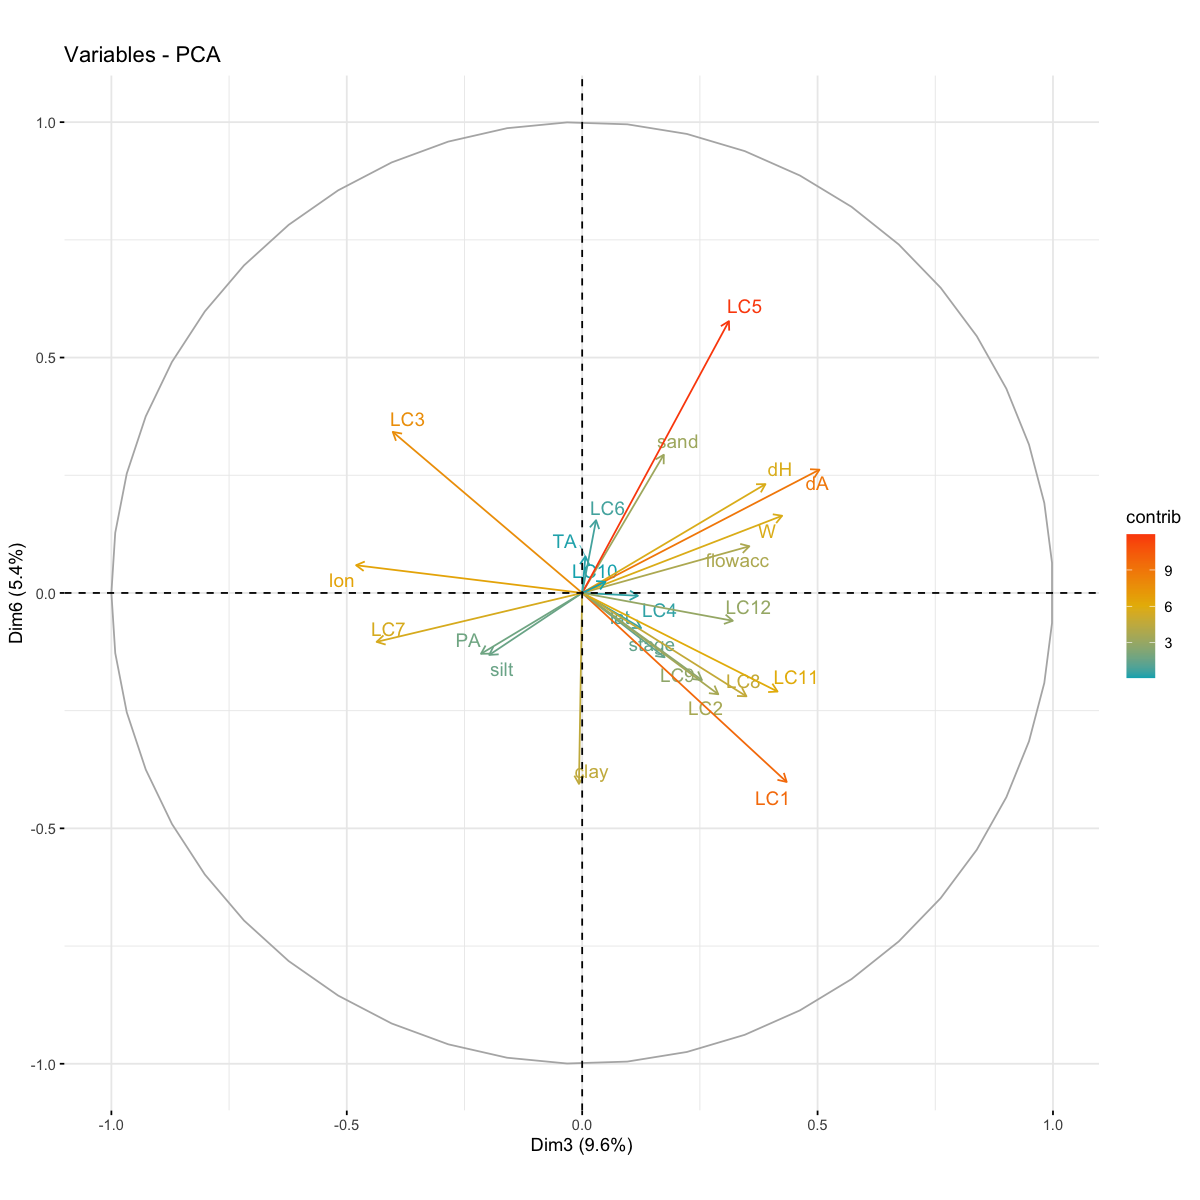

In [49]:
options(repr.plot.width=10, repr.plot.height=10)
fviz_pca_var(ACP, axes=c(3,6), col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)
#plot(ACP, axes=c(3,6), choix = "ind", select = "contrib 5", unselect = 0)

#### Conclusion(s)

- **Composante 1** : LC4, sand, PA, LC7. Donc principalement la composition de la rivière.
- **Composante 2** : flowacc, W, dA (+ un peu PA). Variables les plus corrélées avec le débit.
- **Composante 3** : dA. Rien de bien évident.
- **Comosantes 4, 5, & 6** : respectivement LC3(+ un peu TA), LC9, & LC5. Composition de la rivière.  

On repère aussi extrêmement facilement les différentes rivières sur les graphes des individus. Mais cela n'a pas de véritable intérêt dans notre recherche des paramètres influant le plus sur le débit. Juste que nos composantes permettent de bien différencier nos différents individus.